# Analisi database completa effettuata


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_parquet("./factory_20240131.parquet", delimiter="\t")

è stata eseguita una compressione del file originale in .parquet (compression = "brotli") per velocizzare il caricamento e risparmiare la memoria


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_batch                19735 non-null  object 
 1   cnc_average_kw            19735 non-null  int64  
 2   work_stations_average_kw  19735 non-null  int64  
 3   temp_CNC_1                19735 non-null  float64
 4   humidity_CNC_1            19735 non-null  float64
 5   temp_CNC_2                19735 non-null  float64
 6   humidity_CNC_2            19735 non-null  float64
 7   temp_CNC_3                19735 non-null  float64
 8   humidity_CNC_3            19735 non-null  float64
 9   temp_CNC_4                19735 non-null  float64
 10  humidity_CNC_4            19735 non-null  float64
 11  temp_CNC_5                19735 non-null  float64
 12  humidity_CNC_5            19735 non-null  float64
 13  temp_CNC_6                19735 non-null  float64
 14  humidi

il database non presenta valori np.NaN


In [6]:
df.describe()

cnc_average_kw  work_stations_average_kw    temp_CNC_1  humidity_CNC_1  \
count    19735.000000              19735.000000  19735.000000    19735.000000   
mean        97.694958                  3.801875     21.686571       40.259739   
std        102.524891                  7.935988      1.606066        3.979299   
min         10.000000                  0.000000     16.790000       27.023333   
25%         50.000000                  0.000000     20.760000       37.333333   
50%         60.000000                  0.000000     21.600000       39.656667   
75%        100.000000                  0.000000     22.600000       43.066667   
max       1080.000000                 70.000000     26.260000       63.360000   

         temp_CNC_2  humidity_CNC_2    temp_CNC_3  humidity_CNC_3  \
count  19735.000000    19735.000000  19735.000000    19735.000000   
mean      20.341219       40.420420     22.267611       39.242500   
std        2.192974        4.069813      2.006111        3.254576   
min       16.100000       20.463333     17.200000       28.766667   
25%       18.790000       37.900000     20.790000       36.900000   
50%       20.000000       40.500000     22.100000       38.530000   
75%       21.500000       43.260000     23.290000       41.760000   
max       29.856667       56.026667     29.236000       50.163333   

         temp_CNC_4  humidity_CNC_4    temp_CNC_5  humidity_CNC_5  \
count  19735.000000    19735.000000  19735.000000    19735.000000   
mean      20.855335       39.026904     19.592106       50.949283   
std        2.042884        4.341321      1.844623        9.022034   
min       15.100000       27.660000     15.330000       29.815000   
25%       19.530000       35.530000     18.277500       45.400000   
50%       20.666667       38.400000     19.390000       49.090000   
75%       22.100000       42.156667     20.619643       53.663333   
max       26.200000       51.090000     25.795000       96.321667   

         temp_CNC_6  humidity_CNC_6    temp_CNC_7  humidity_CNC_7  \
count  19735.000000    19735.000000  19735.000000    19735.000000   
mean       7.910939       54.609083     20.267106       35.388200   
std        6.090347       31.149806      2.109993        5.114208   
min       -6.065000        1.000000     15.390000       23.200000   
25%        3.626667       30.025000     18.700000       31.500000   
50%        7.300000       55.290000     20.033333       34.863333   
75%       11.256000       83.226667     21.600000       39.000000   
max       28.290000       99.900000     26.000000       51.400000   

         temp_CNC_8  humidity_CNC_8    temp_CNC_9  humidity_CNC_9  \
count  19735.000000    19735.000000  19735.000000    19735.000000   
mean      22.029107       42.936165     19.485828       41.552401   
std        1.956162        5.224361      2.014712        4.151497   
min       16.306667       29.600000     14.890000       29.166667   
25%       20.790000       39.066667     18.000000       38.500000   
50%       22.100000       42.375000     19.390000       40.900000   
75%       23.390000       46.536000     20.600000       44.338095   
max       27.230000       58.780000     24.500000       53.326667   

       temp_outside  press_mm_hg_outside  humidity_outside  windspeed_outside  \
count  19735.000000         19735.000000      19735.000000       19735.000000   
mean       7.412580           755.522602         79.750418           4.039752   
std        5.318464             7.399441         14.901088           2.451221   
min       -5.000000           729.300000         24.000000           0.000000   
25%        3.670000           750.933333         70.333333           2.000000   
50%        6.920000           756.100000         83.666667           3.666667   
75%       10.400000           760.933333         91.666667           5.500000   
max       26.100000           772.300000        100.000000          14.000000   

       visibility_outside  dewpoint_outside   temp_CNC_10  

# Analisi dei Dati Energetici e Ambientali - CNC

## 1. Energia (kW)

- **Consumo medio CNC (`cnc_average_kw`)**

  - Media: **97.7 kW**
  - Massimo: **1080 kW**
  - Possibili **picchi o valori anomali** (il massimo è molto superiore alla media e al 75esimo percentile)

- **Consumo postazioni di lavoro (`work_stations_average_kw`)**
  - Media: **3.8 kW**
  - Molti valori pari a **0**
  - **Mediana e 25° percentile** a **0** → suggerisce **basso utilizzo o inattività frequente**

---

## 2. Temperature e Umidità delle CNC

- Esempio `temp_CNC_1`:

  - Media: **21.69 °C**
  - Range: **16.79 – 26.26 °C**

- Esempio `humidity_CNC_1`:

  - Media: **40.26%**
  - Massimo: **63.36%**

- In generale:
  - **Temperature CNC**: **15 – 29 °C**
  - **Umidità CNC**: molto variabile, alcune CNC raggiungono **oltre 90%**

---

## 3. CNC_6 e CNC_7 - Valori Anomali

- `temp_CNC_6`:

  - **Minimo: -6.06 °C**
  - Possibile **errore di misura** (valore al di sotto della temperatura minima esterna, possibile sensore di raffreddamento)

- `humidity_CNC_7`:
  - **Massimo: 99.9%**
  - Umidità **molto alta** rilevata

---

## 4. Dati Ambientali Esterni

- `temp_outside`:

  - Range: **-5 – 26.1 °C**
  - Media: **7.4 °C**

- `press_mm_hg_outside`:

  - Media: **755.5 mmHg**
  - Coerente con la **normale pressione atmosferica**

- `humidity_outside`:

  - Media: **79.75%**
  - Ambiente **umido**

- `windspeed_outside`:

  - Range: **0 – 14 km/h**
  - Media: **4.03 km/h**

- `visibility_outside`:
  - Media: **38.33 km**
  - Massimo: **66 km**

---

## 5. Colonne Duplicato

- `temp_CNC_10` e `humidity_CNC_10`
  - Presenti **due volte** come **colonne singole** alla fine del file
  - Probabile **errore di duplicazione nei nomi**
  - Data la duplicazione verrà inizialmente utilizzata solo una colonna ai fini della riduzione del rumore e della multicollinearità


# Impostato time_batch come indice dopo aver ordinato i valori


In [7]:
df["time_batch"] = pd.to_datetime(df["time_batch"], dayfirst=True)
df_sorted = df.sort_values("time_batch")
df_sorted = df_sorted.set_index("time_batch", drop=False)

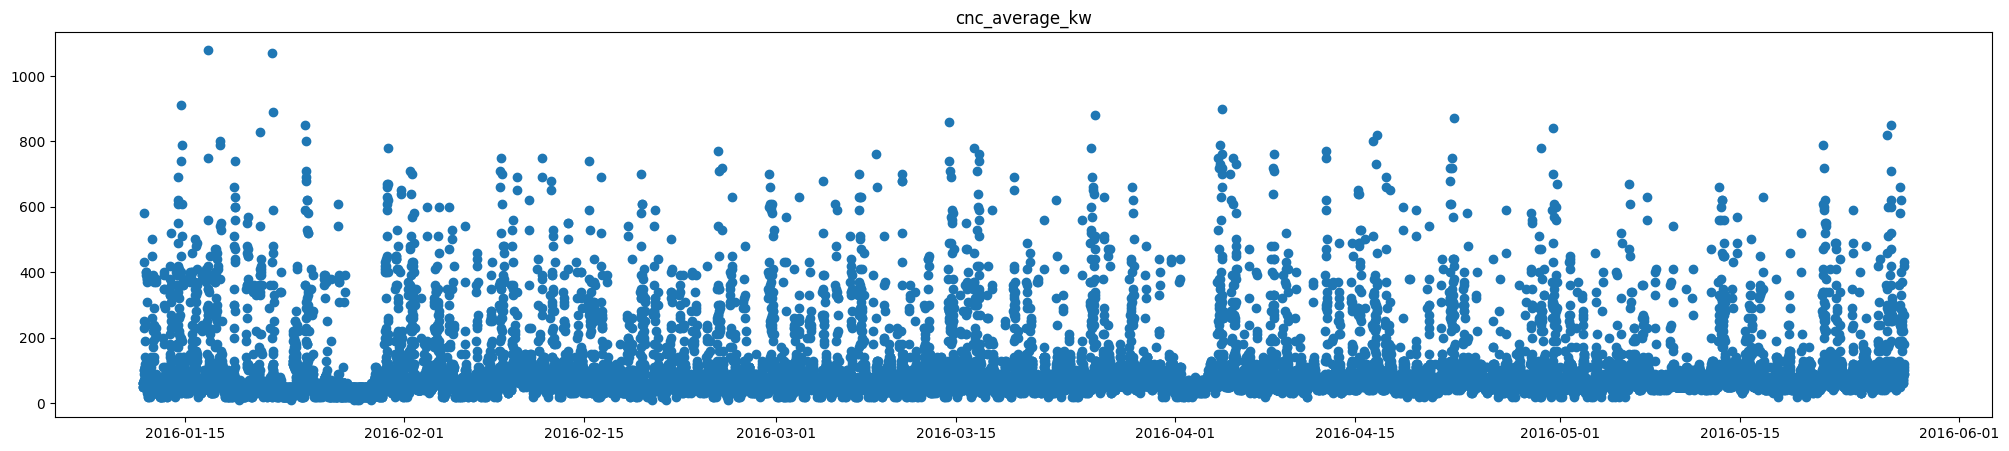

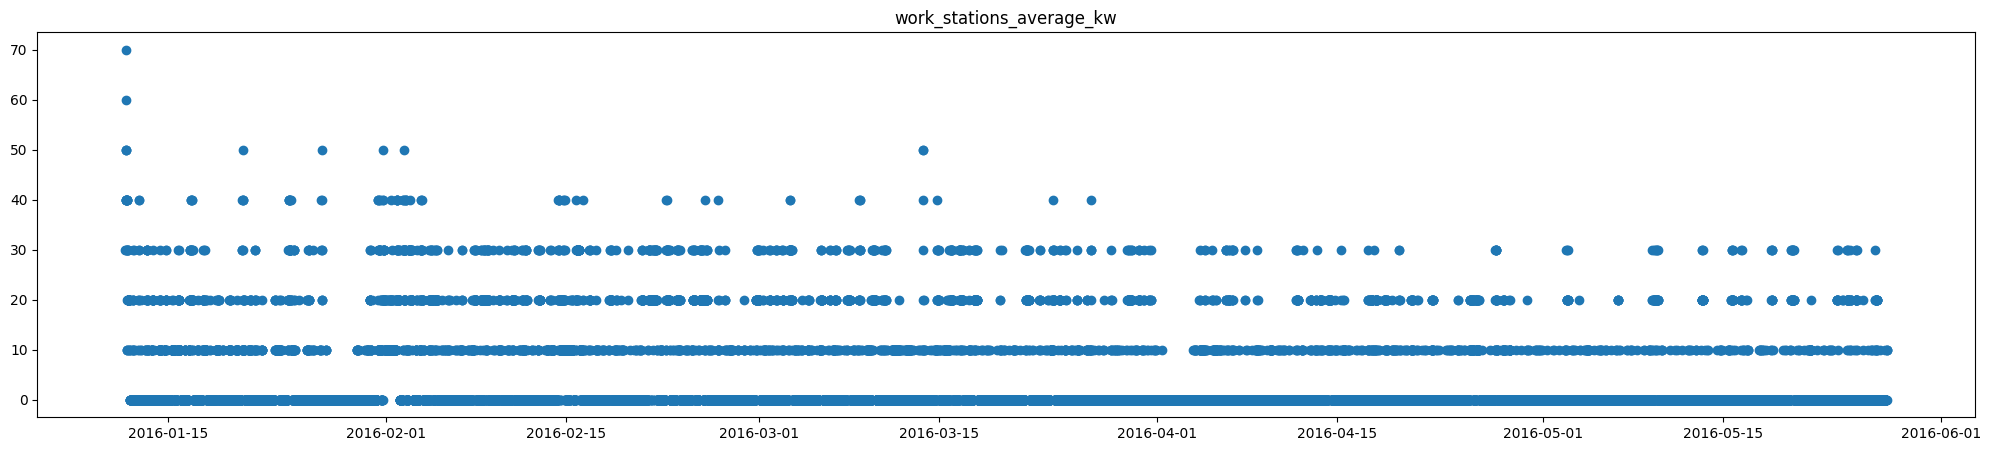

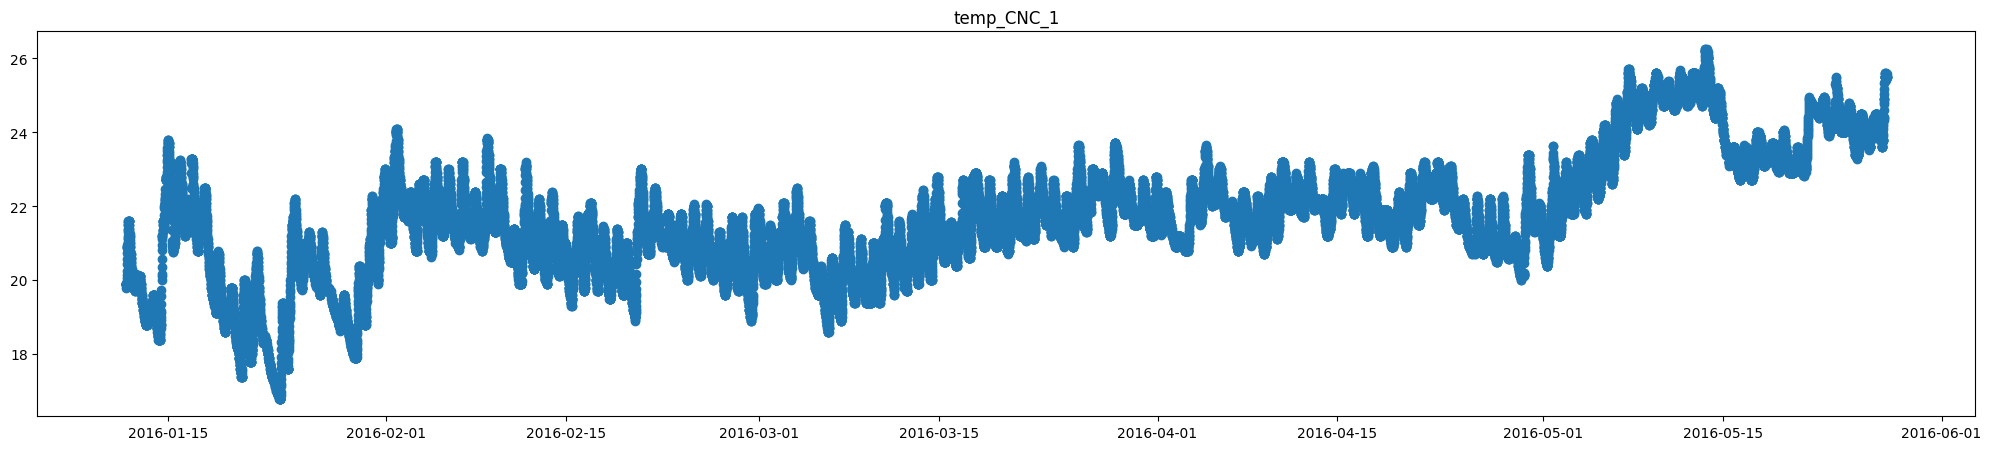

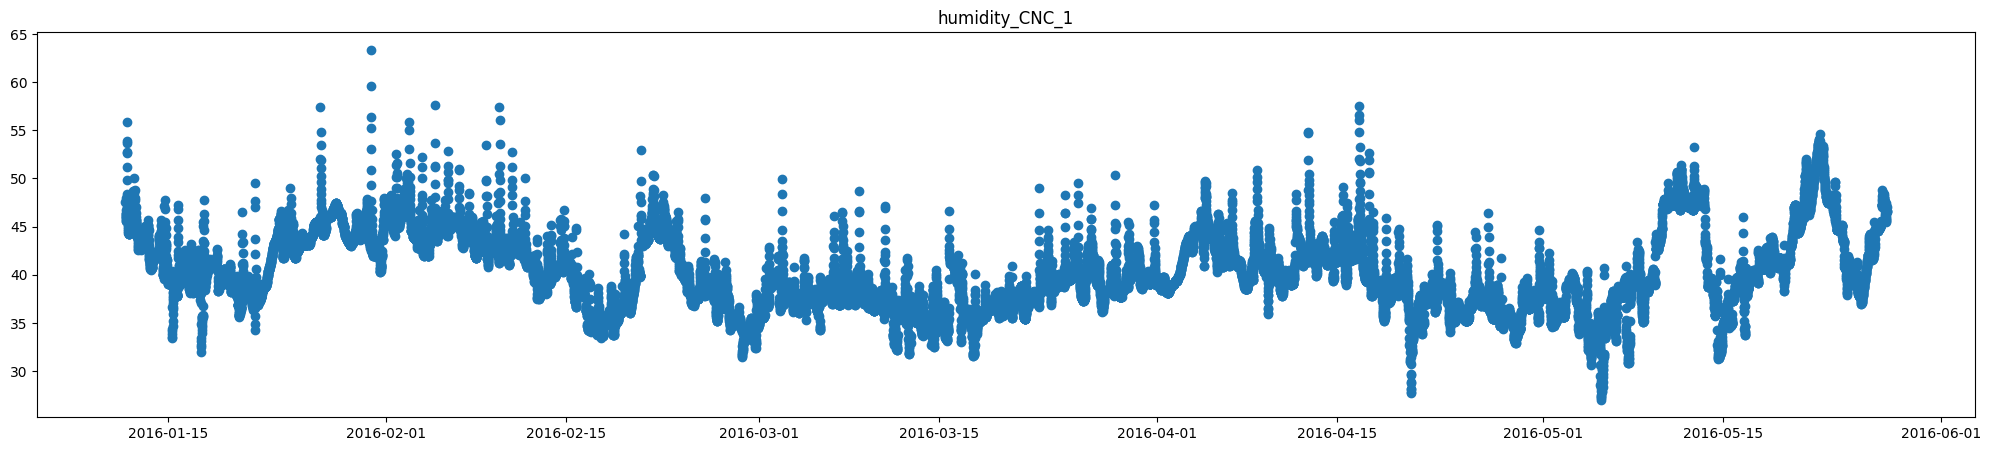

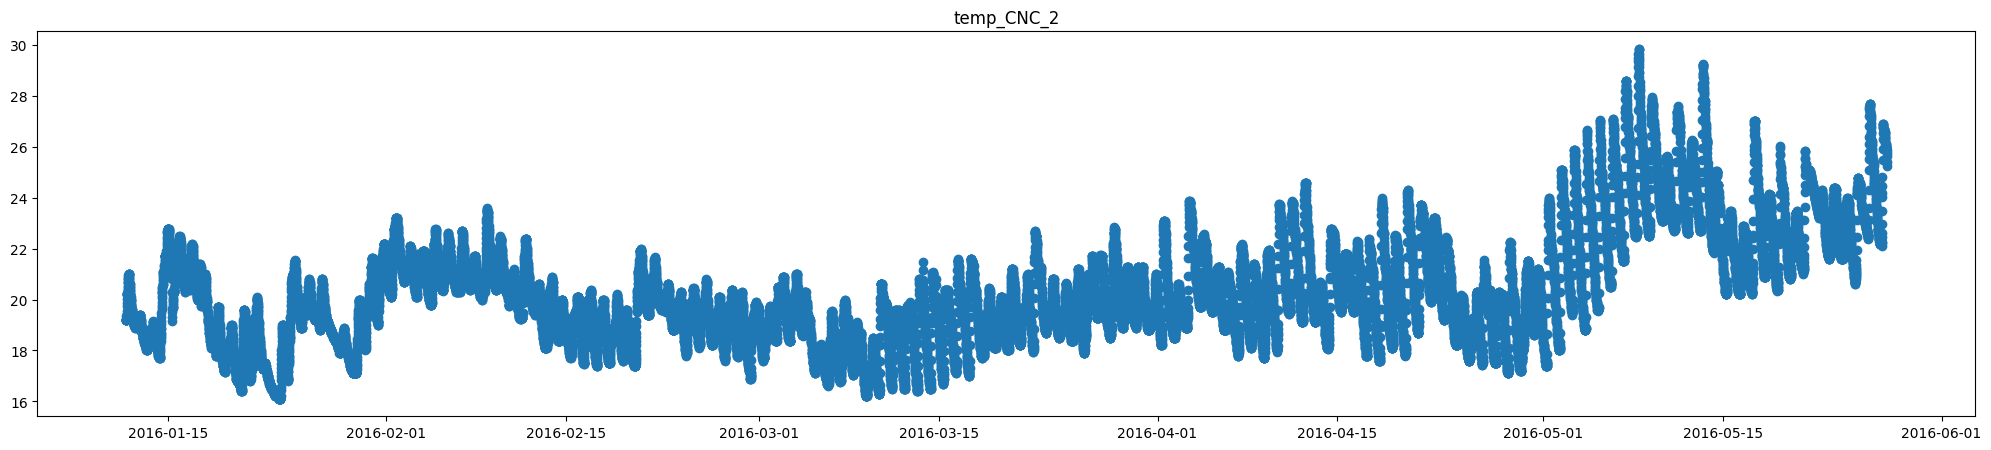

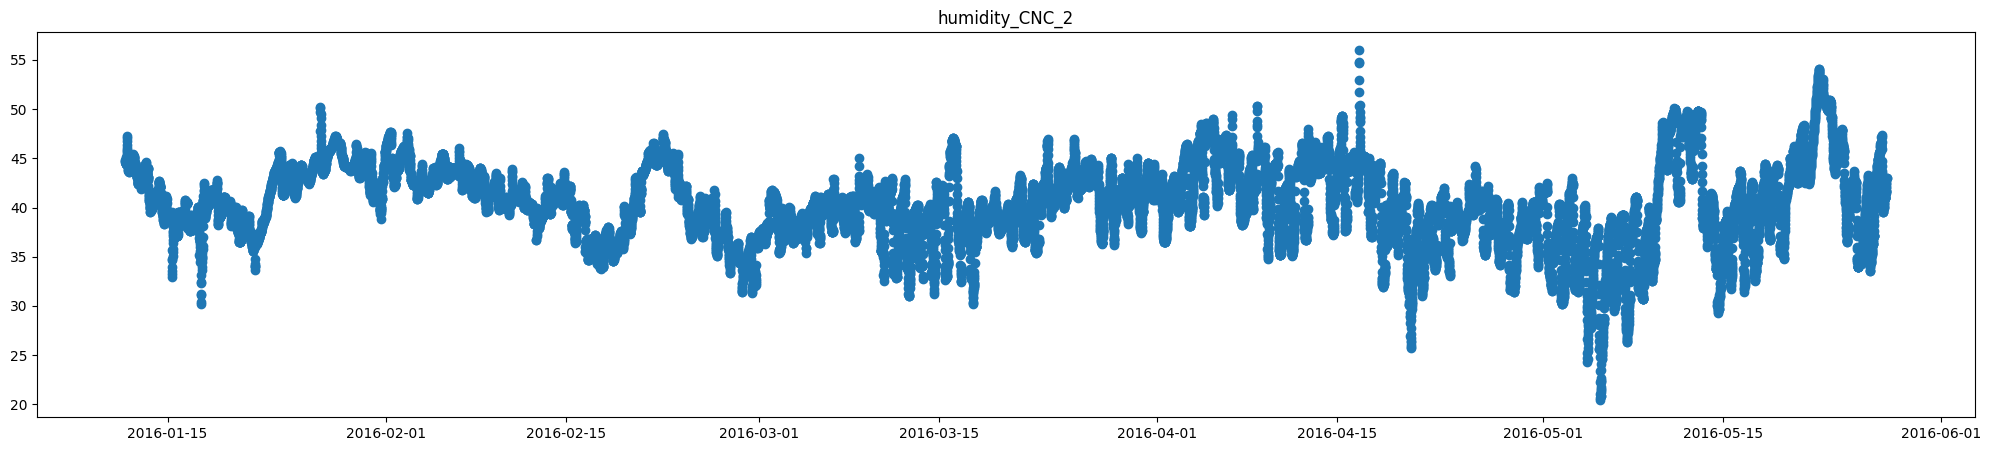

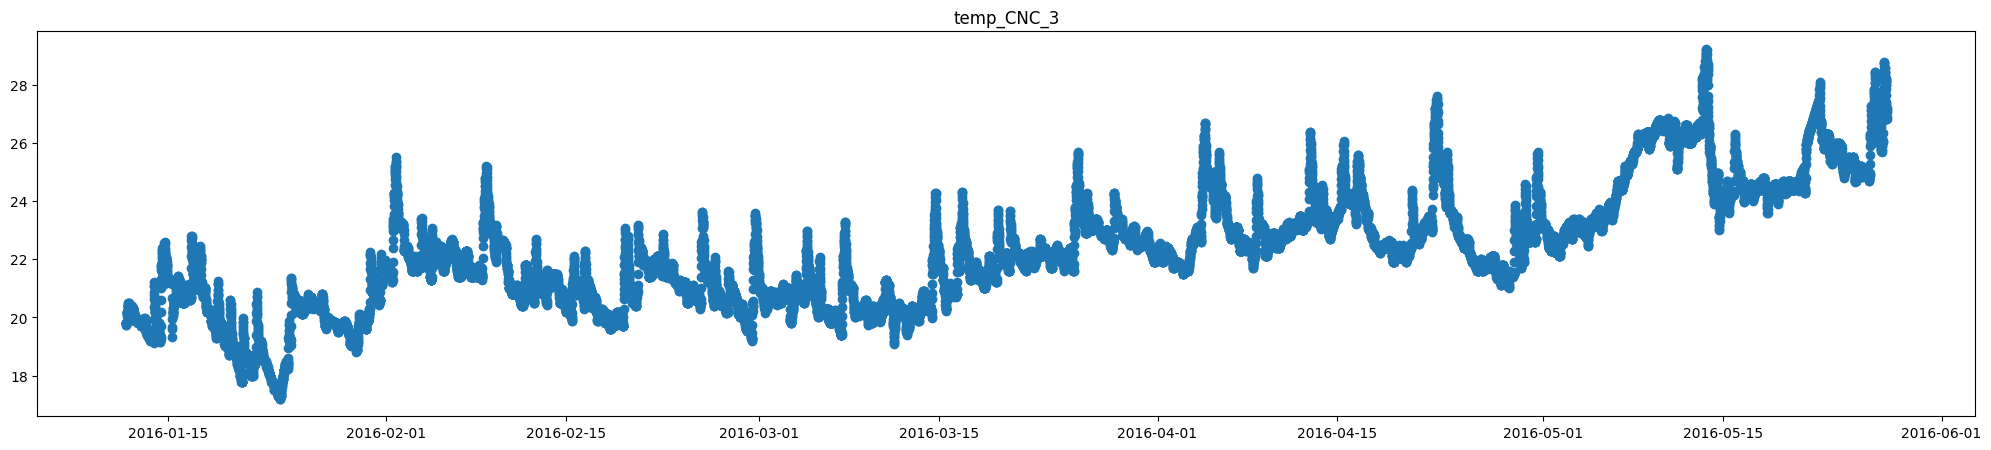

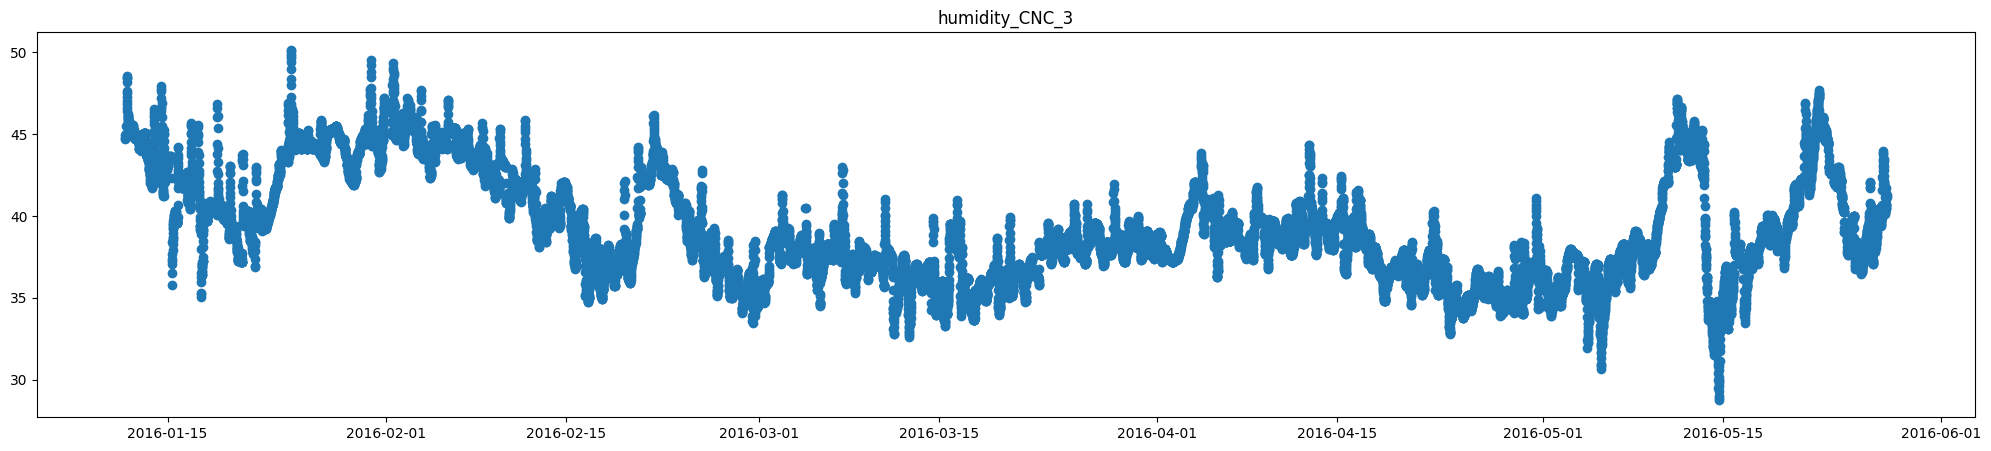

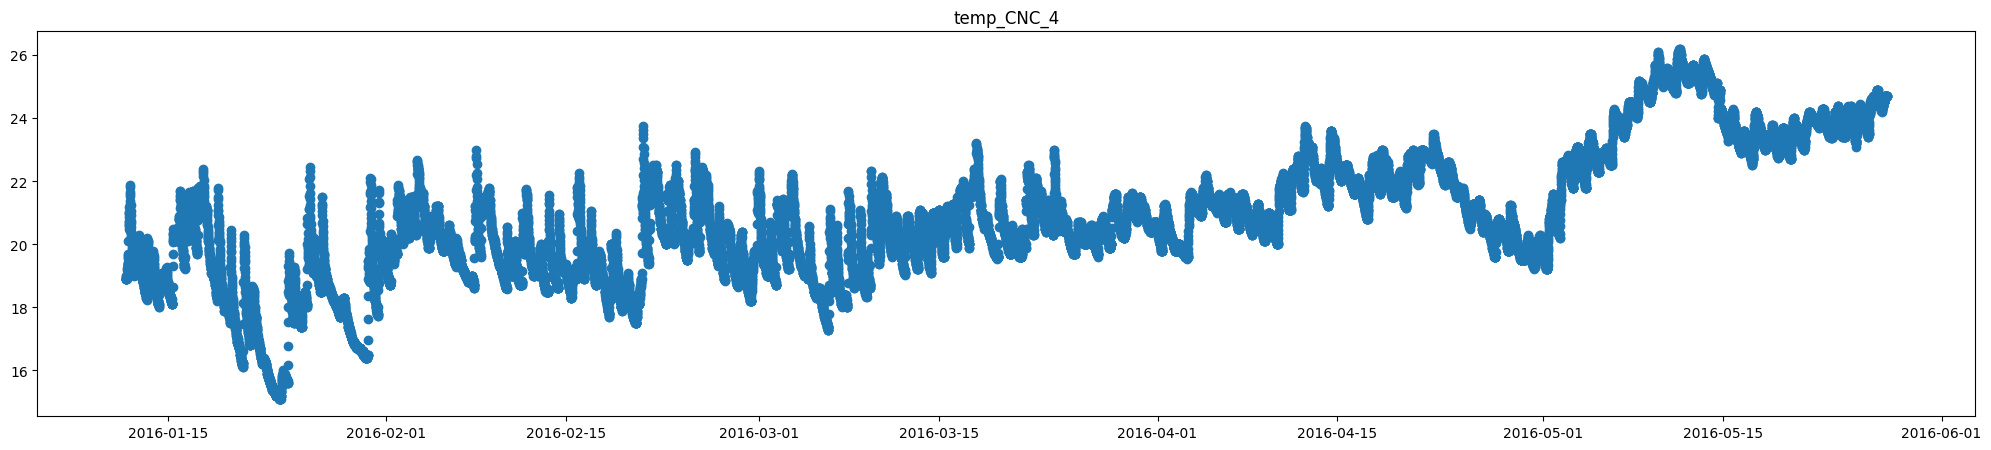

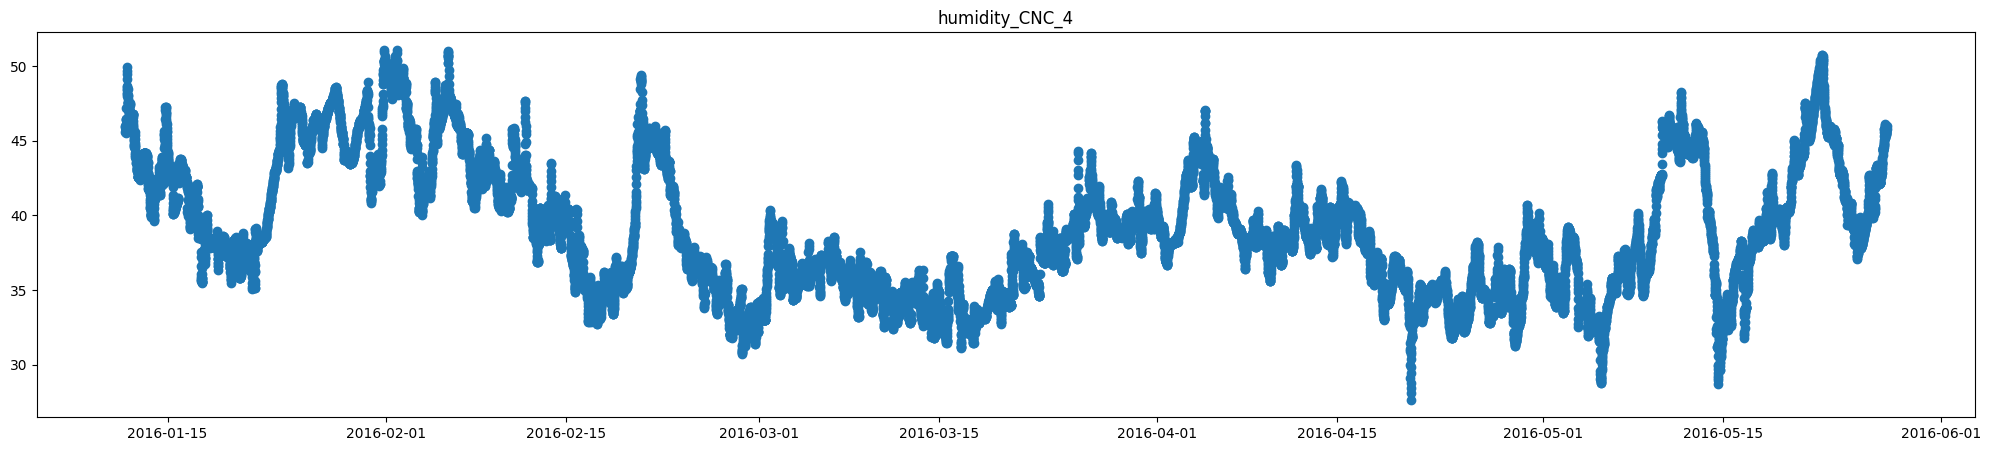

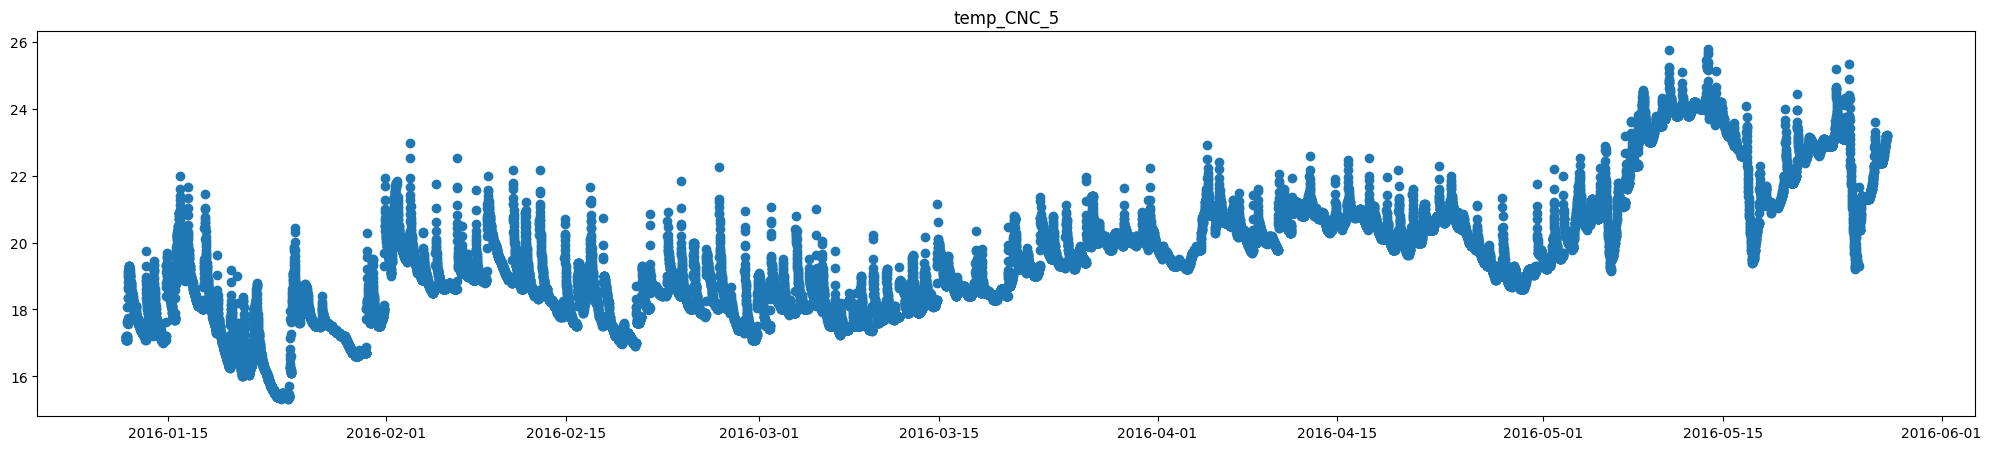

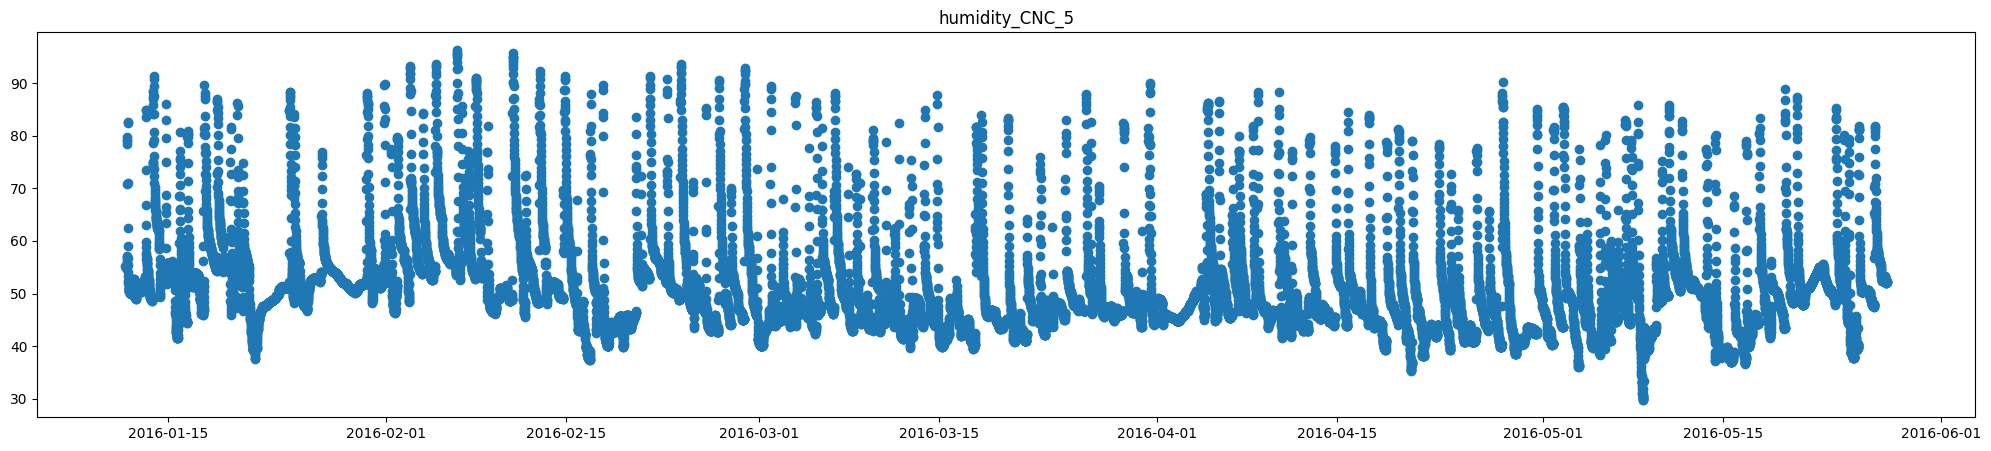

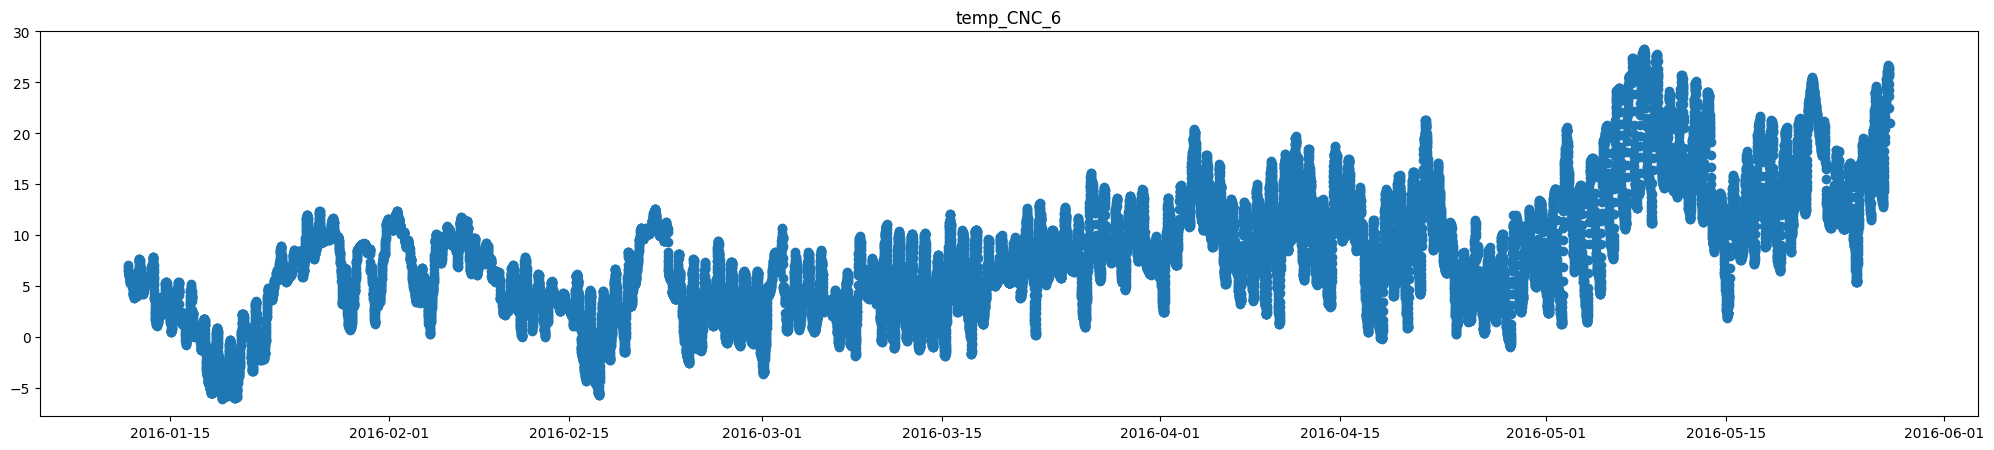

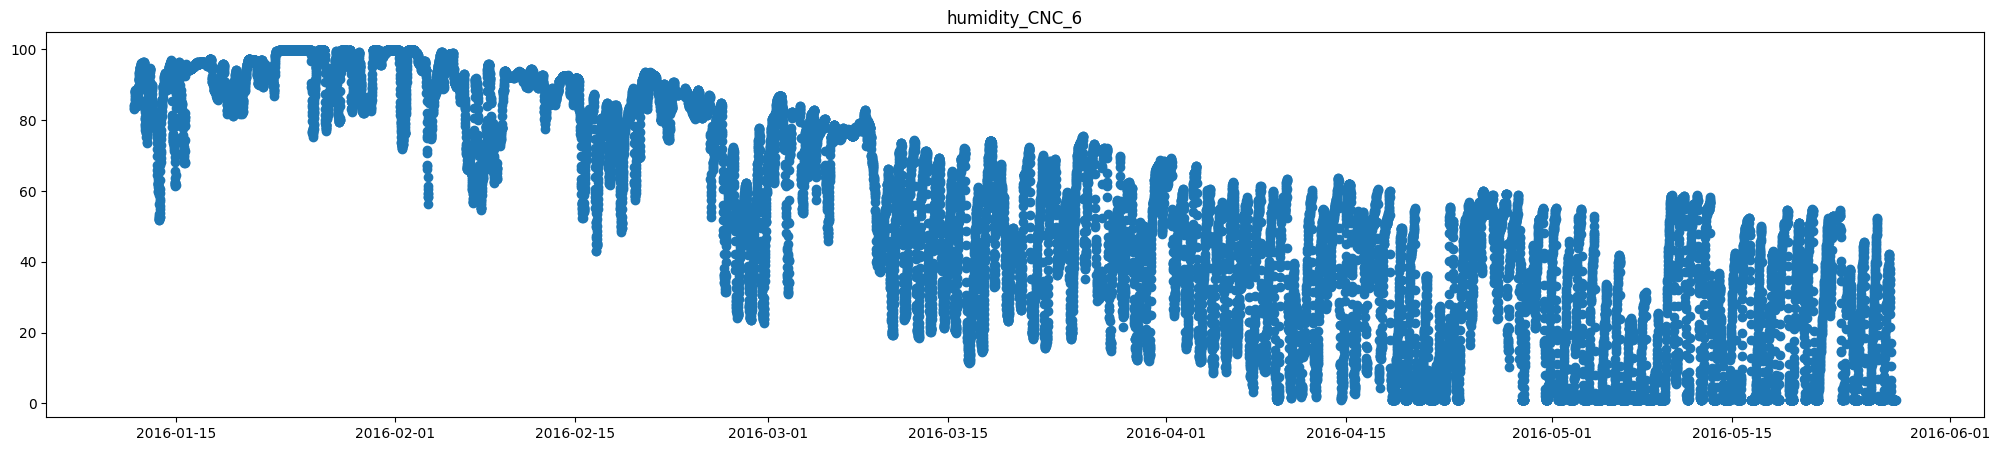

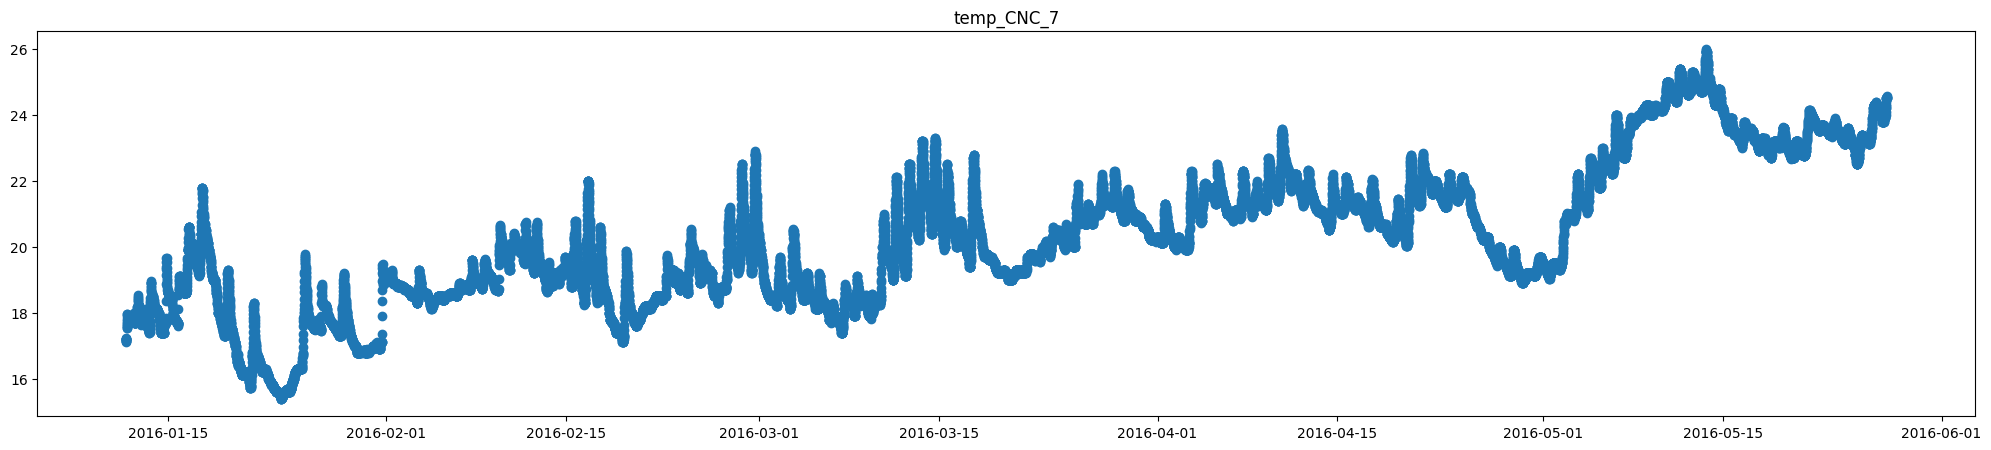

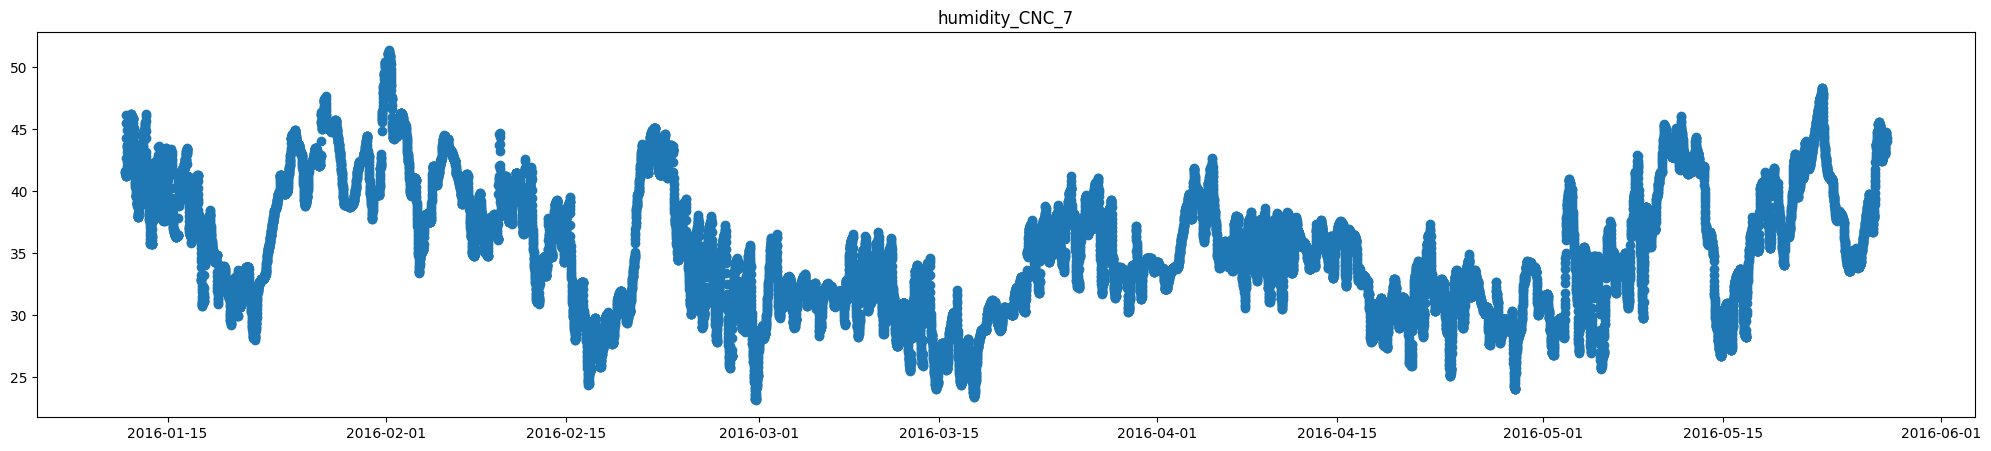

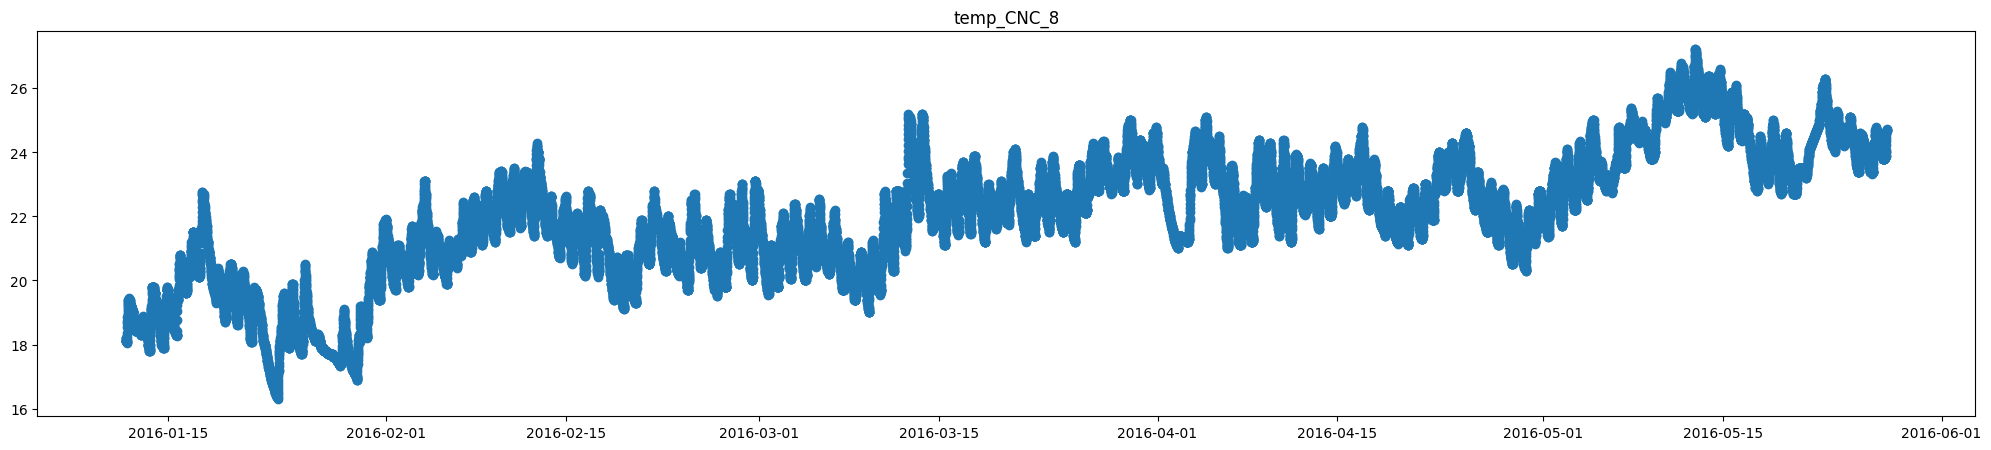

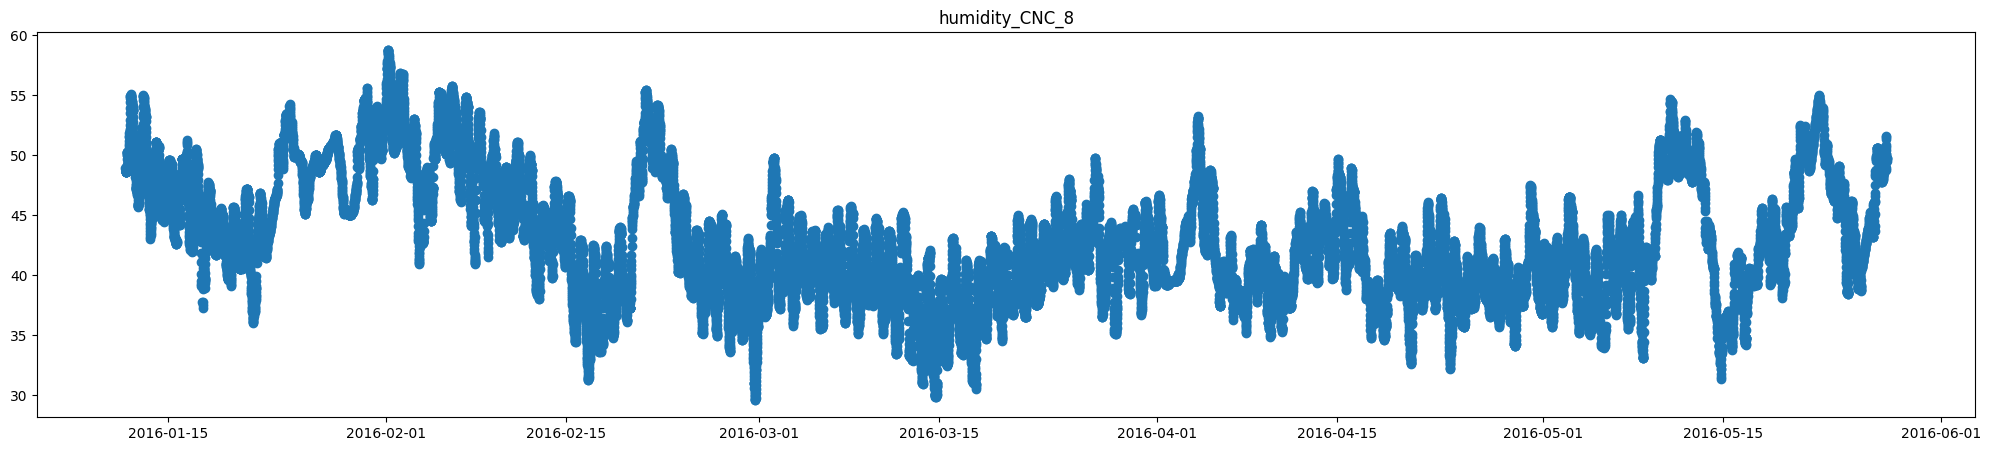

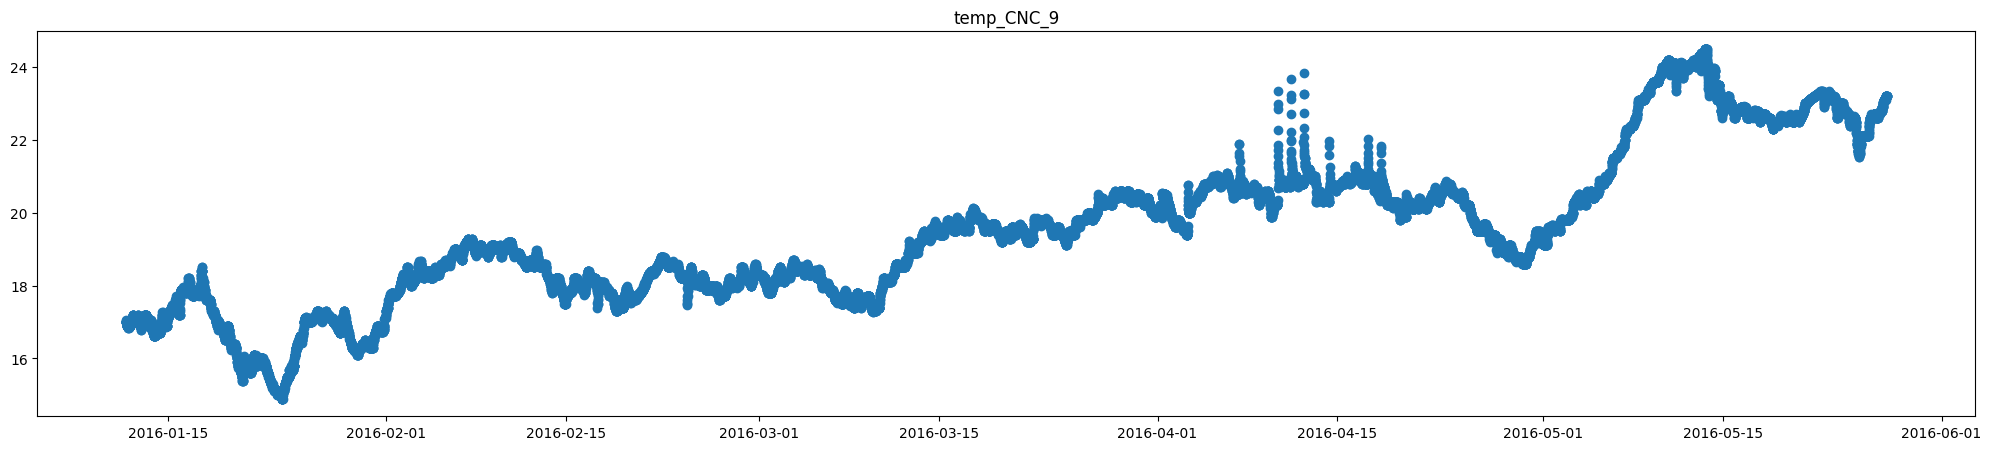

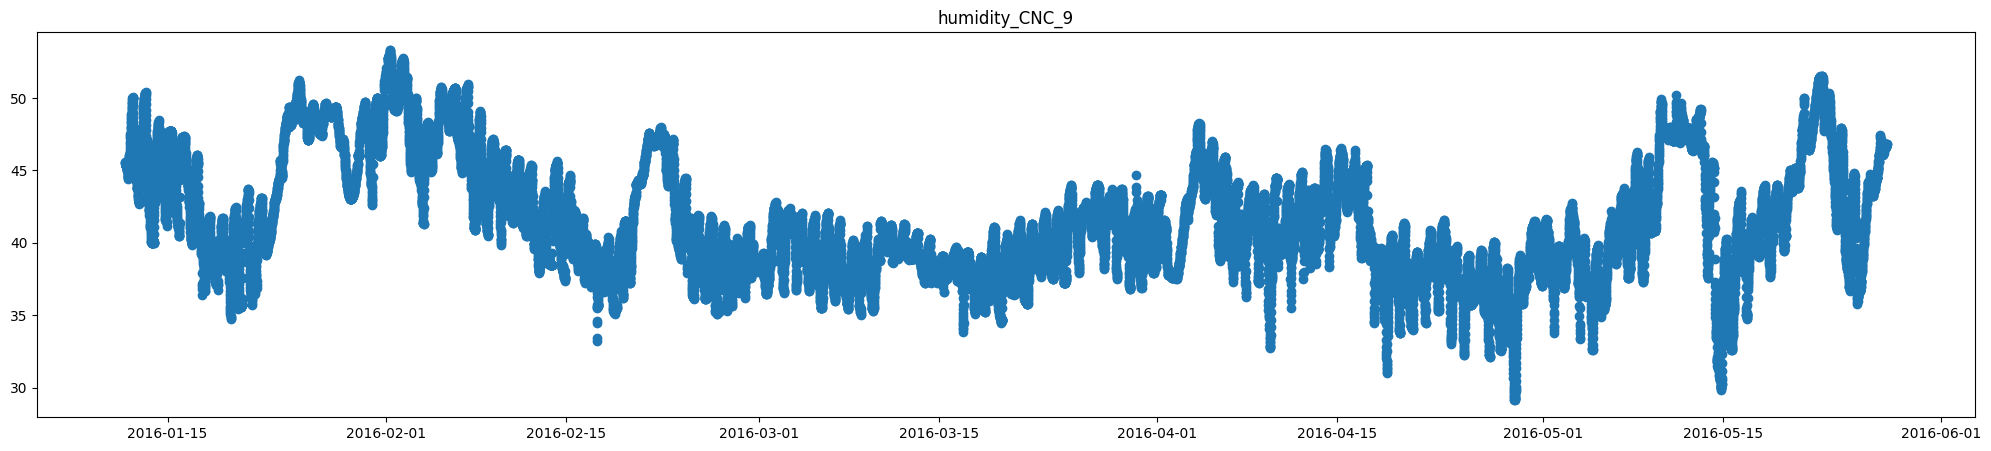

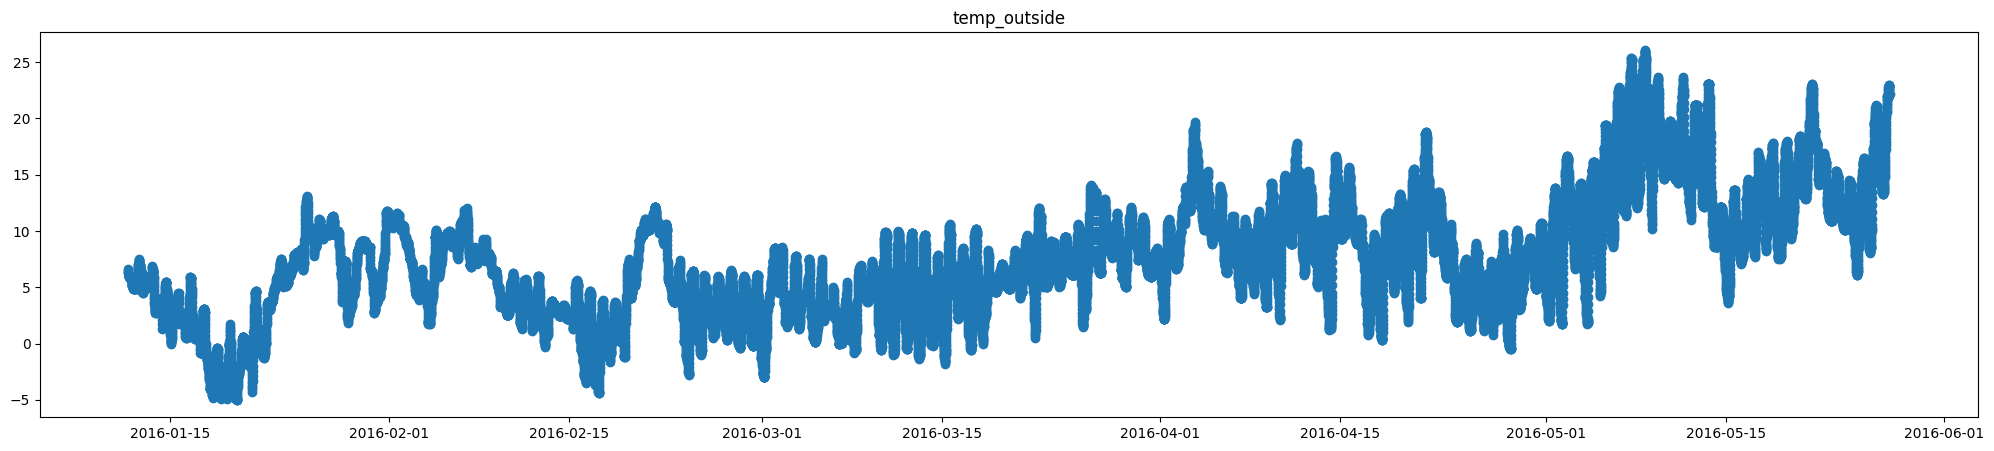

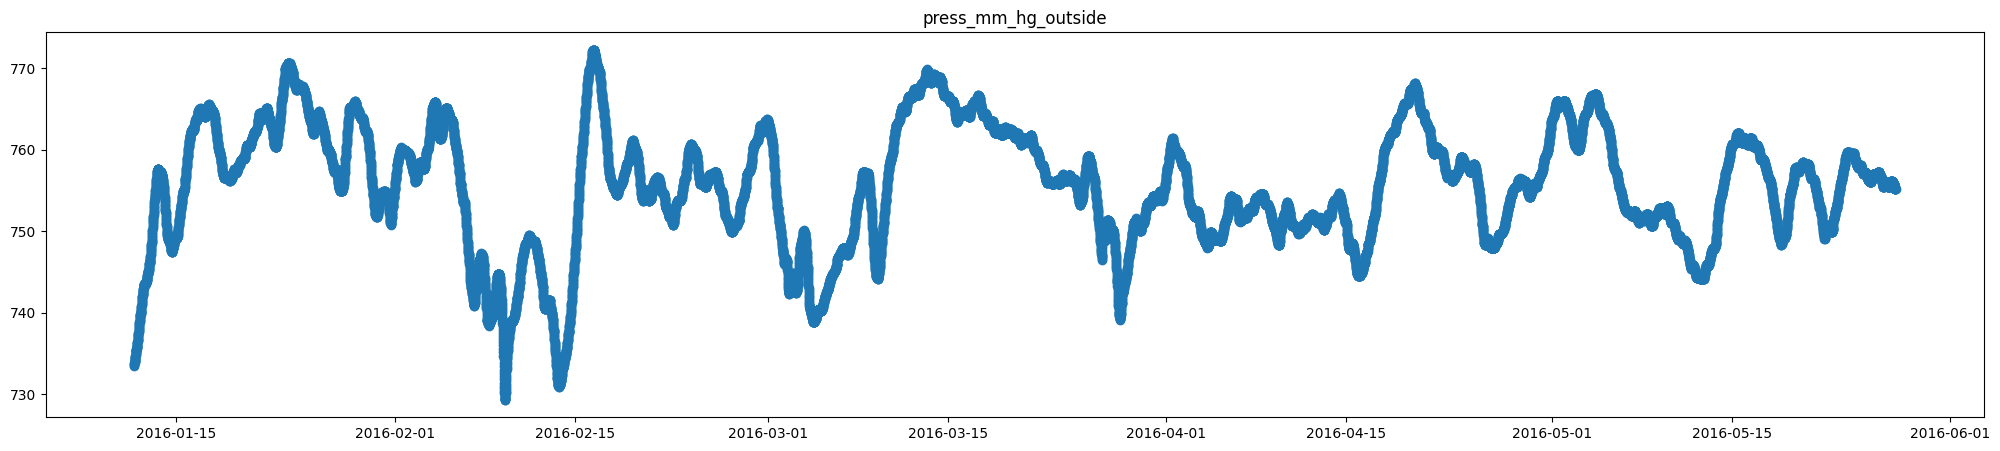

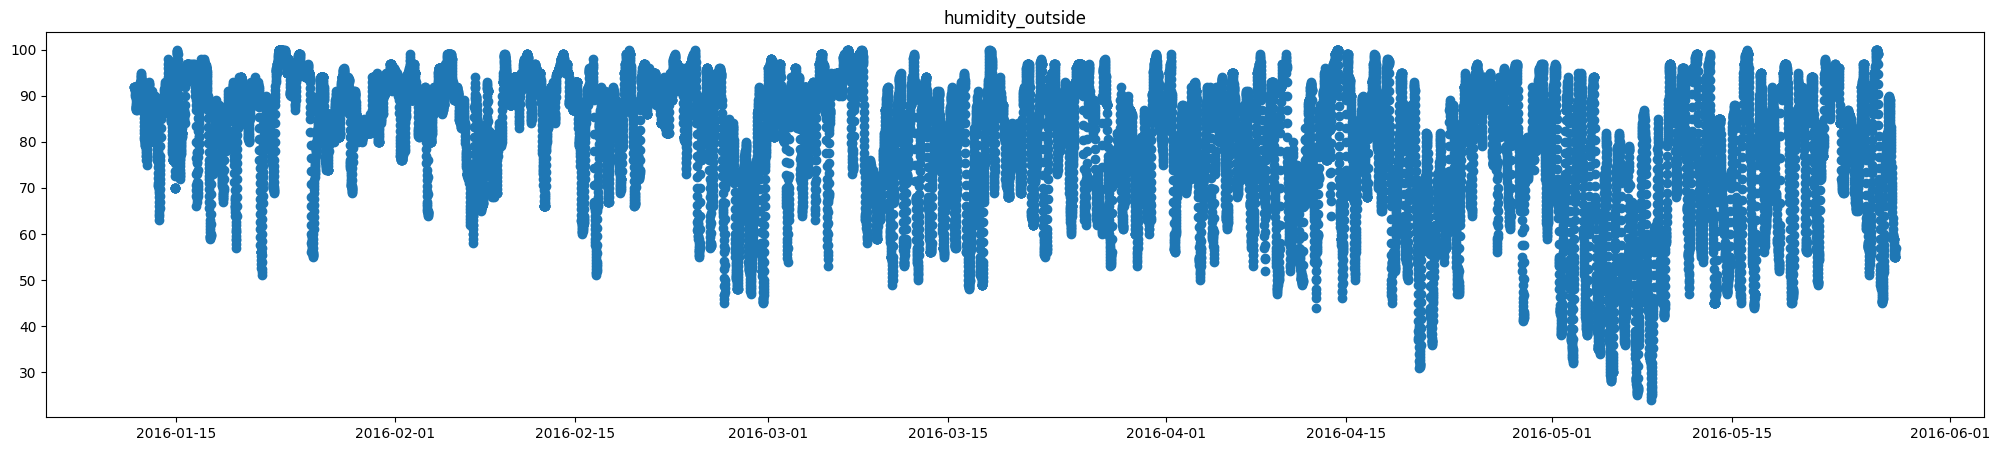

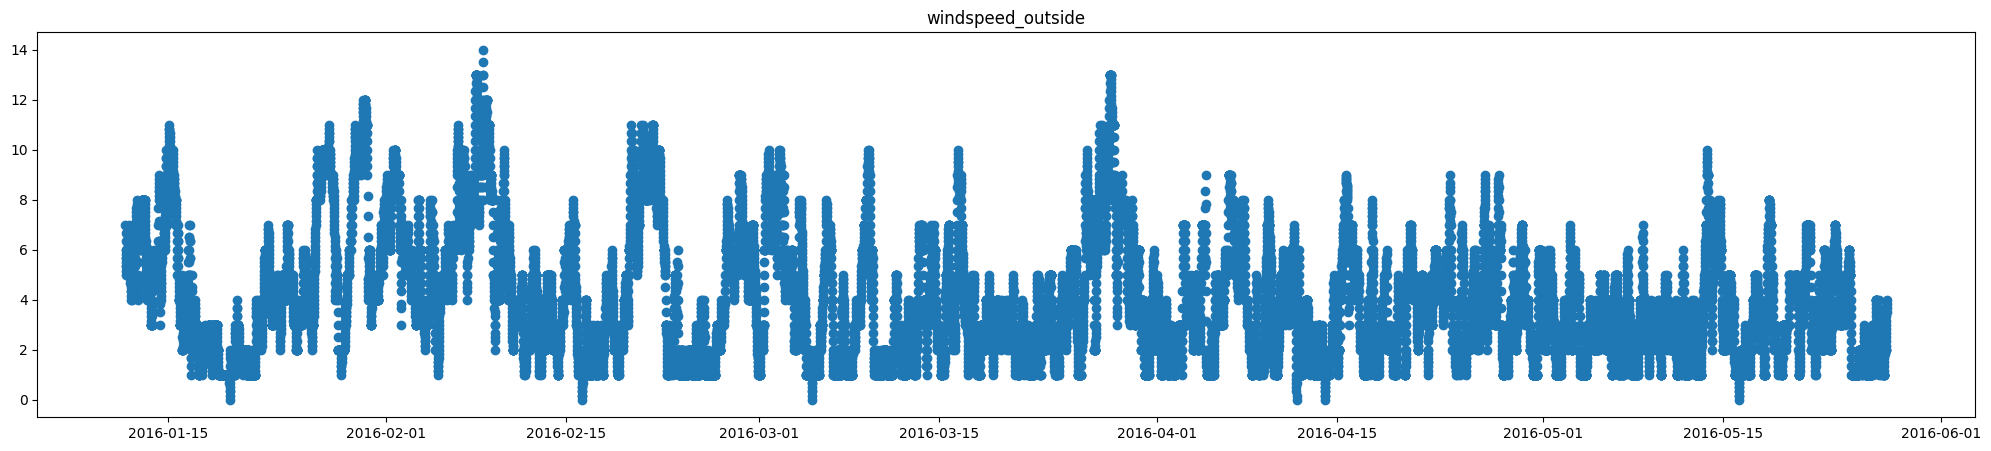

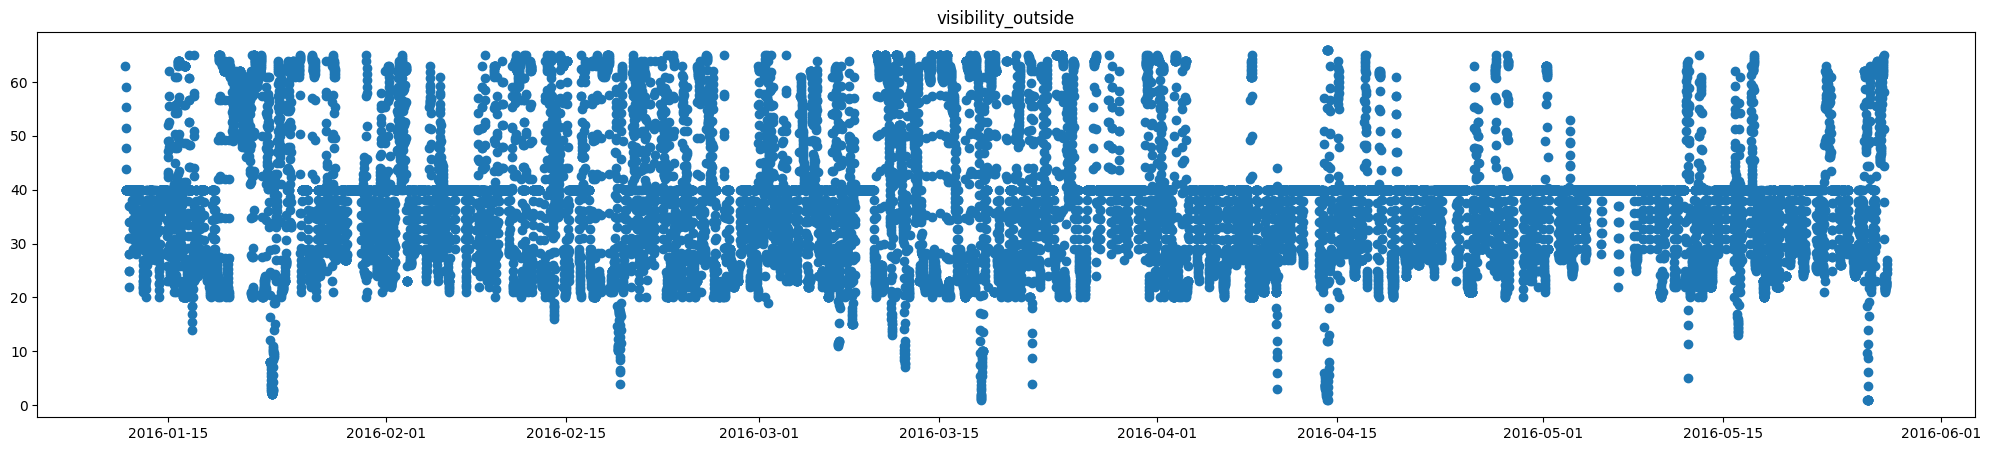

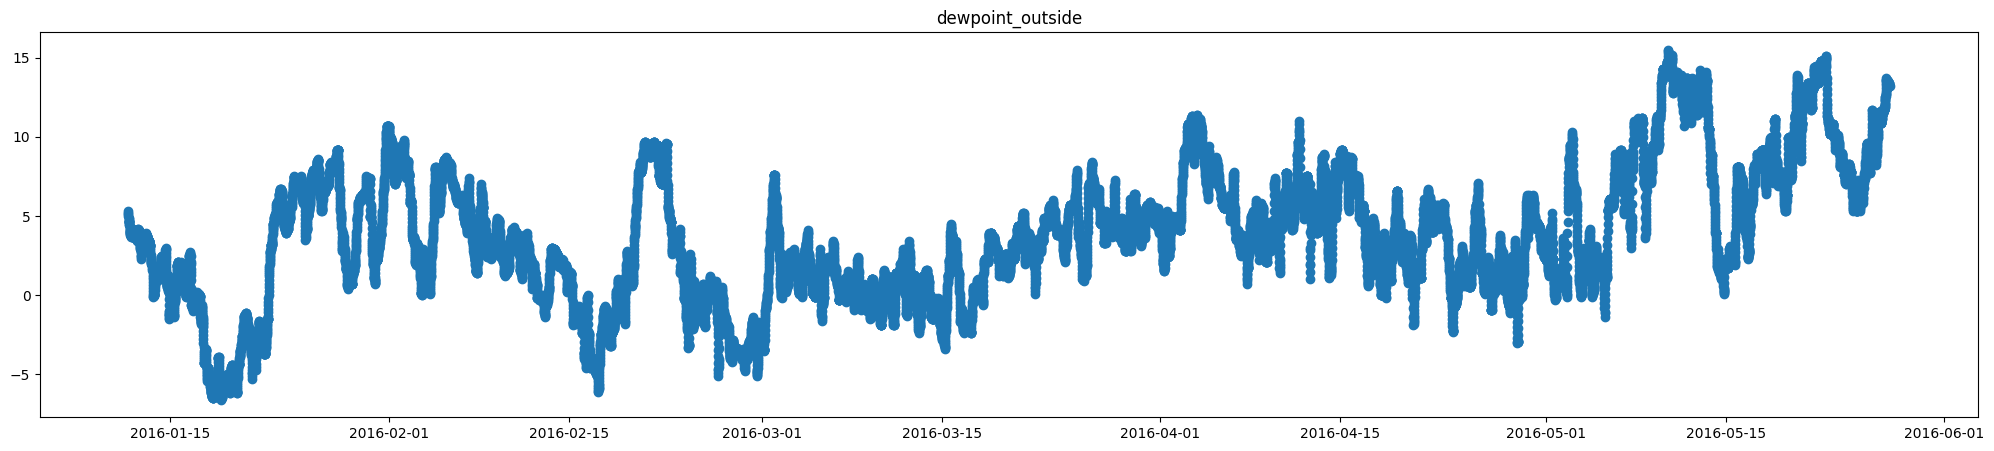

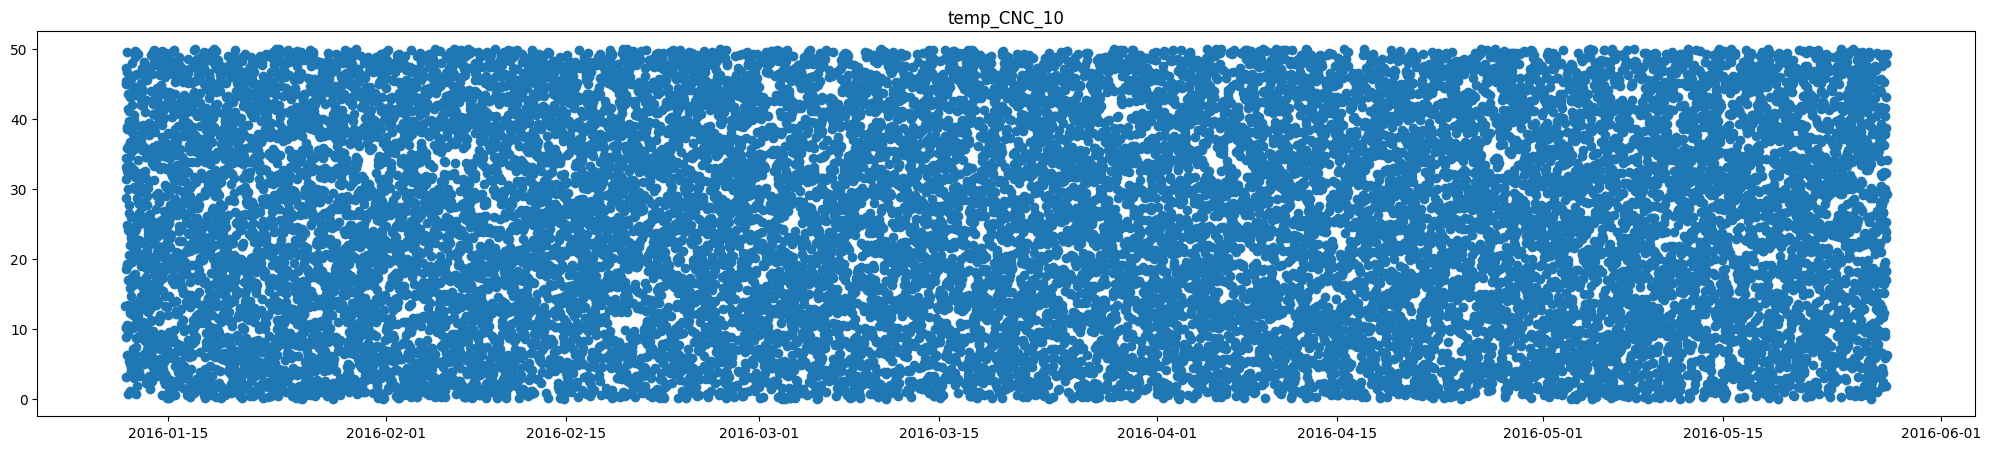

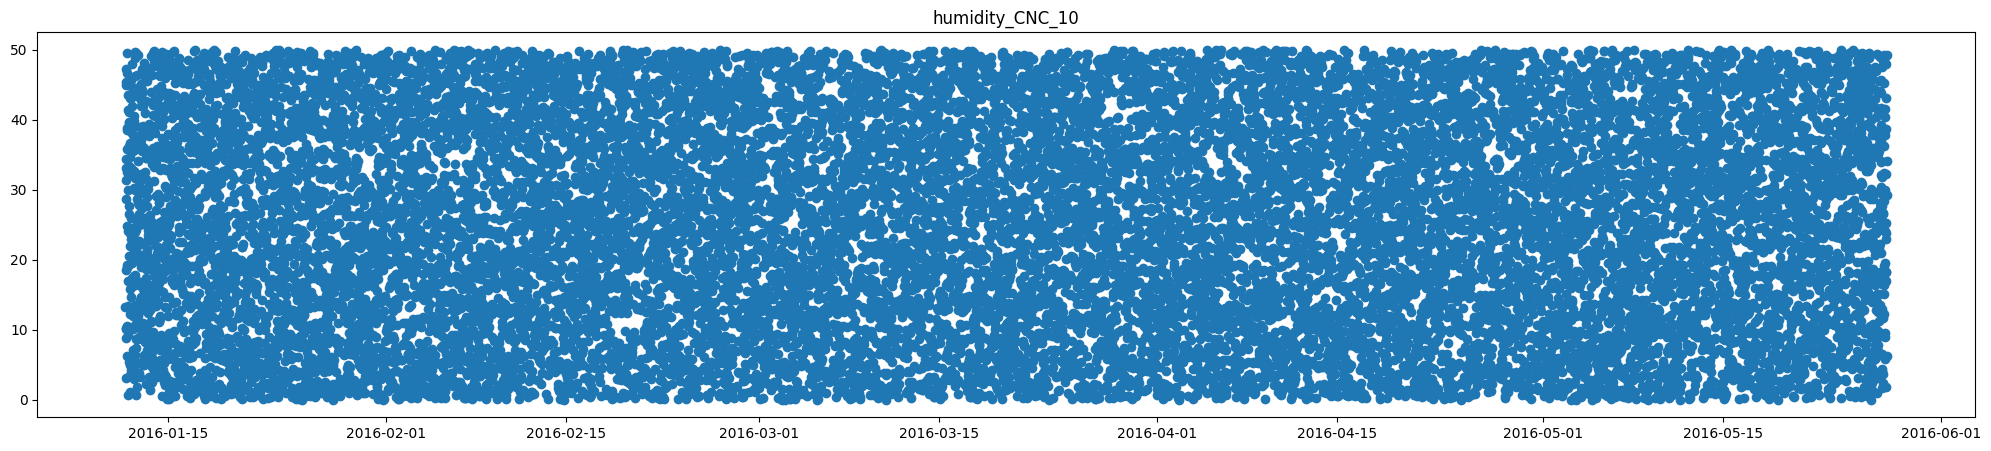

In [8]:
for col in df_sorted.columns[1:]:
    plt.figure(figsize=(25, 5))
    plt.scatter(df_sorted["time_batch"], df_sorted[col])
    plt.title(col)
    plt.show()

temp_CNC_10 ed humidity_CNC_10 non hanno pattern significativi, ma sono soltanto rumore aggiuntivo, verranno droppate


In [9]:
df_sorted = df_sorted.drop(columns=["temp_CNC_10", "humidity_CNC_10"])

## Creazione delle variabili Mese, giorno, ora per approfondire i vari cicli di consumo in modo più dettagliato


In [10]:
# df_sorted['month'] = df_sorted.index.month <-- non ha dato insights sifnificativi
df_sorted["hour"] = df_sorted.index.hour
df_sorted["dayofweek"] = df_sorted.index.dayofweek
df_sorted["is_weekend"] = df_sorted["dayofweek"].isin([5, 6]).astype(int)

## Analisi per ora


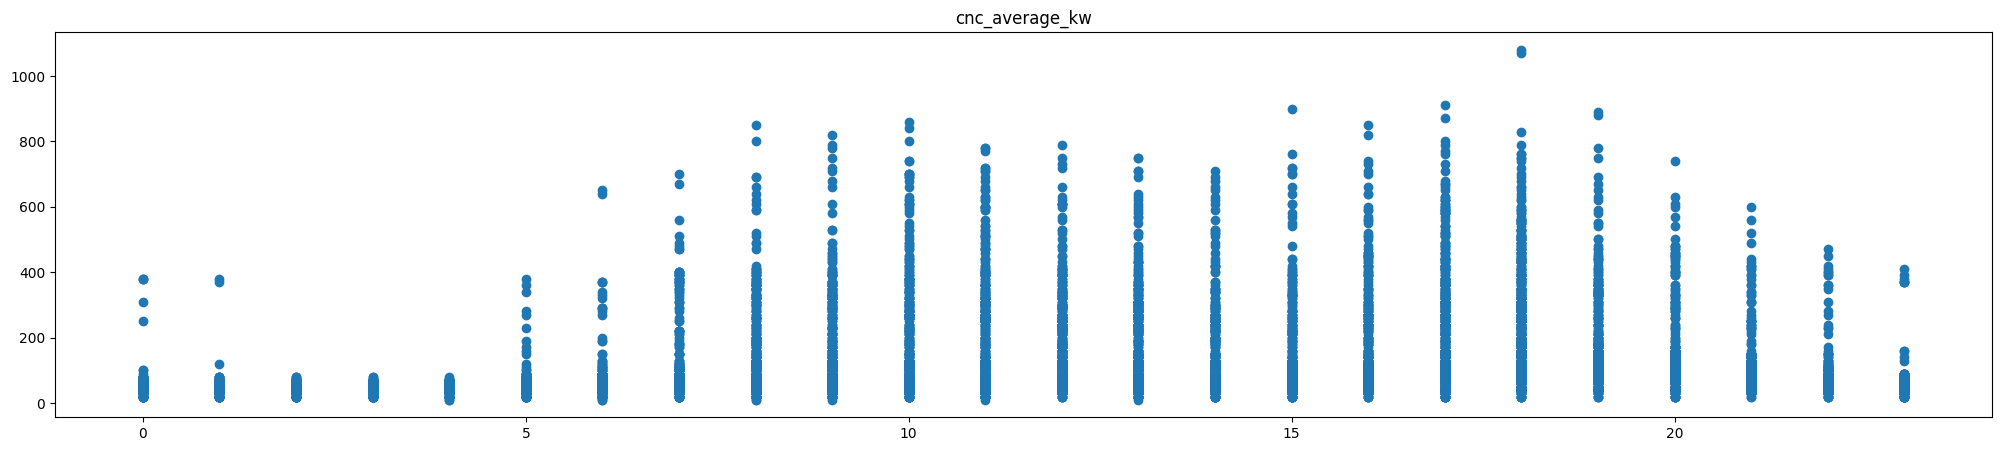

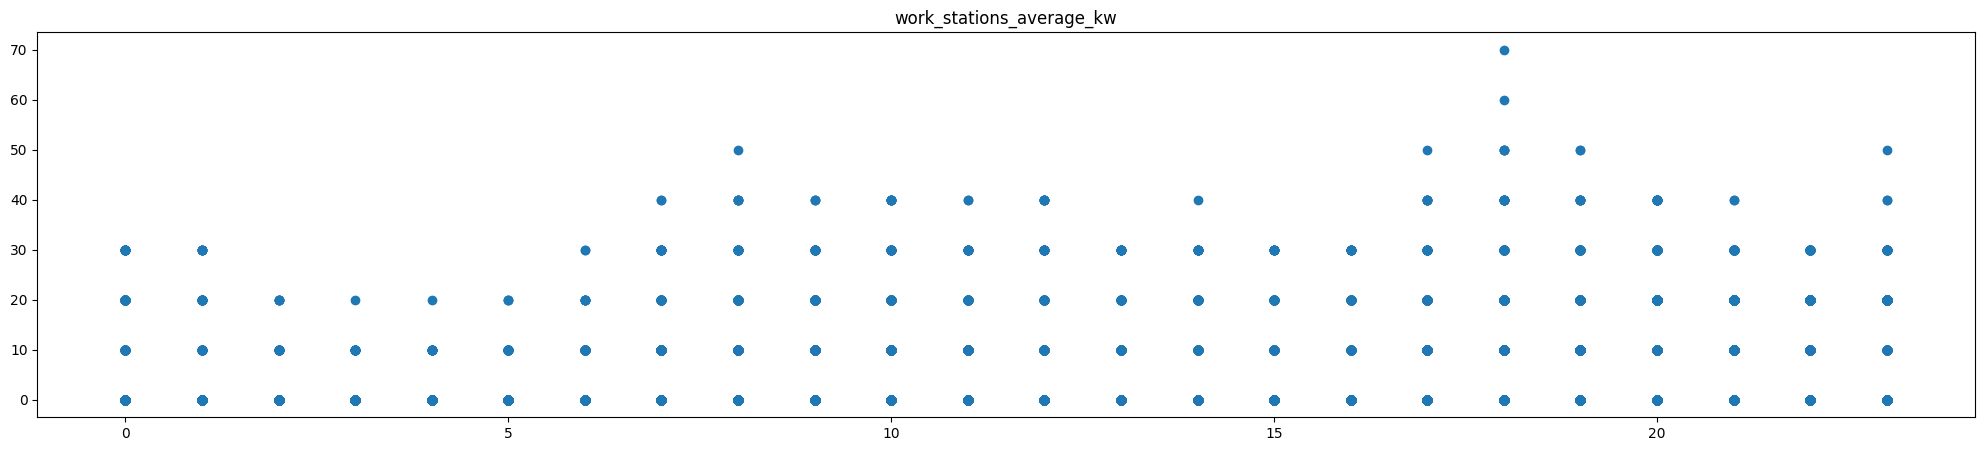

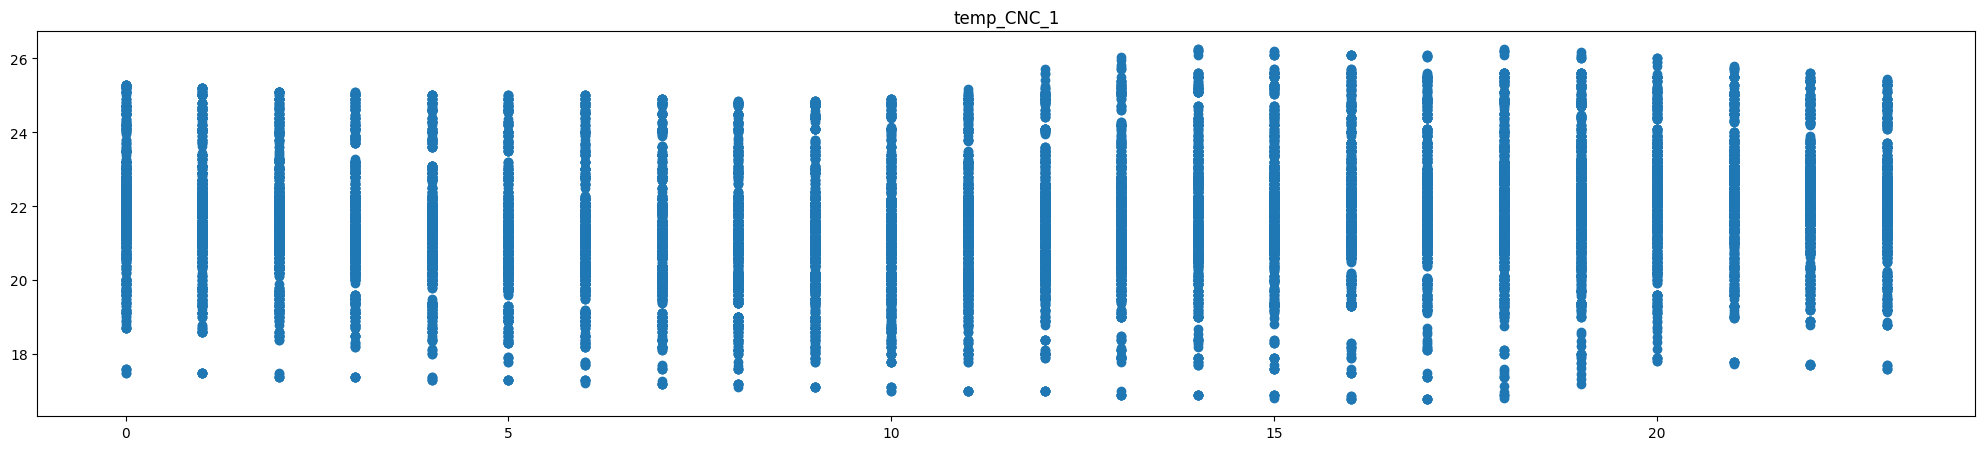

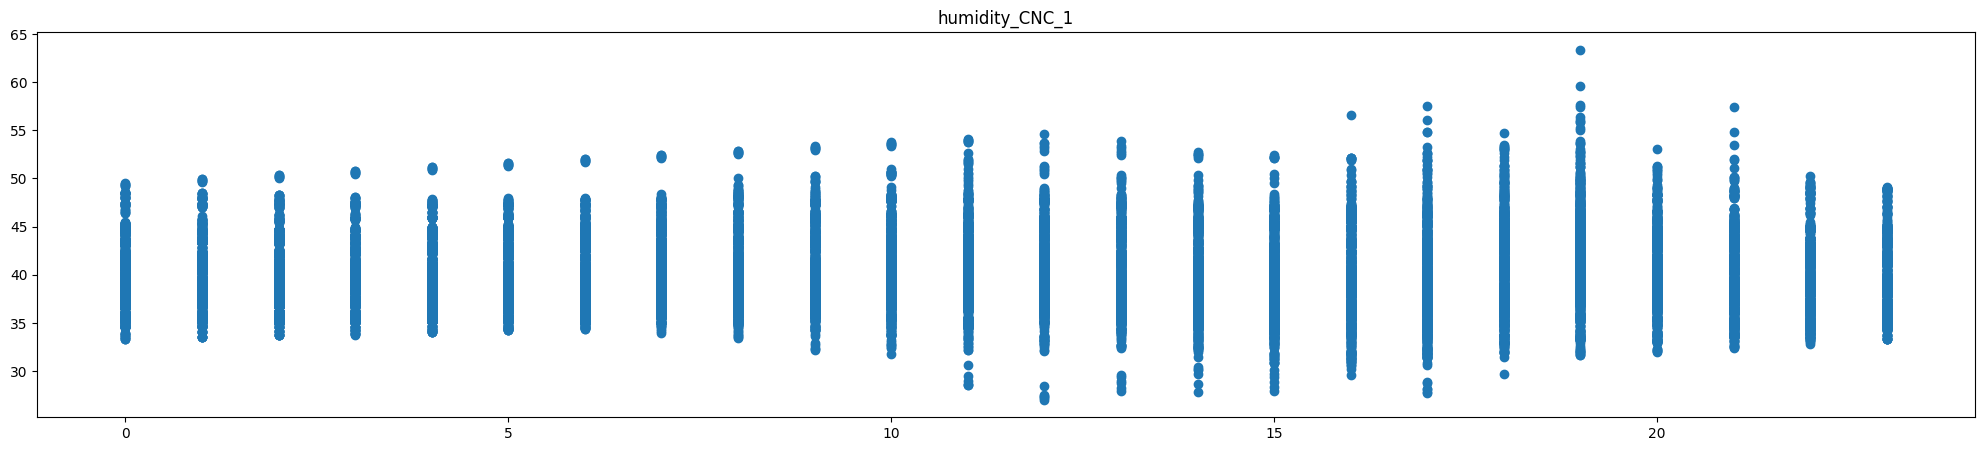

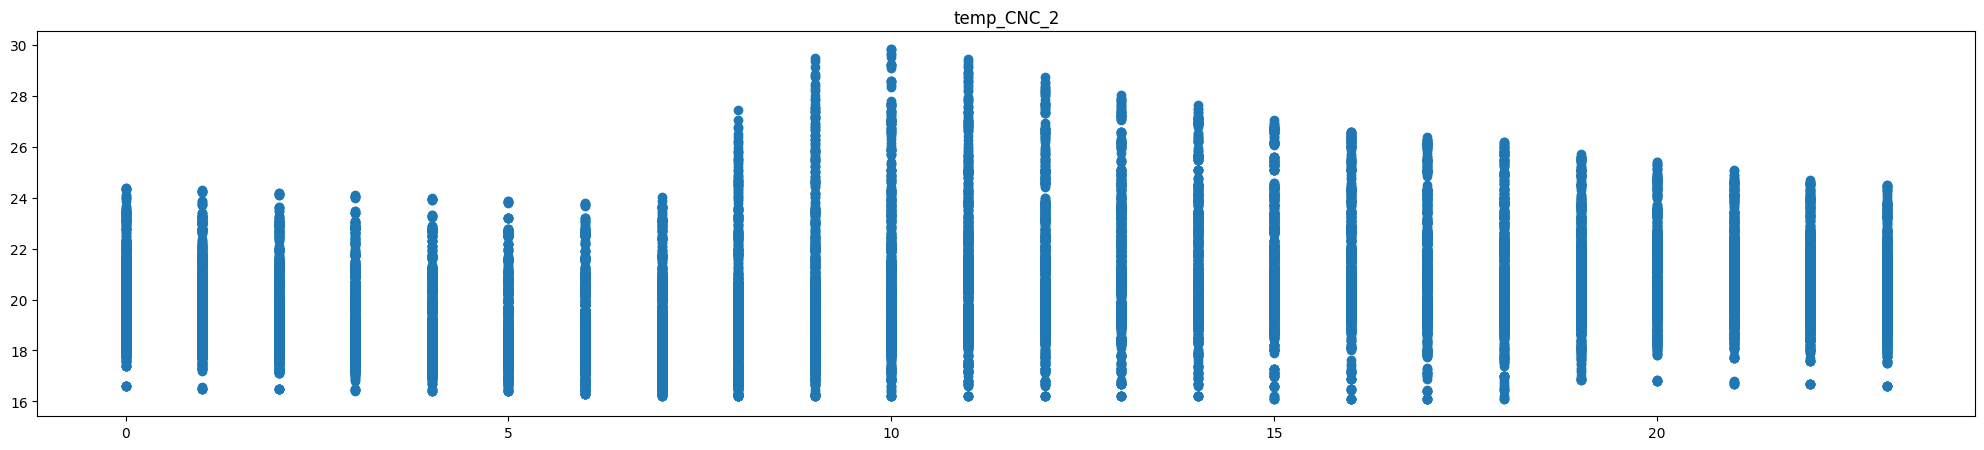

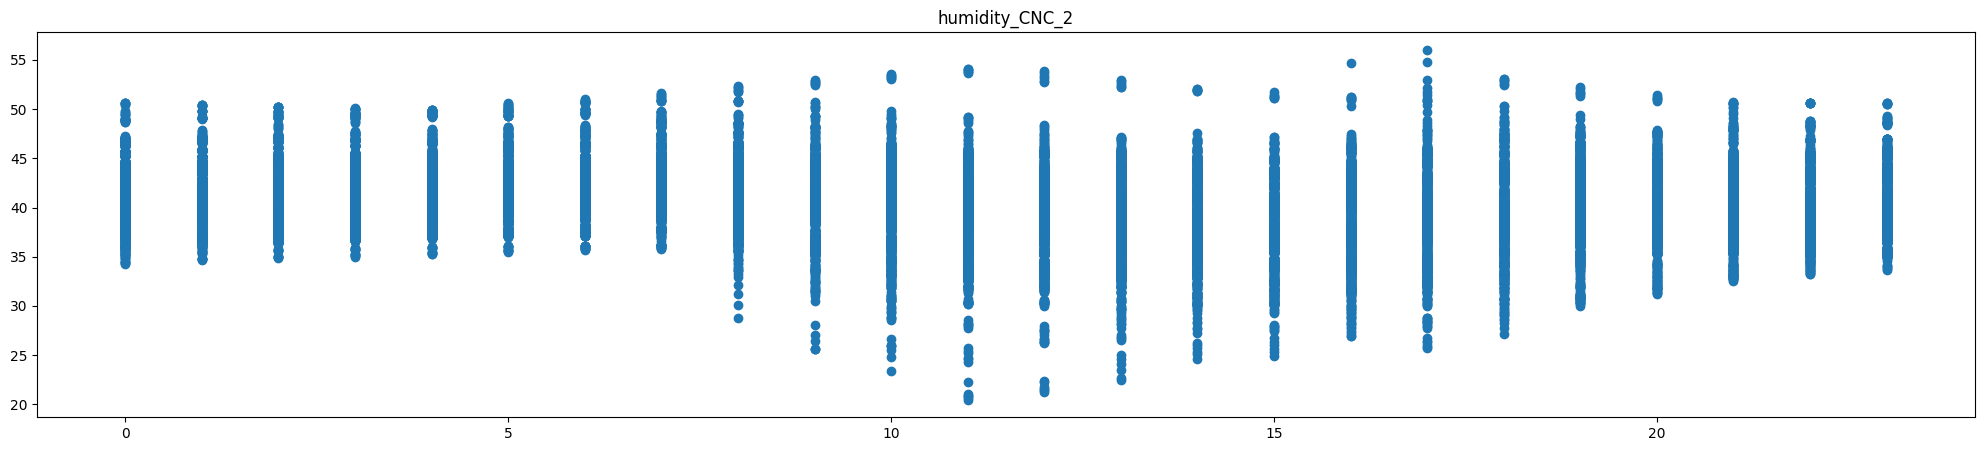

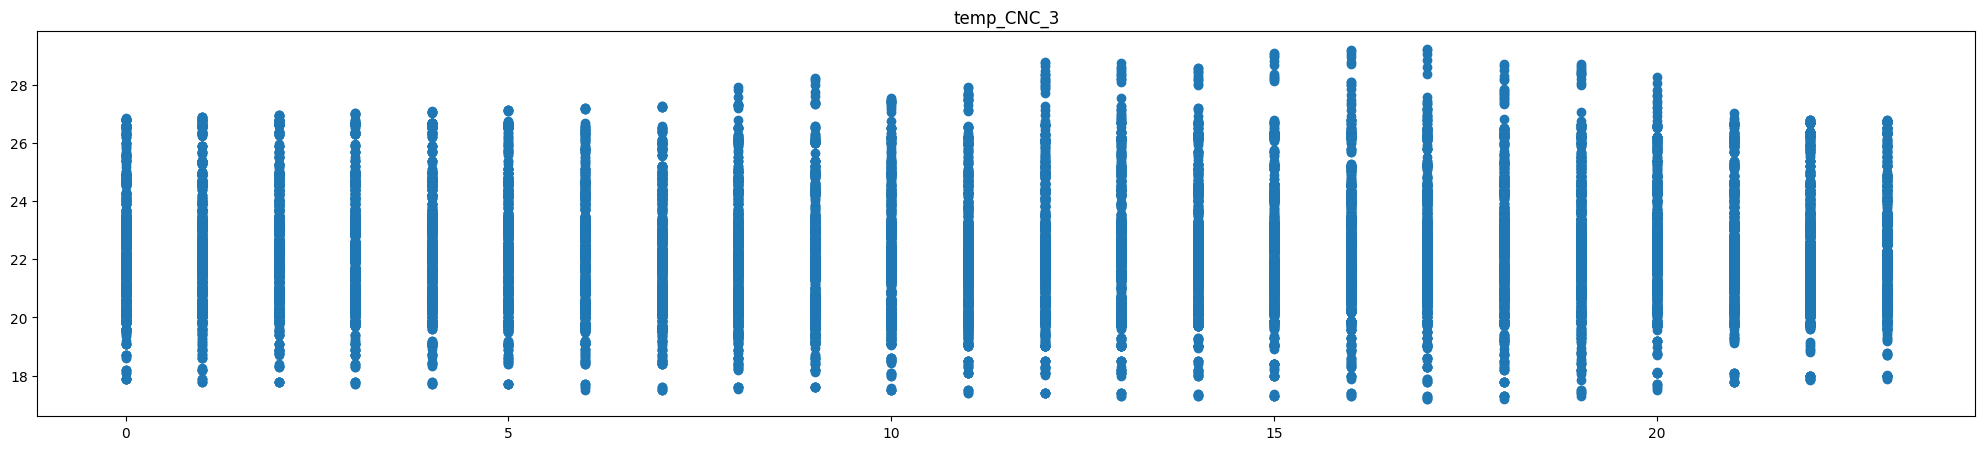

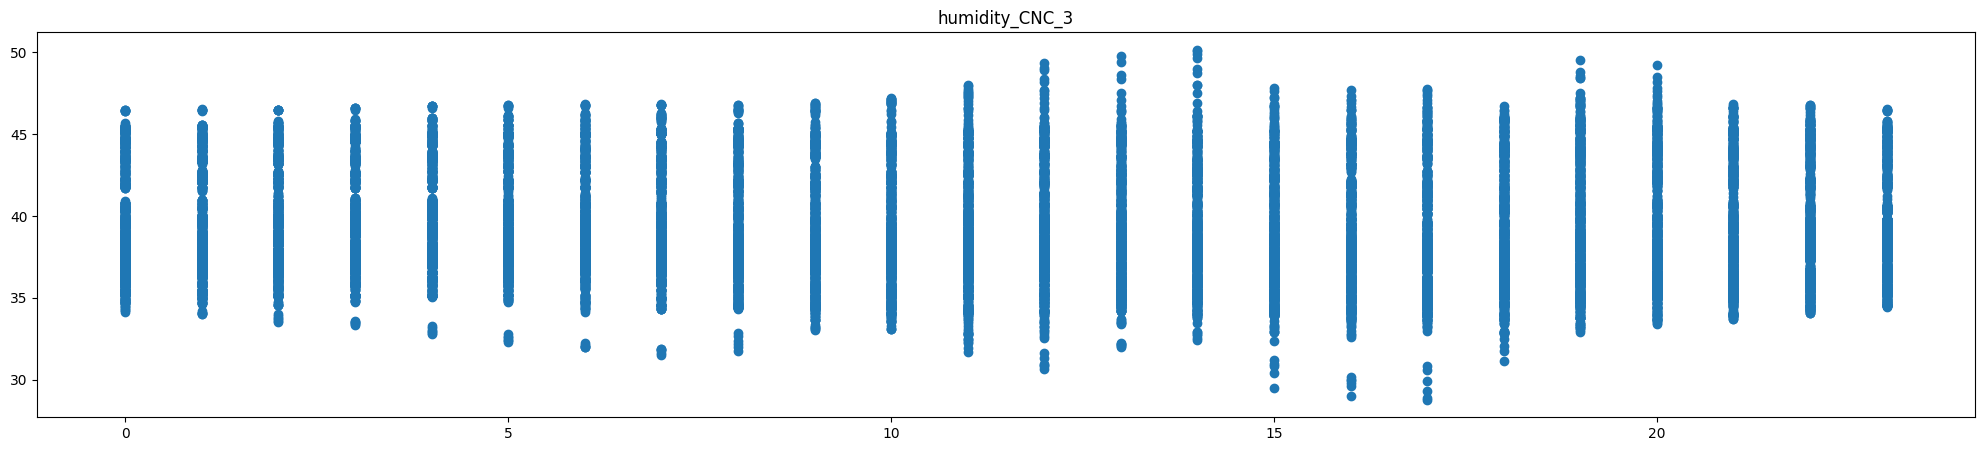

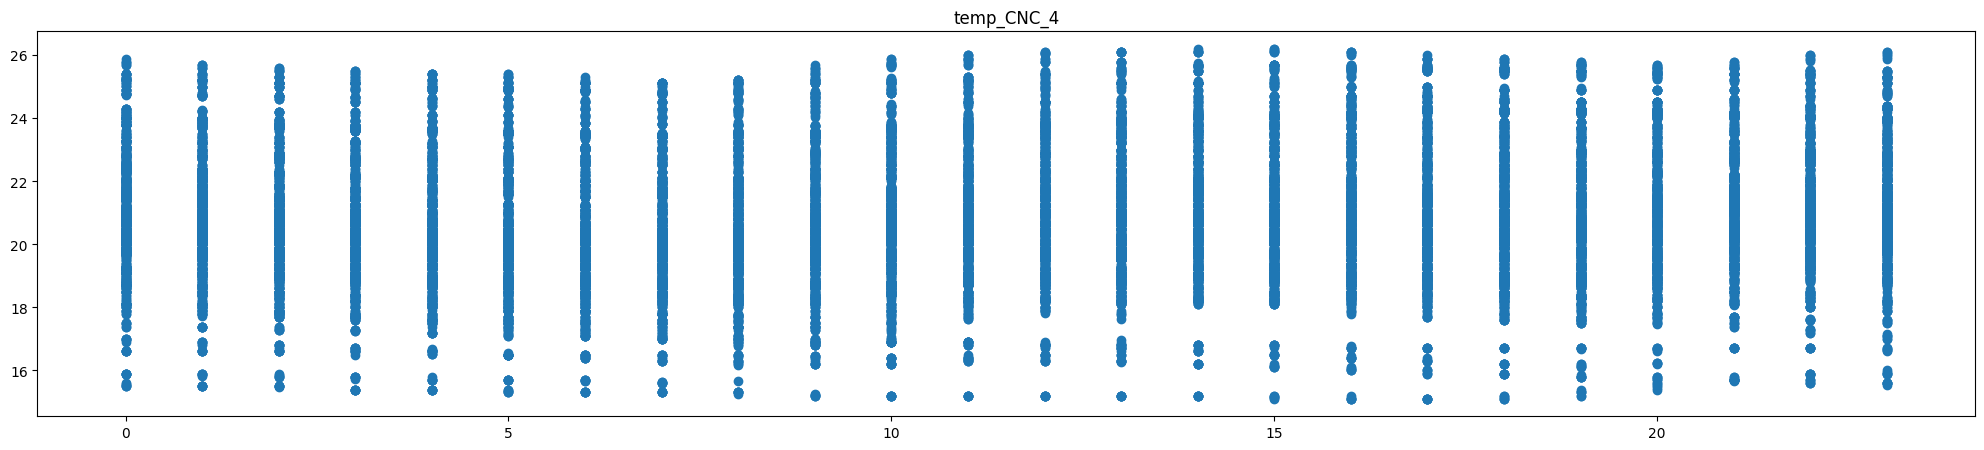

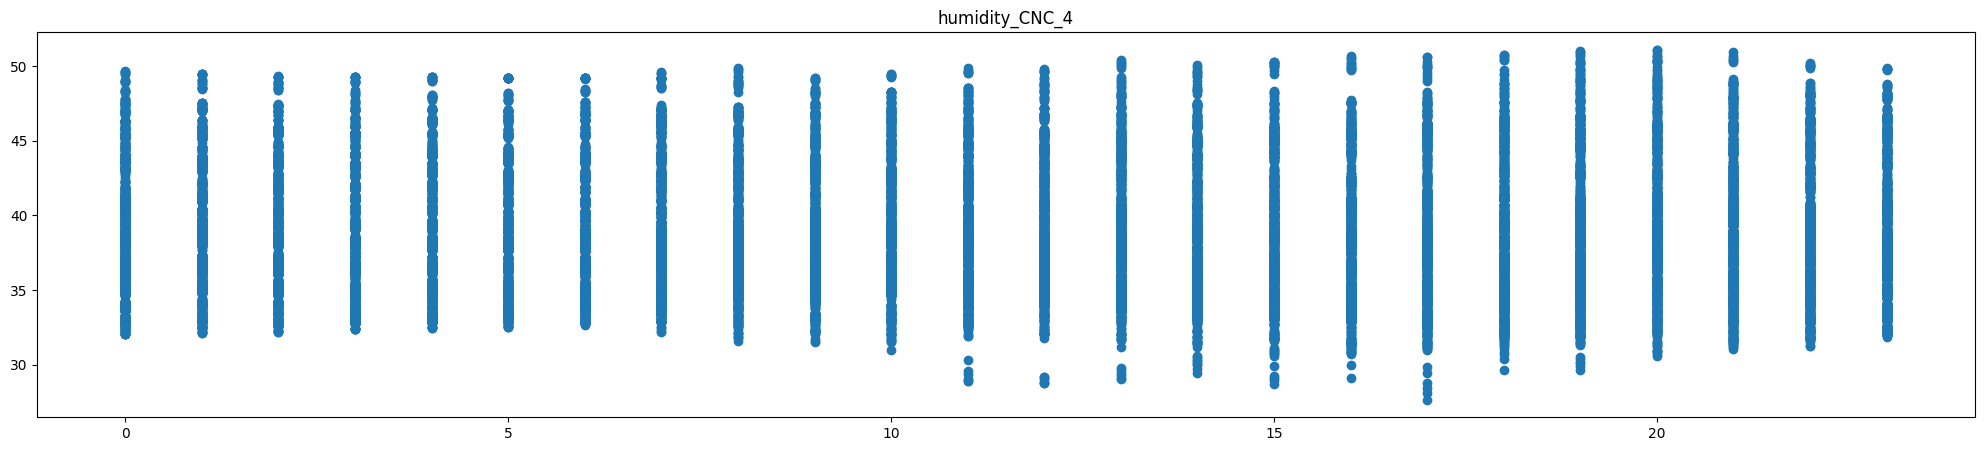

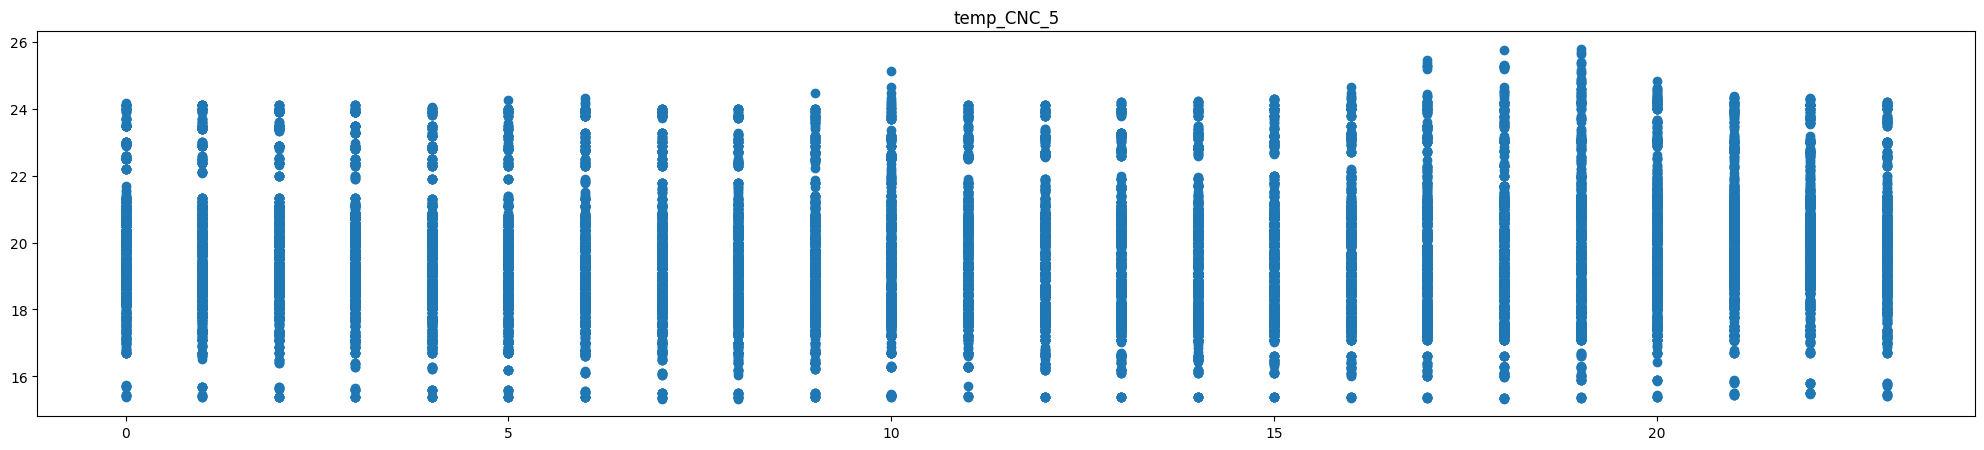

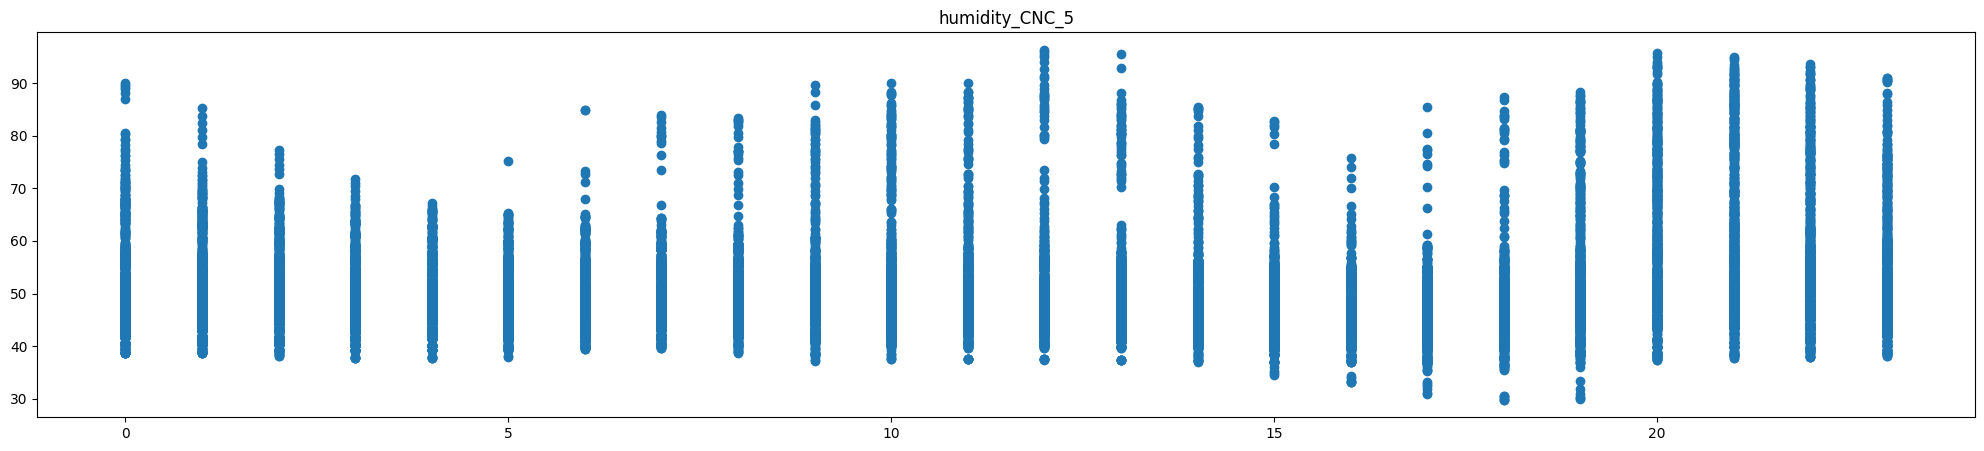

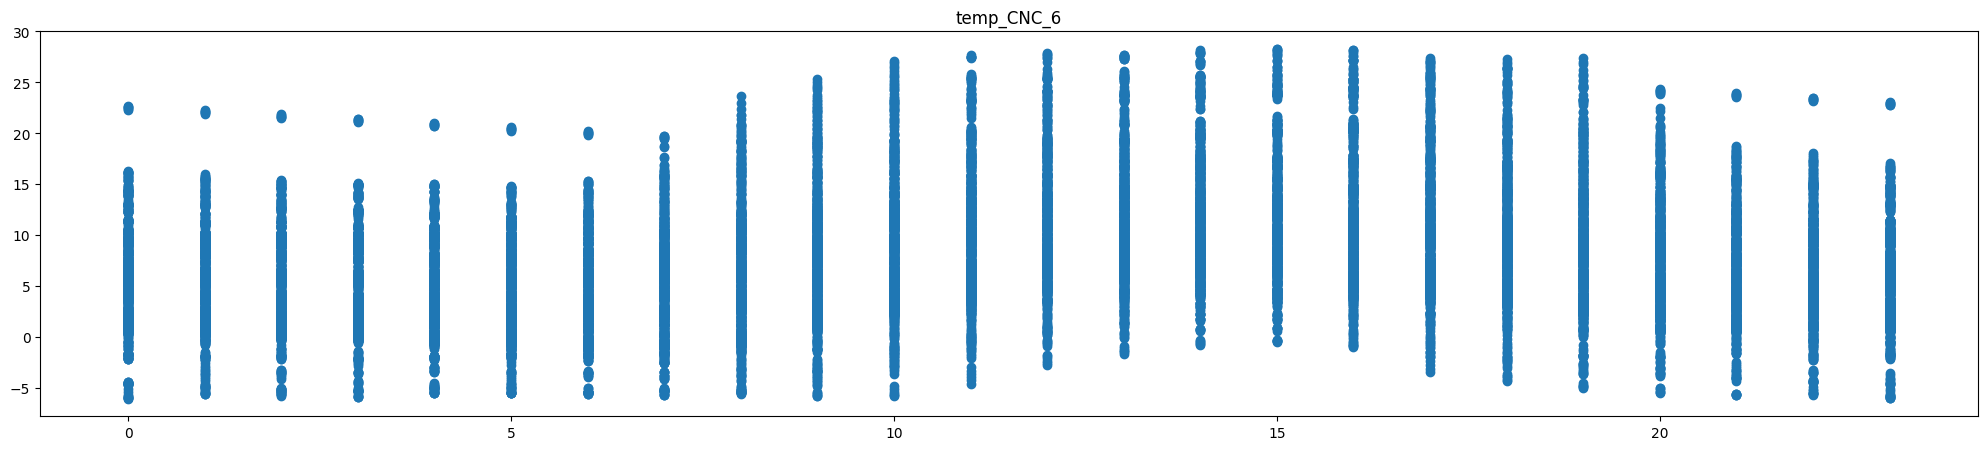

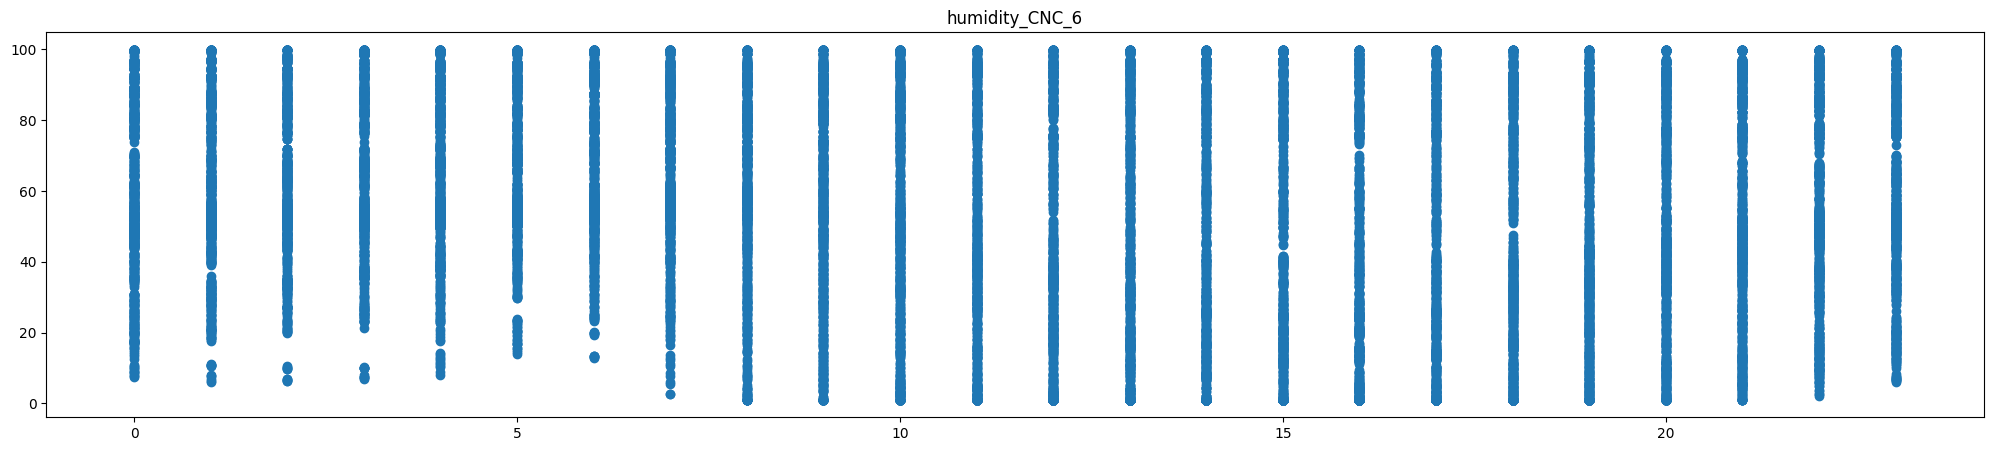

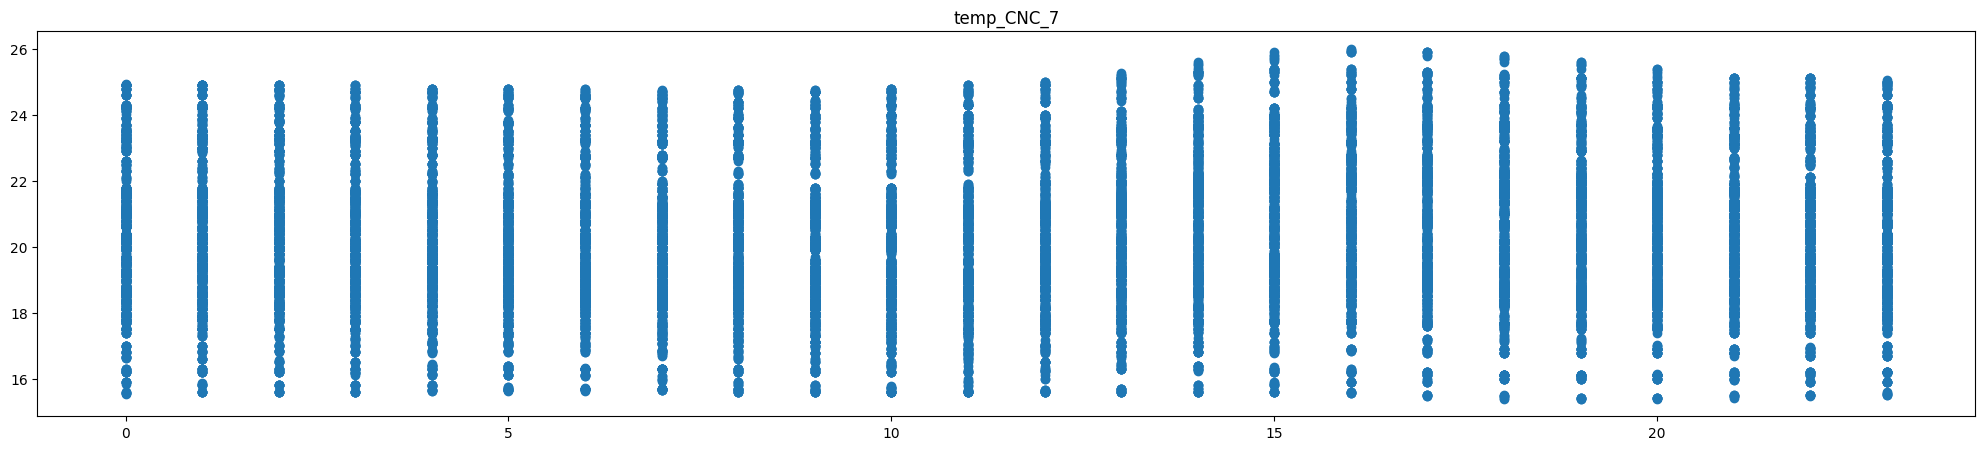

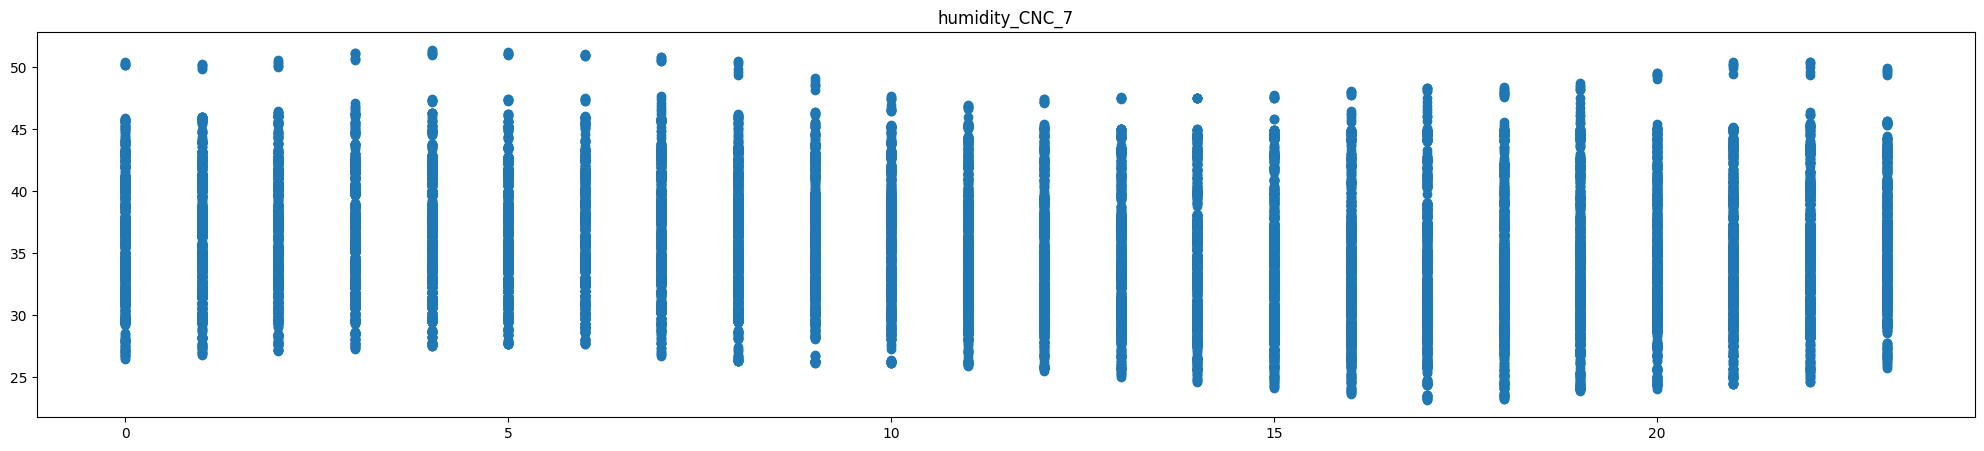

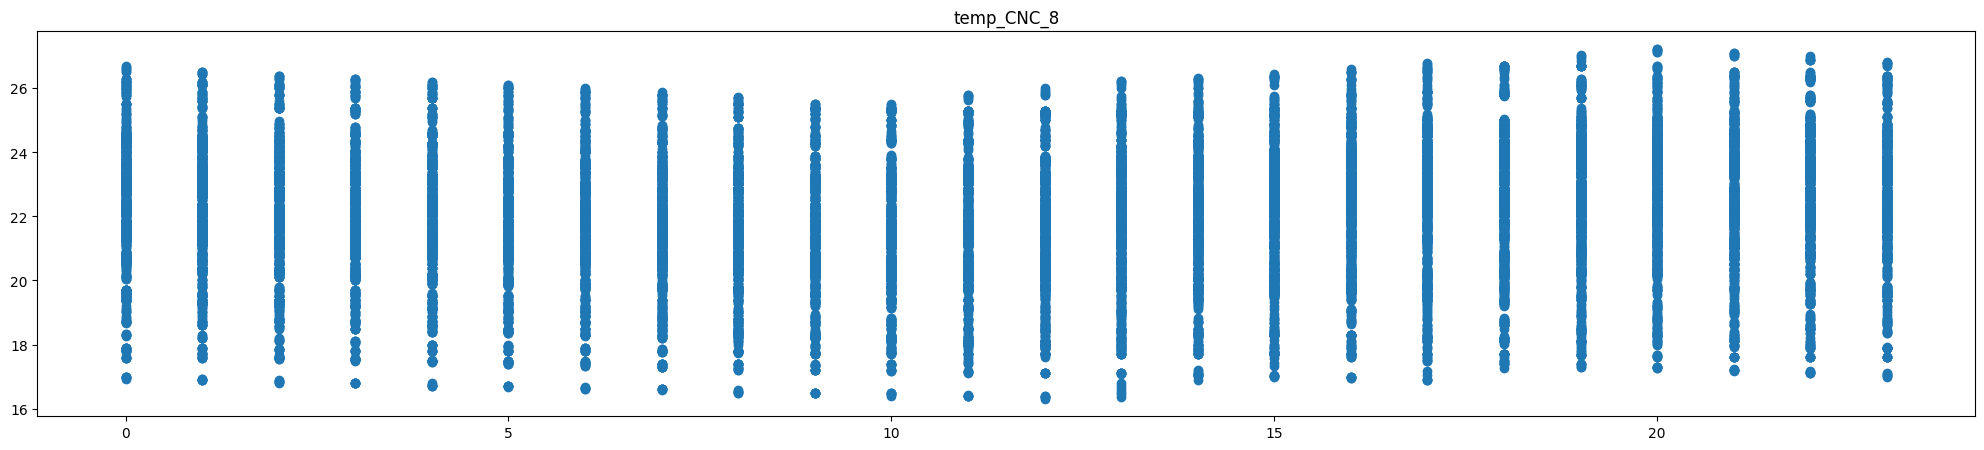

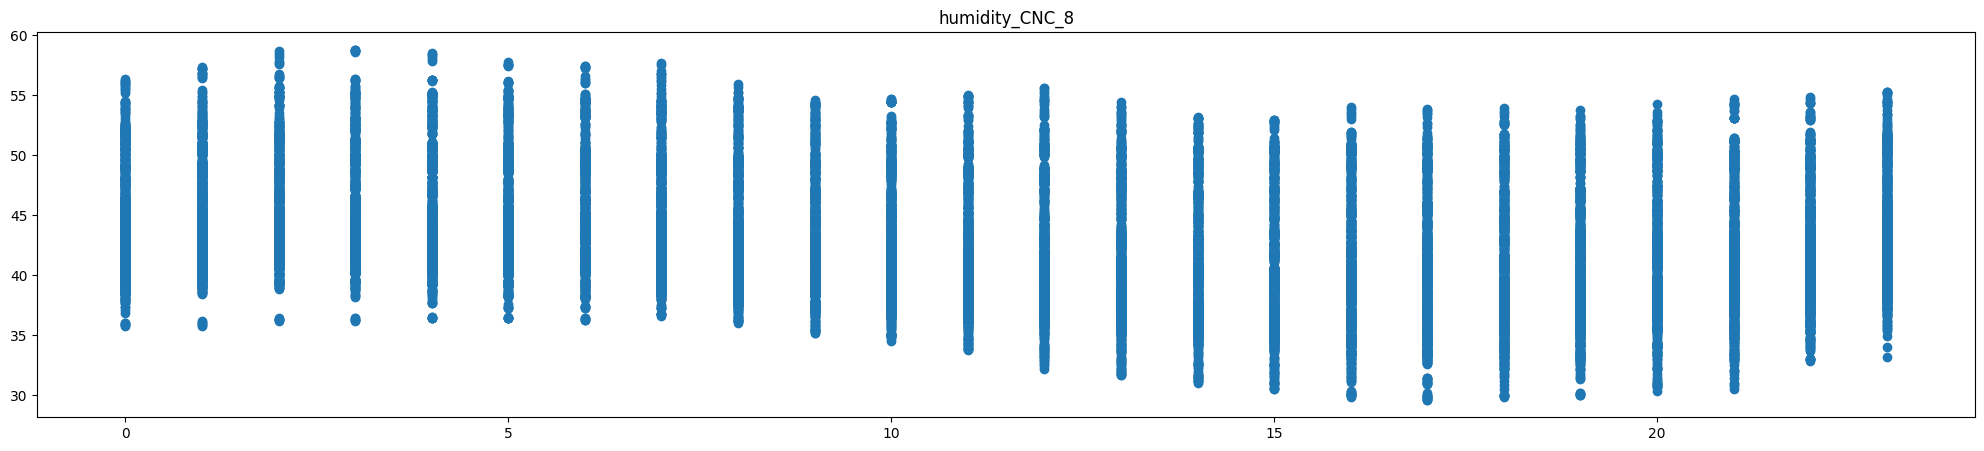

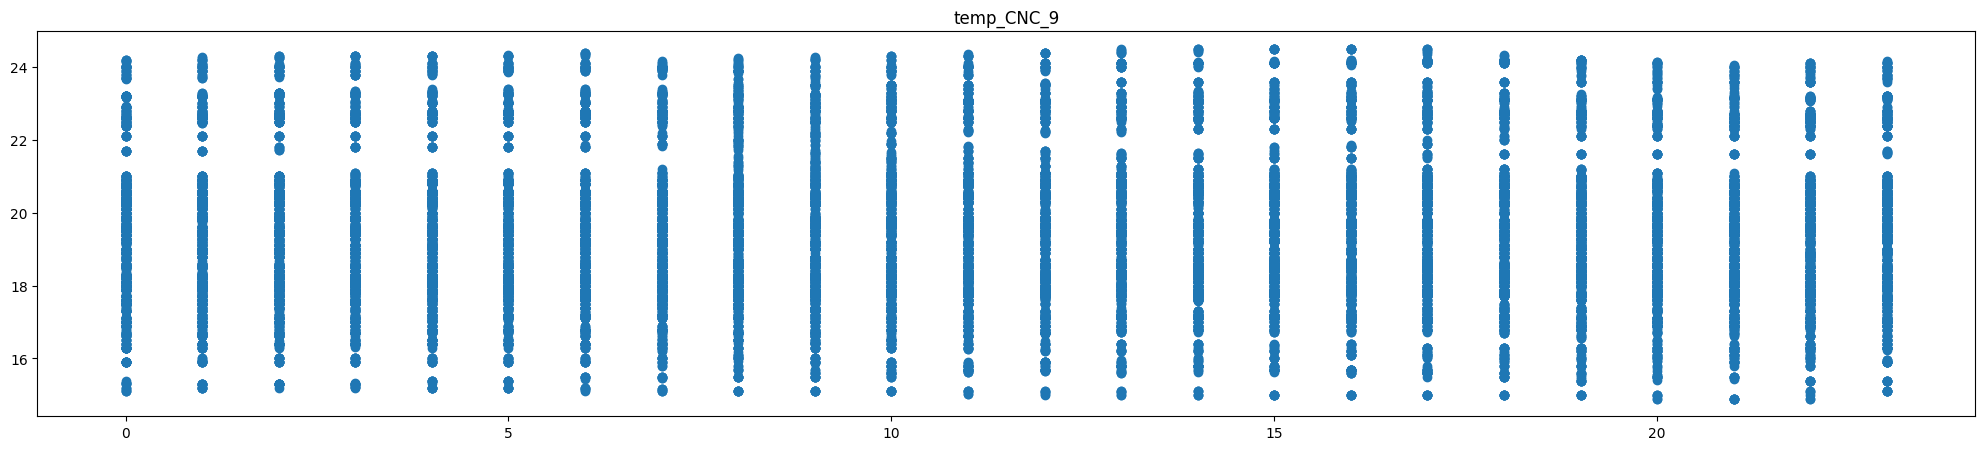

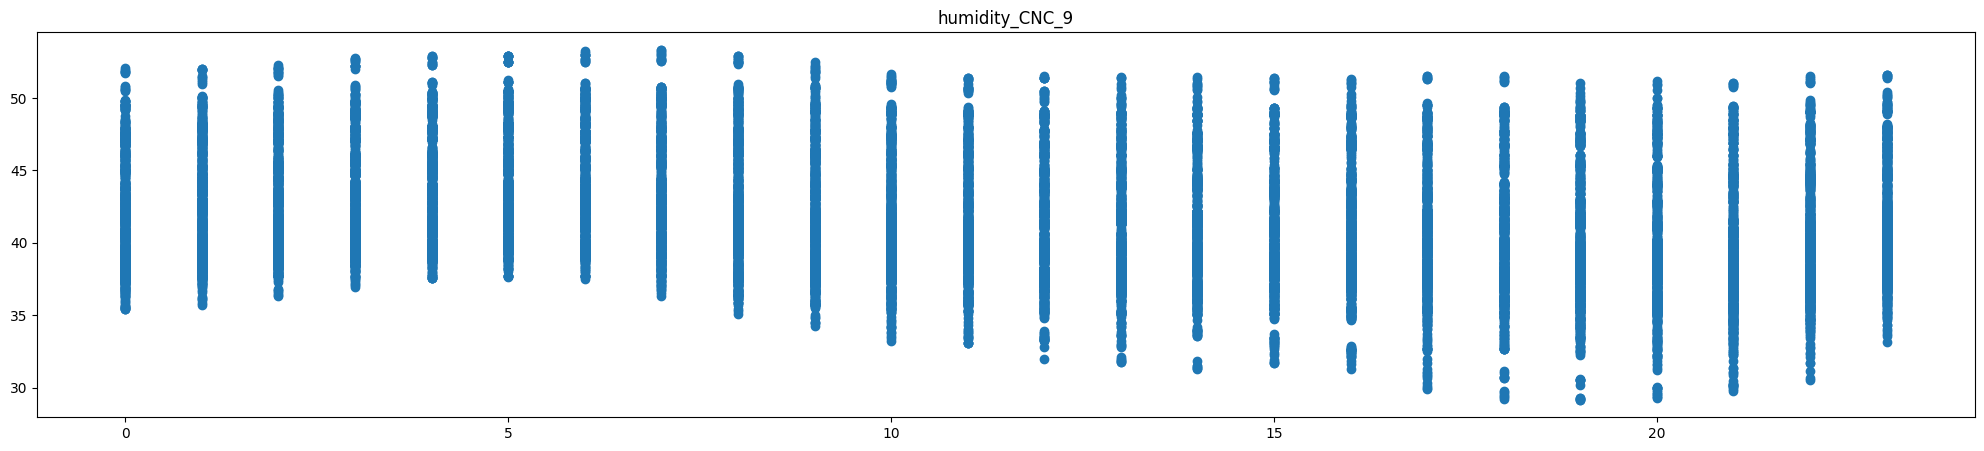

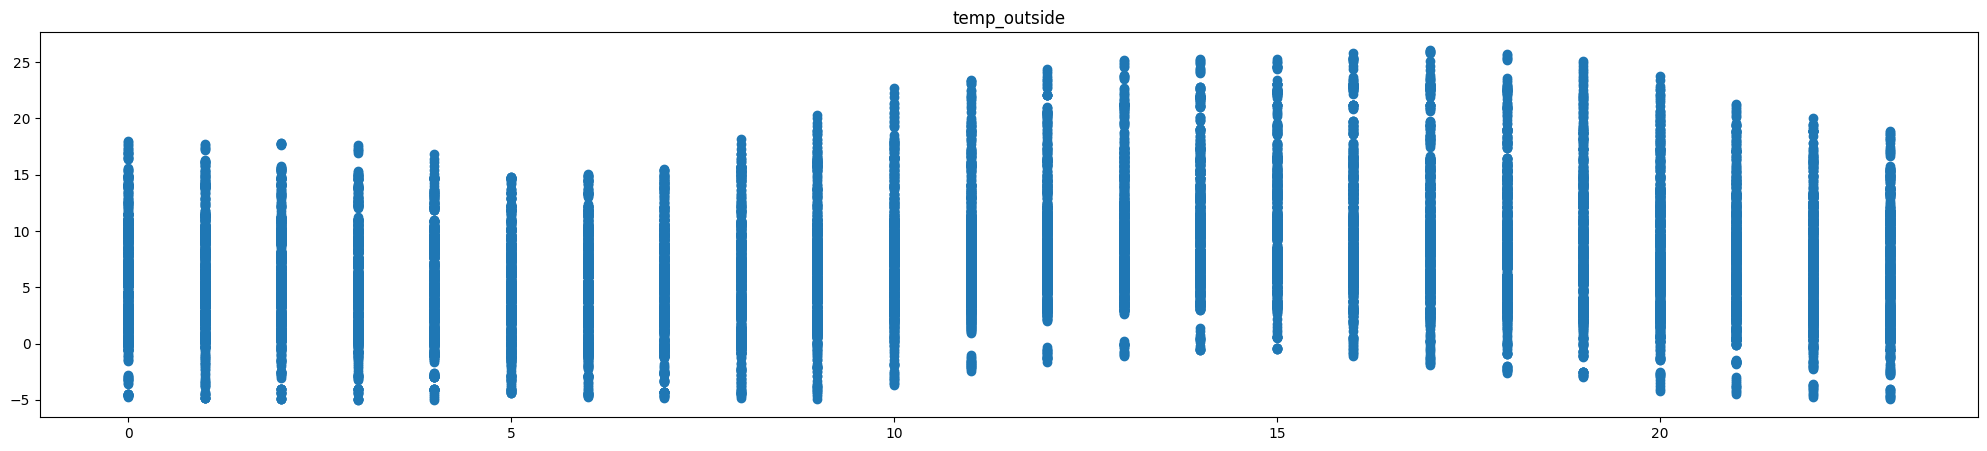

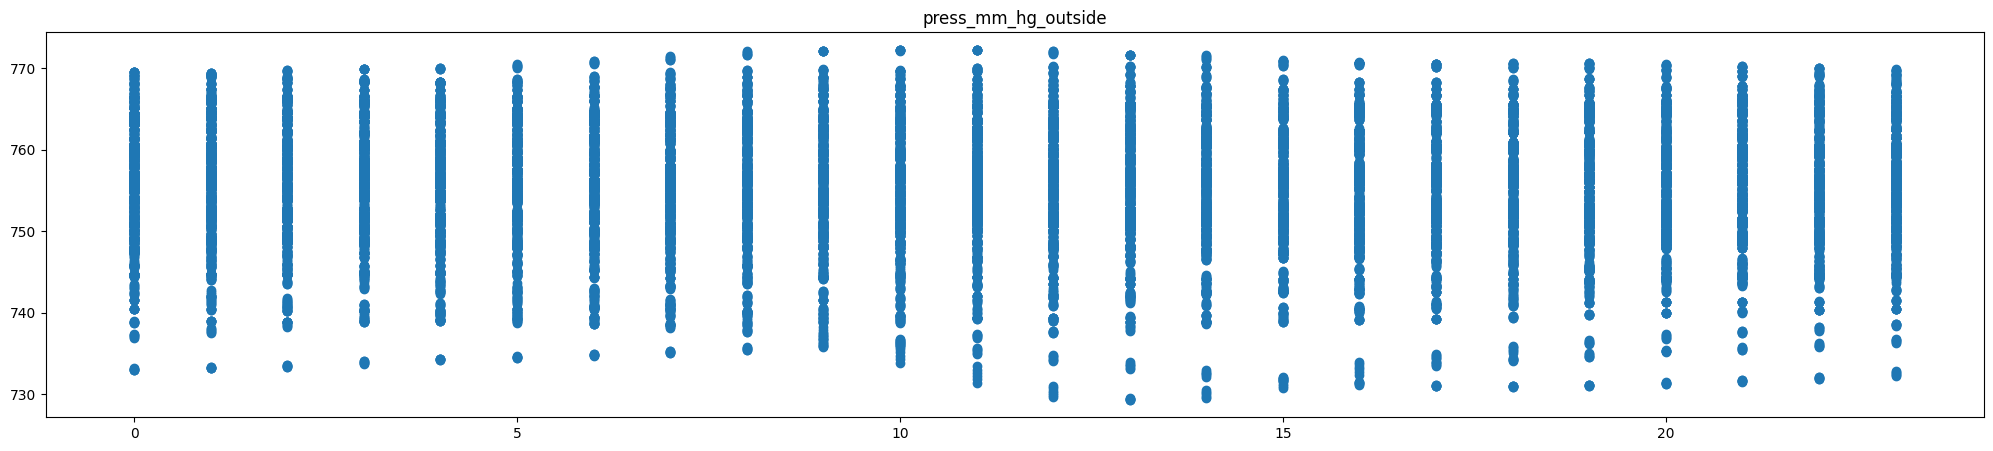

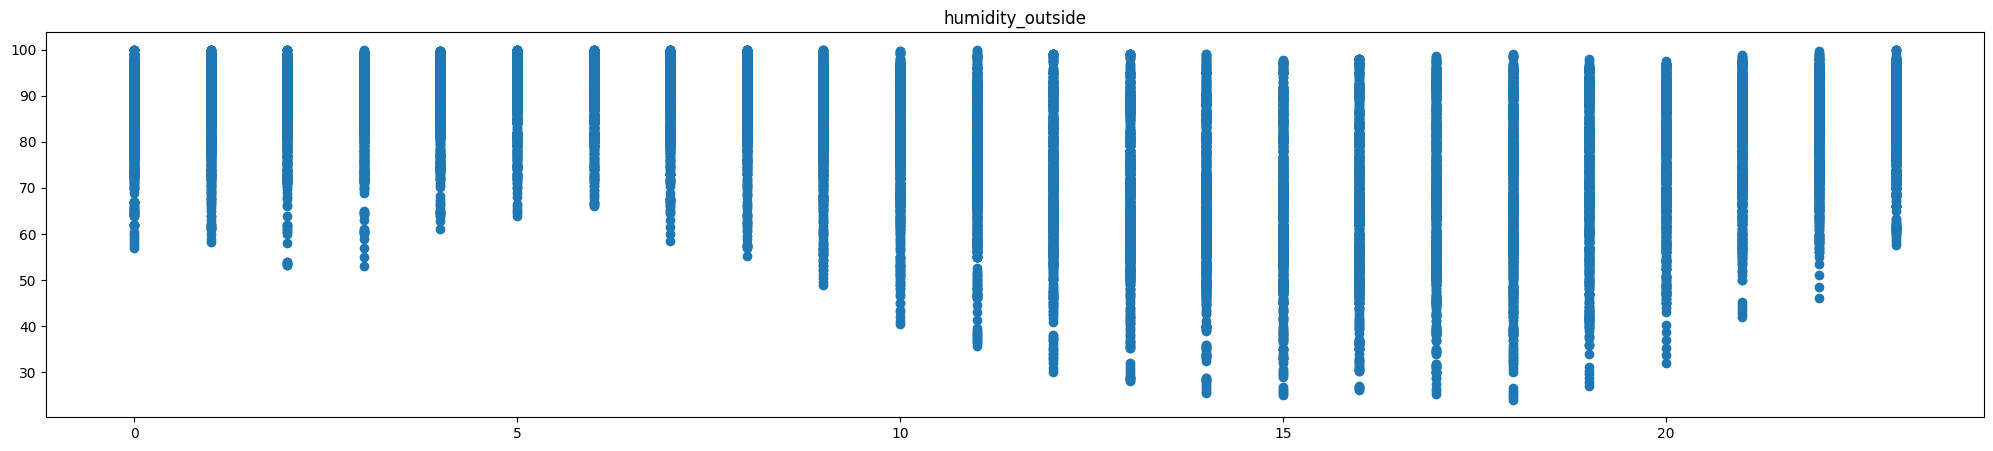

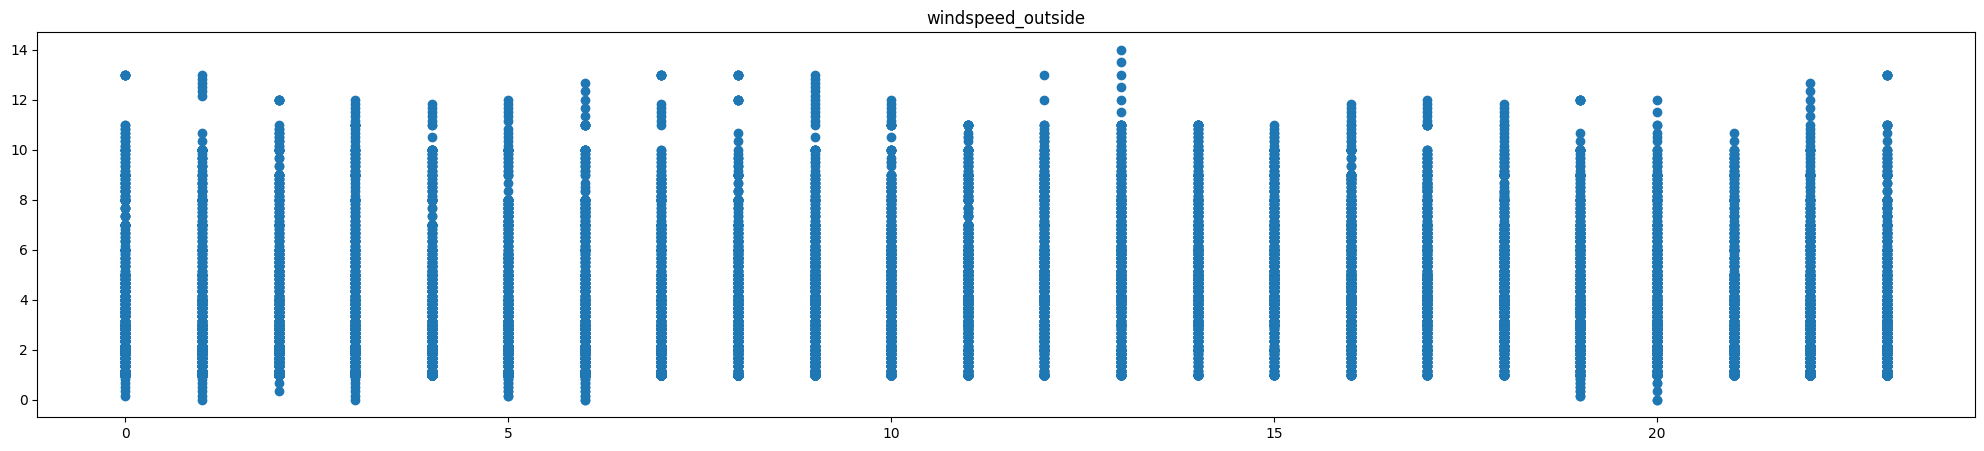

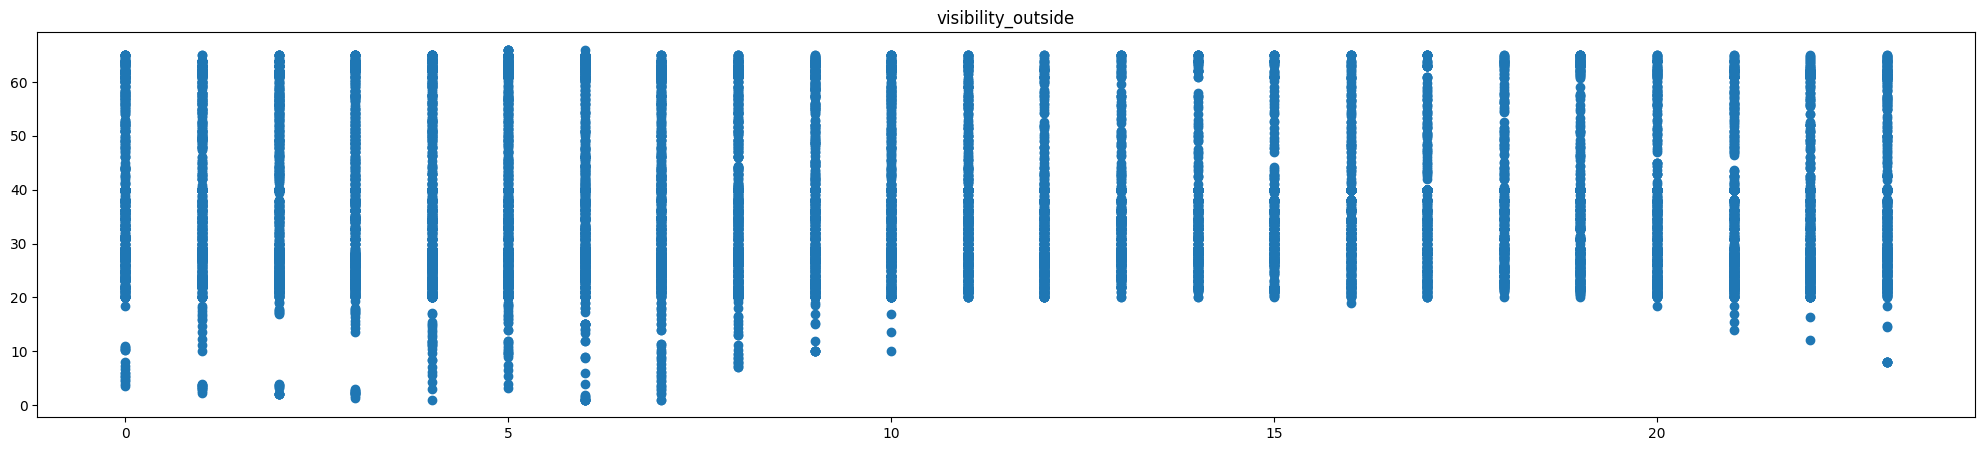

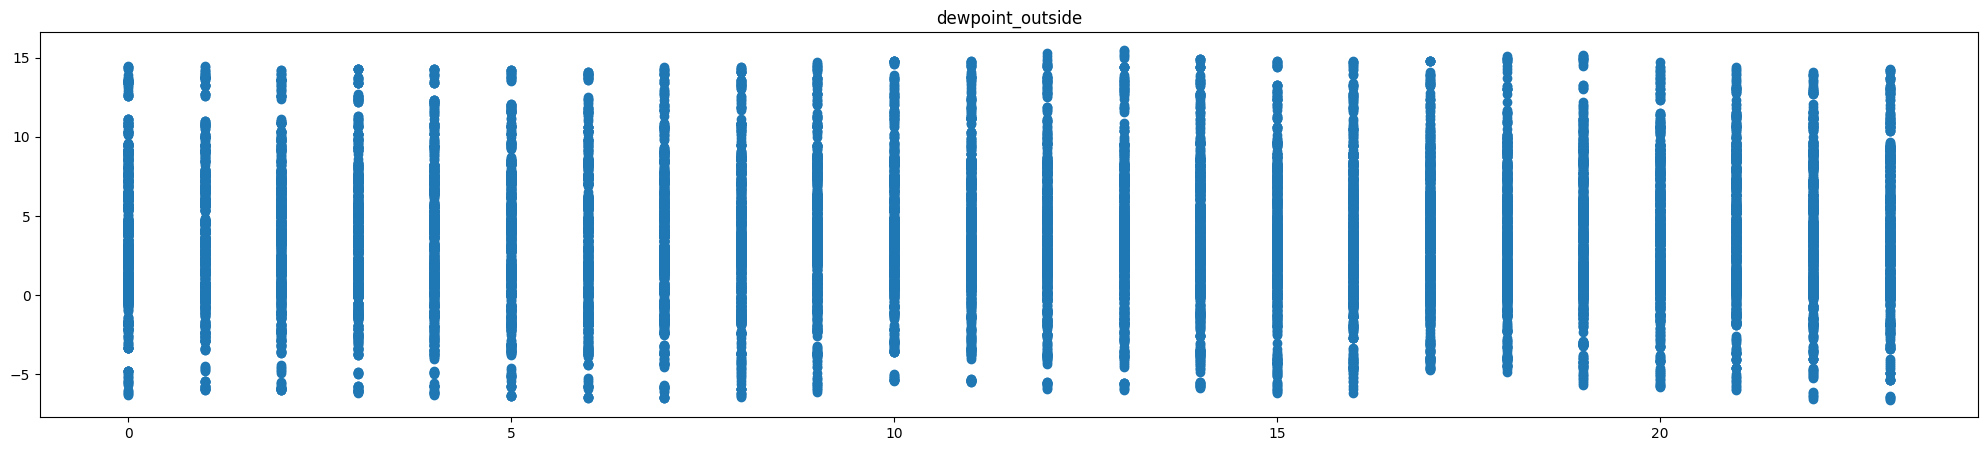

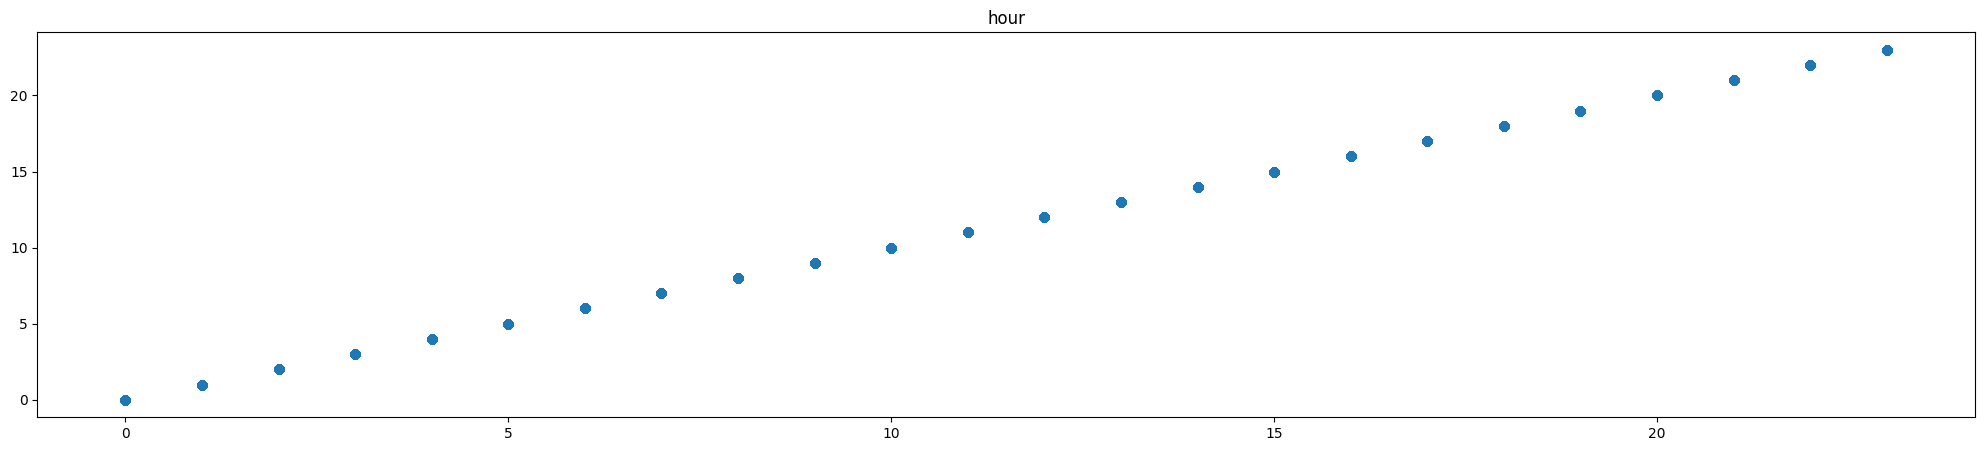

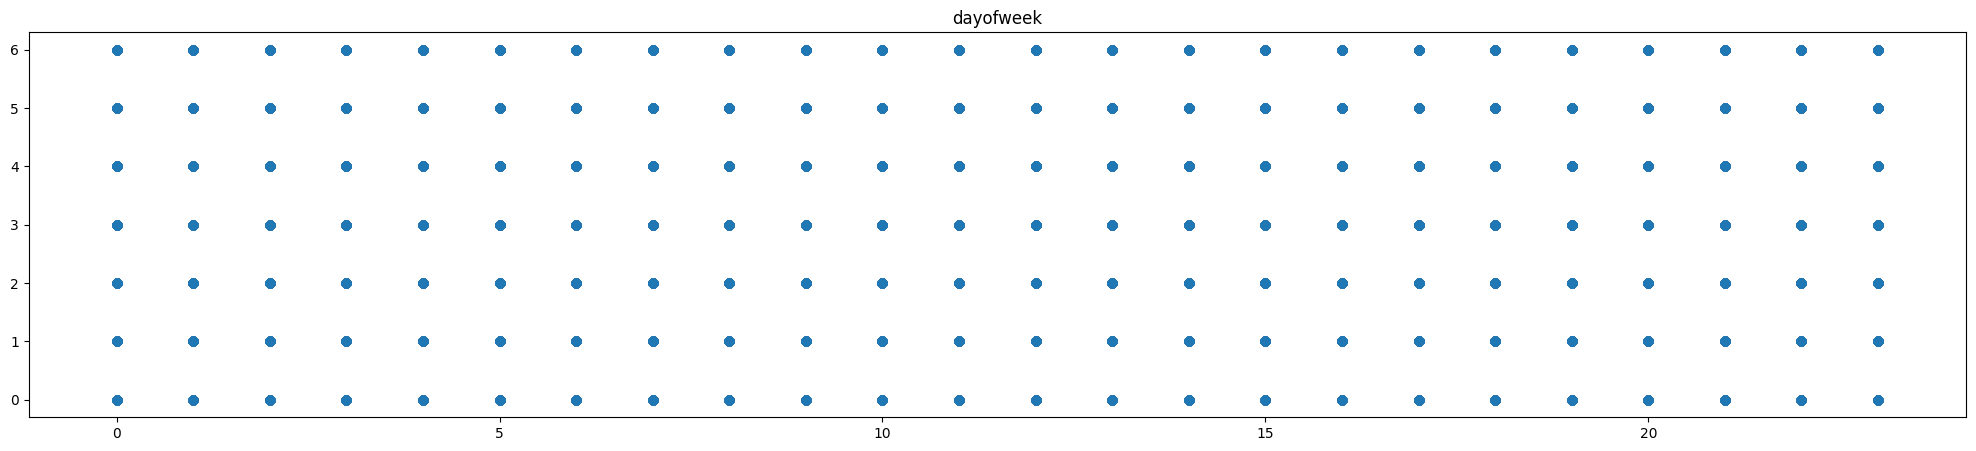

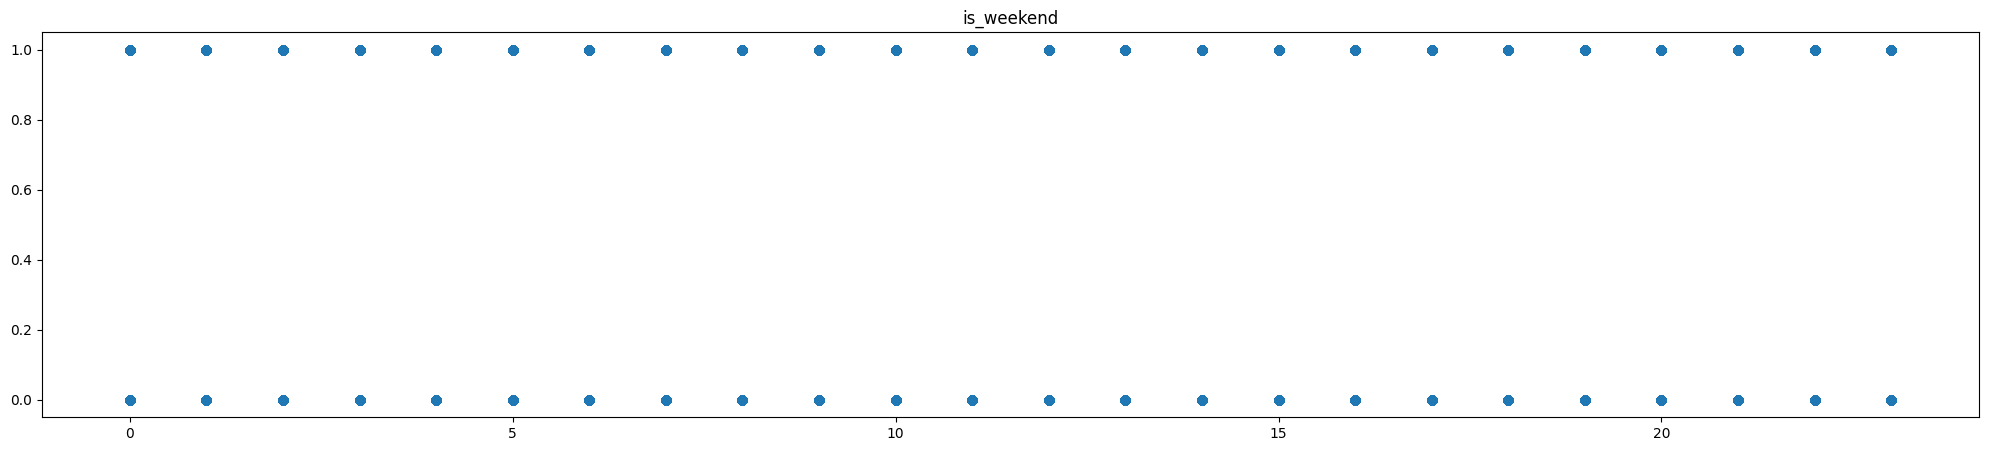

In [11]:
for col in df_sorted.columns[1:]:
    plt.figure(figsize=(25, 5))
    plt.scatter(df_sorted["hour"], df_sorted[col])
    plt.title(col)
    plt.show()

## L'analisi per ora ha dato insights utili per quanto riguarda il consumo, descrivendo come i maggiori picchi di kw sono all'interno del range 16-19


## Analisi per giorno


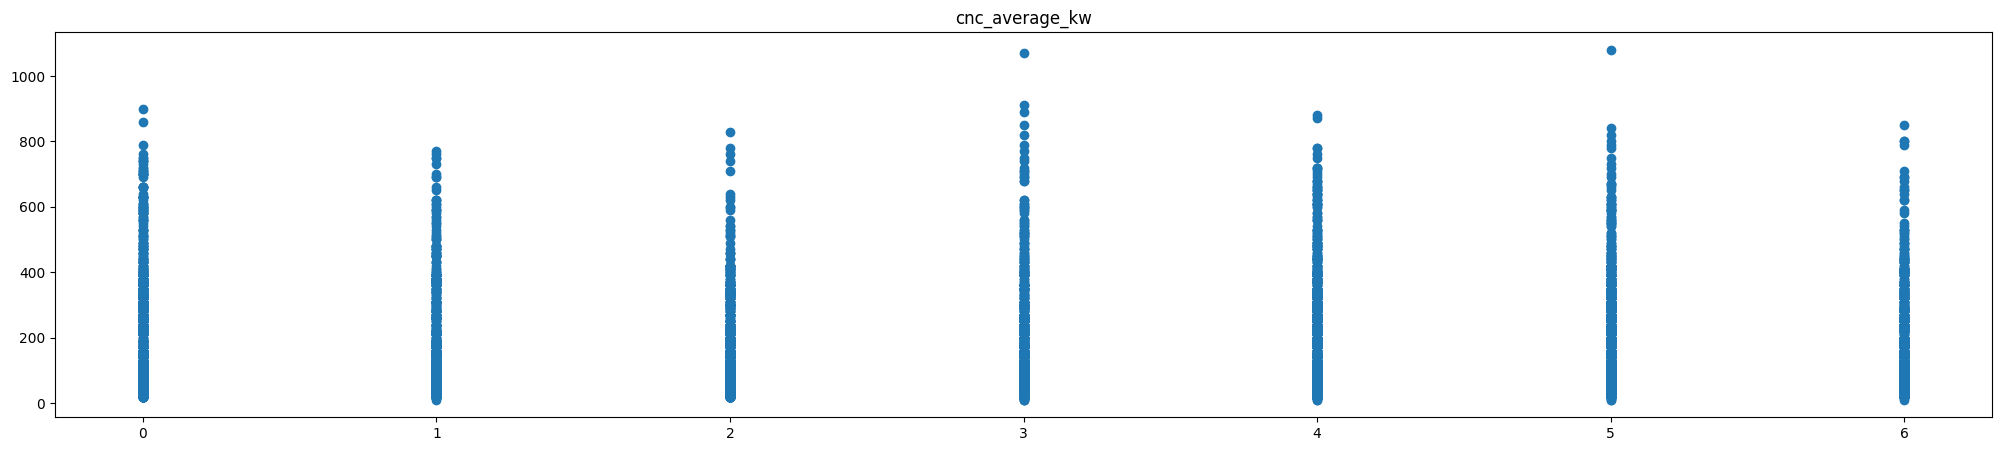

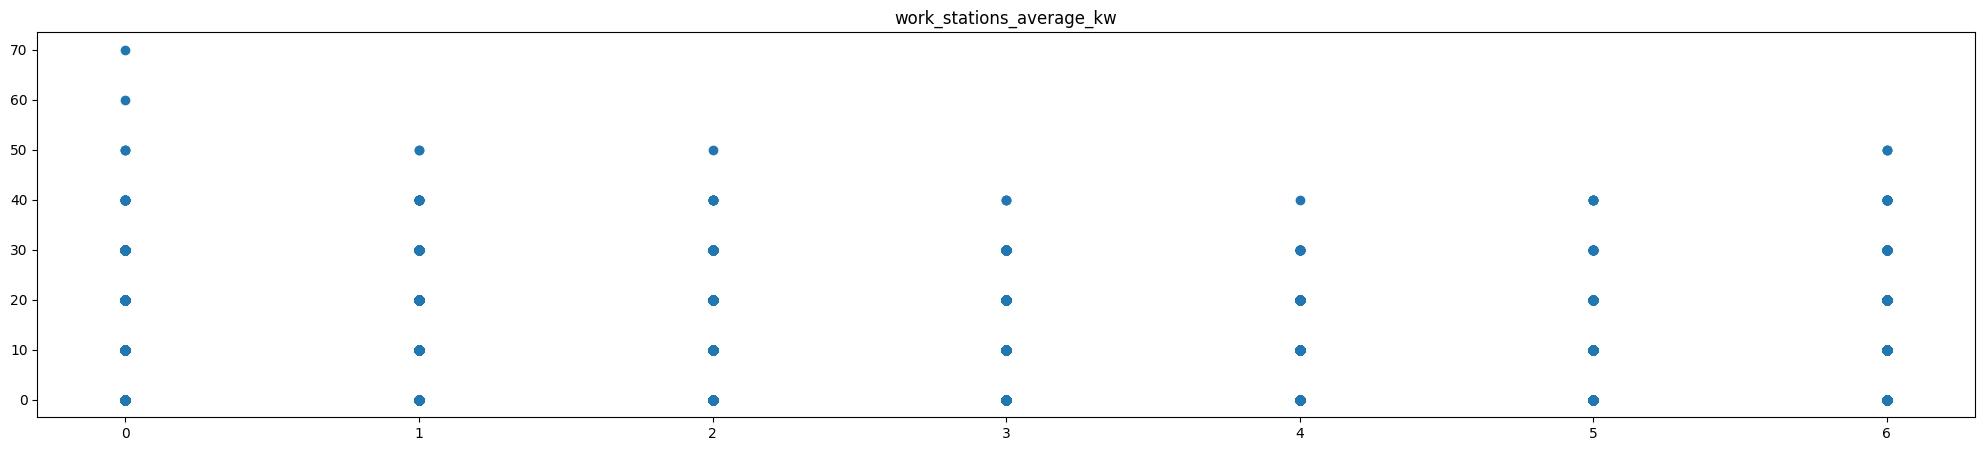

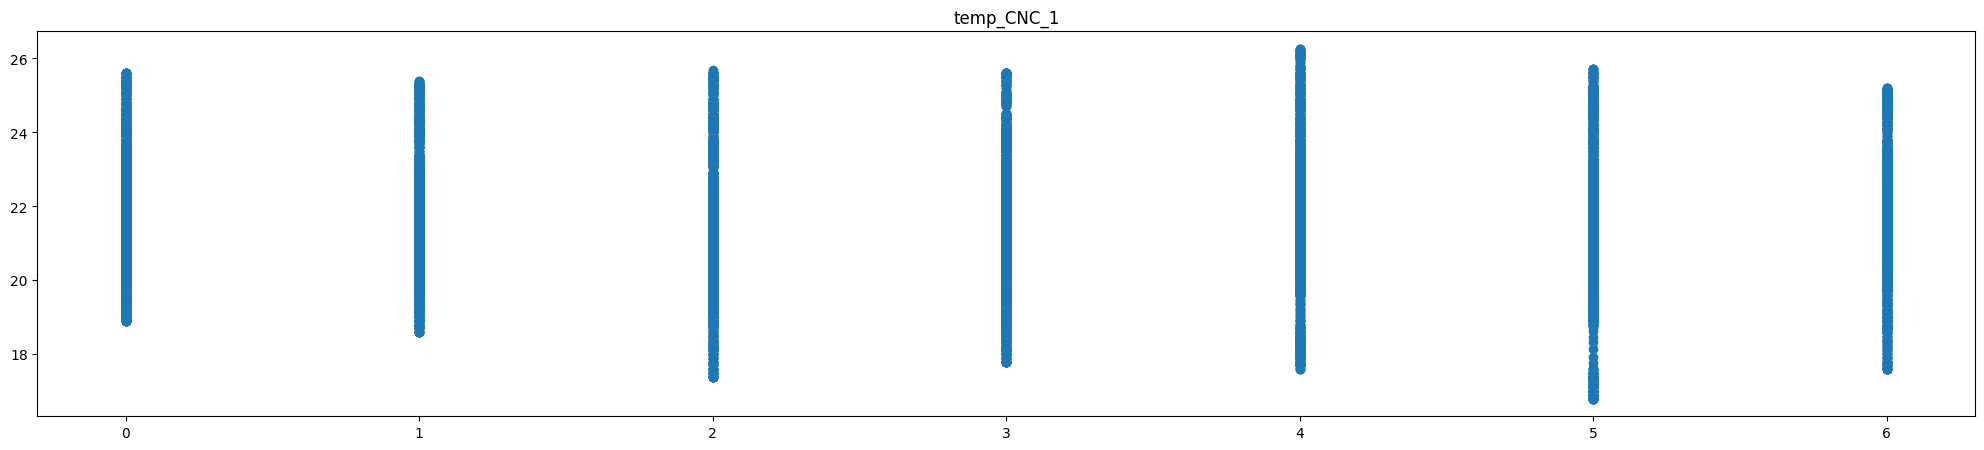

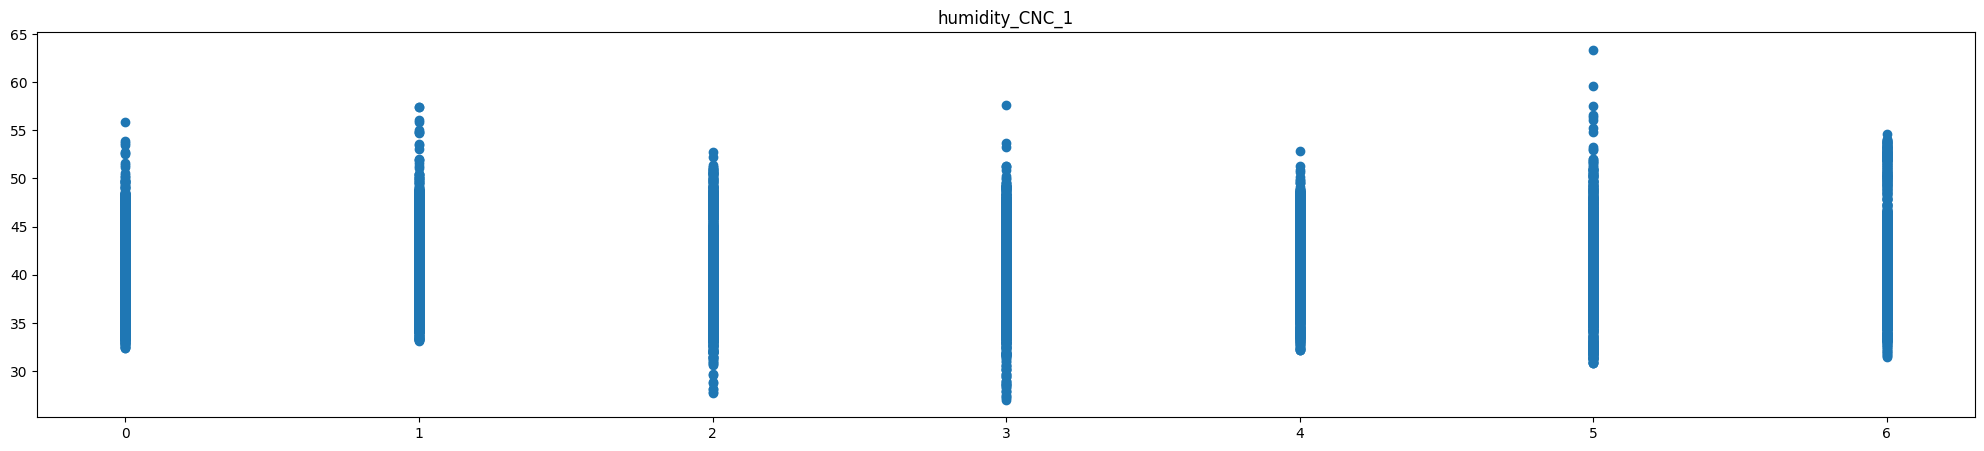

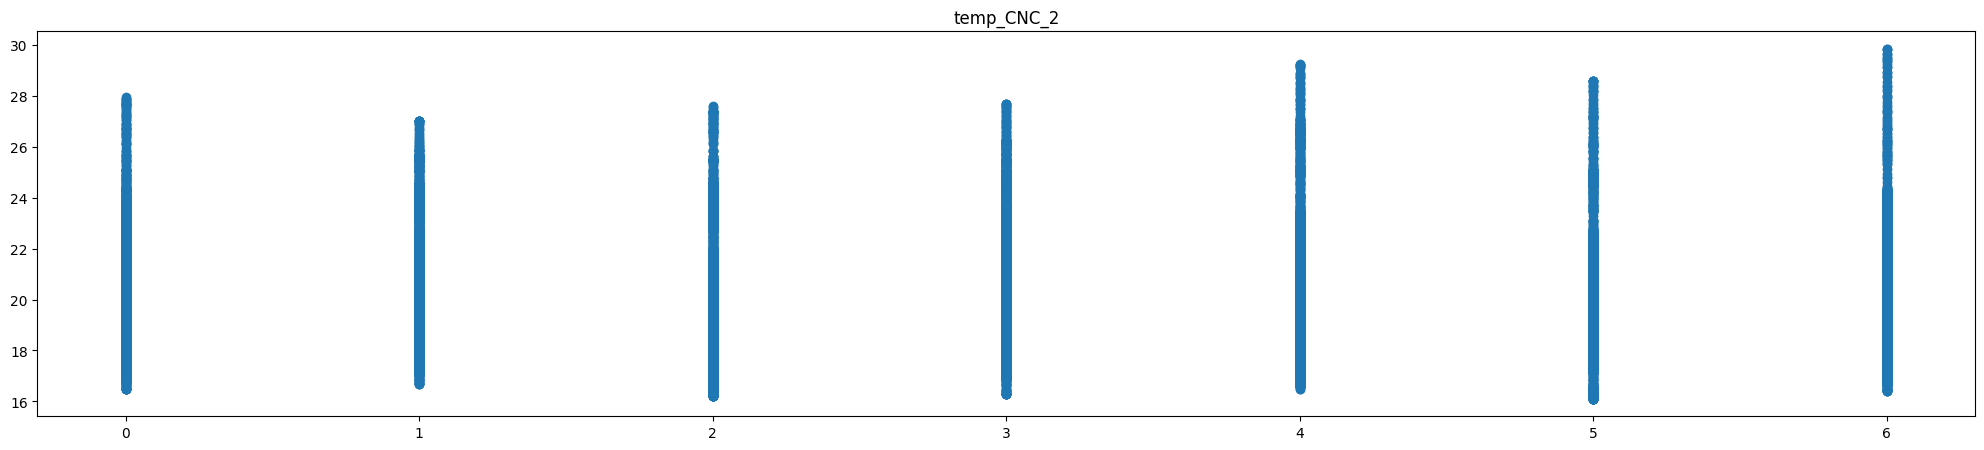

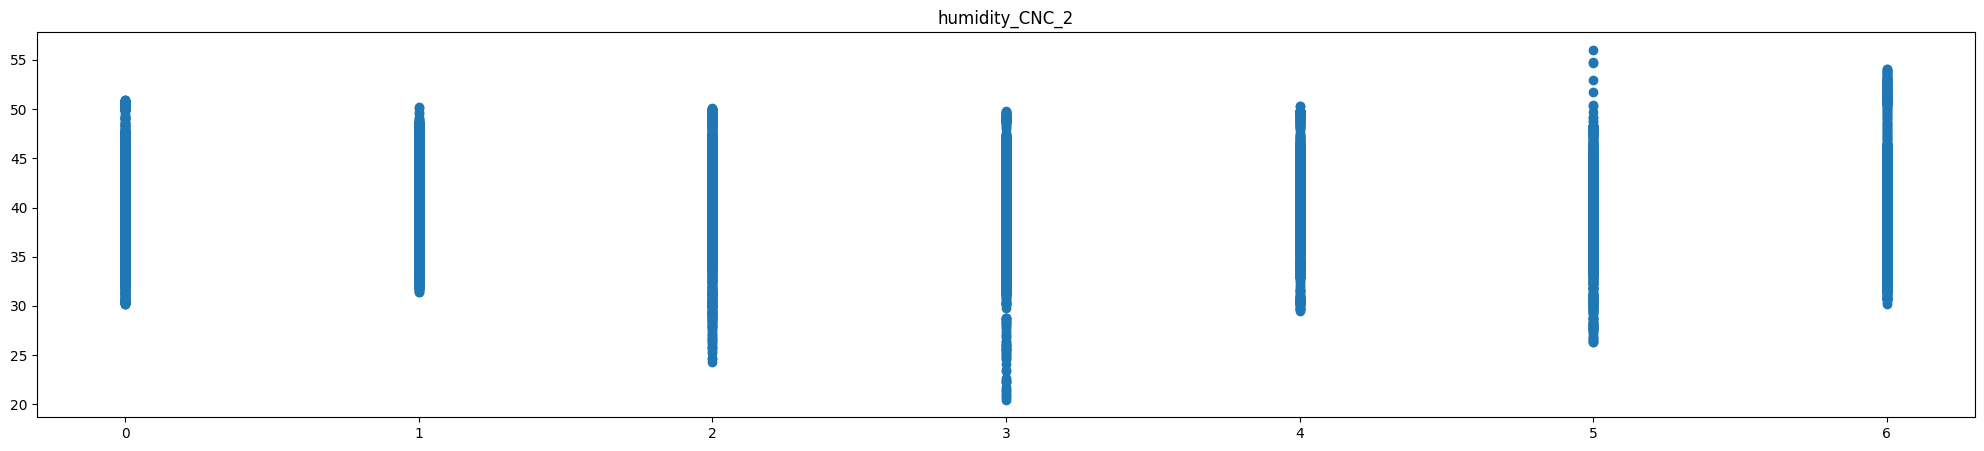

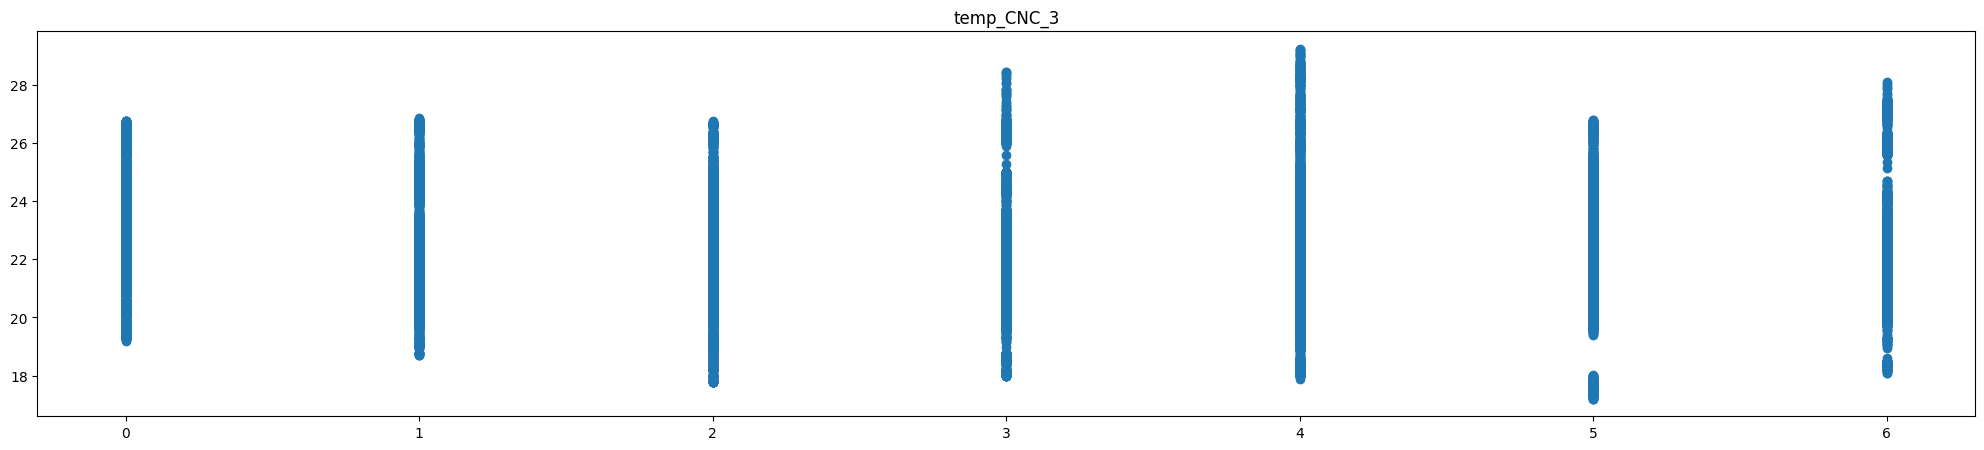

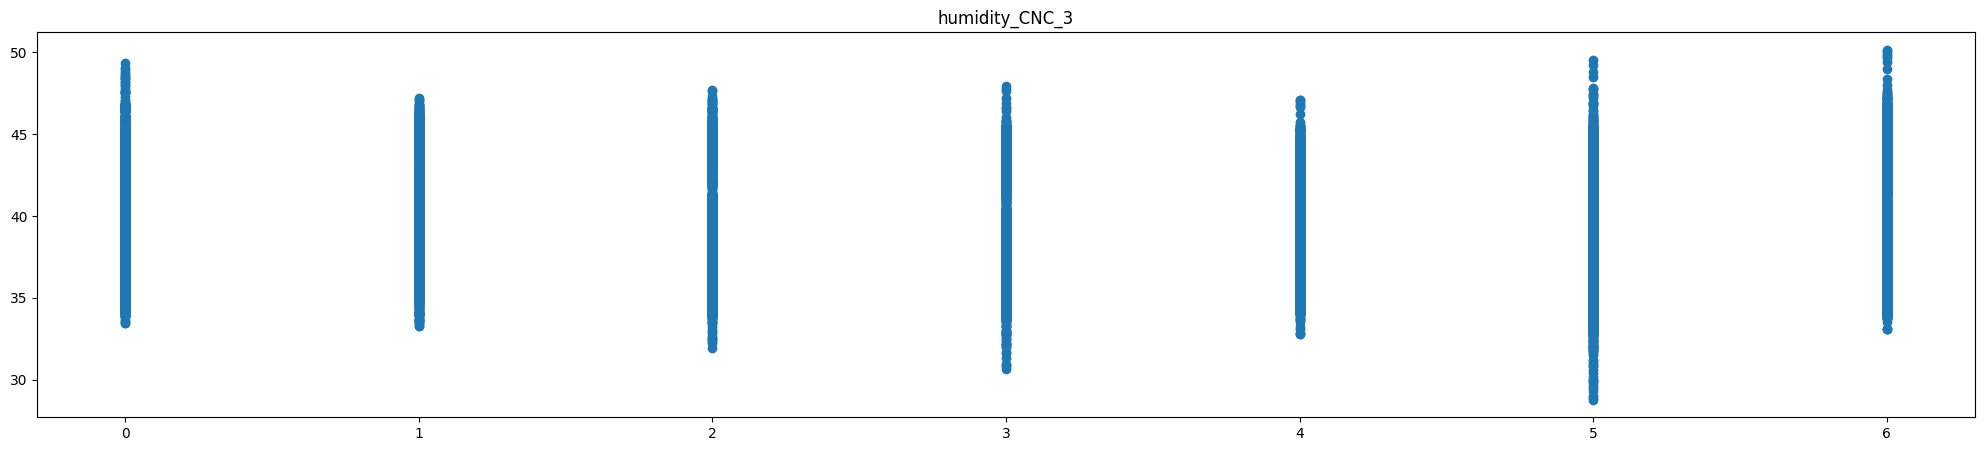

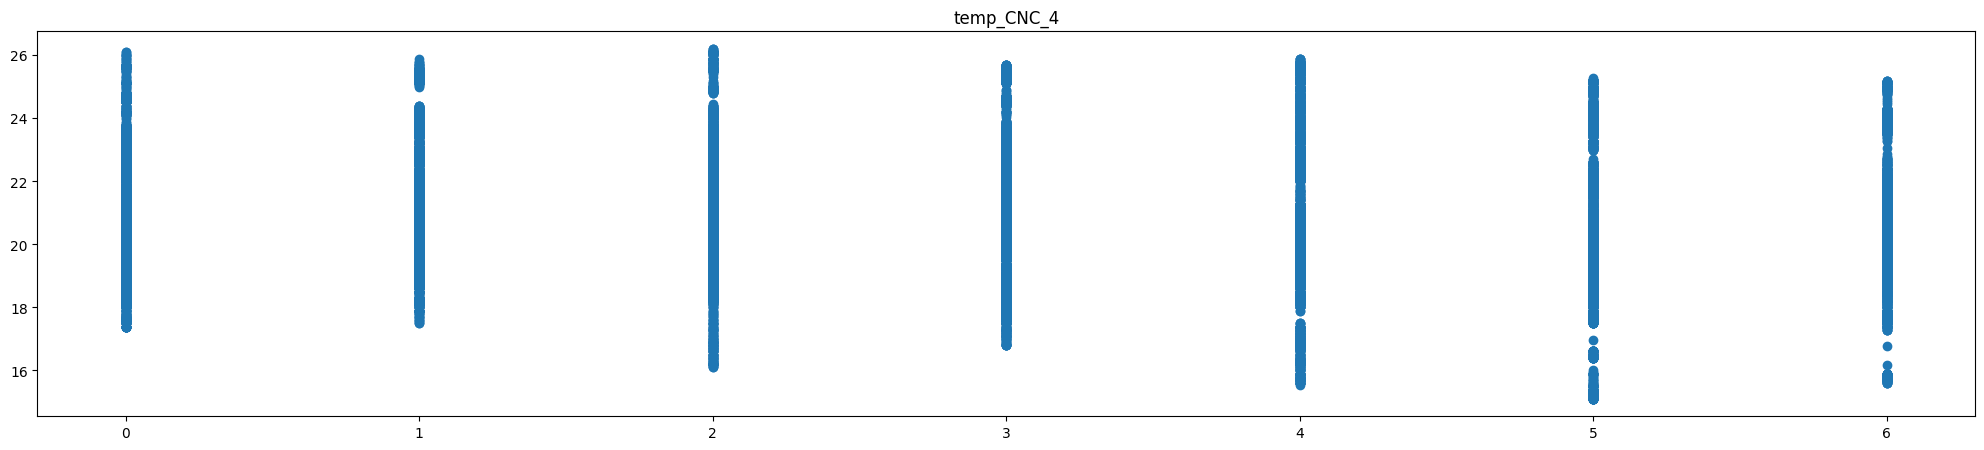

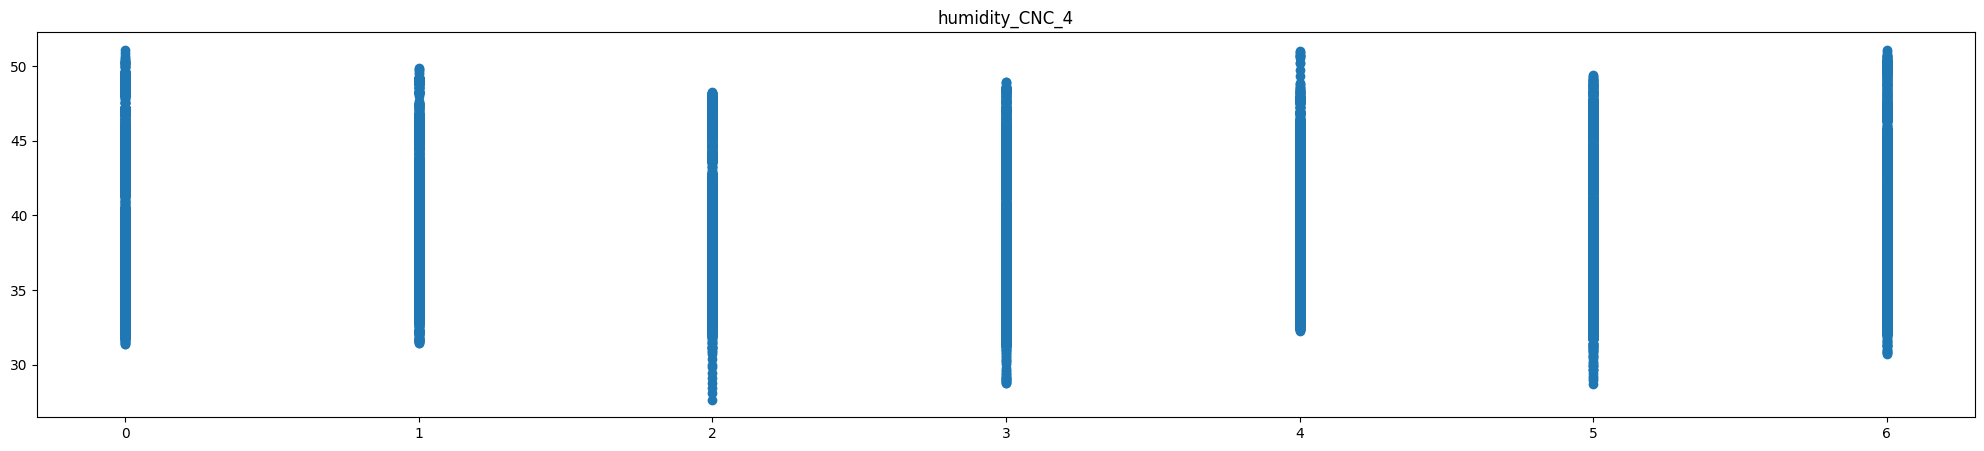

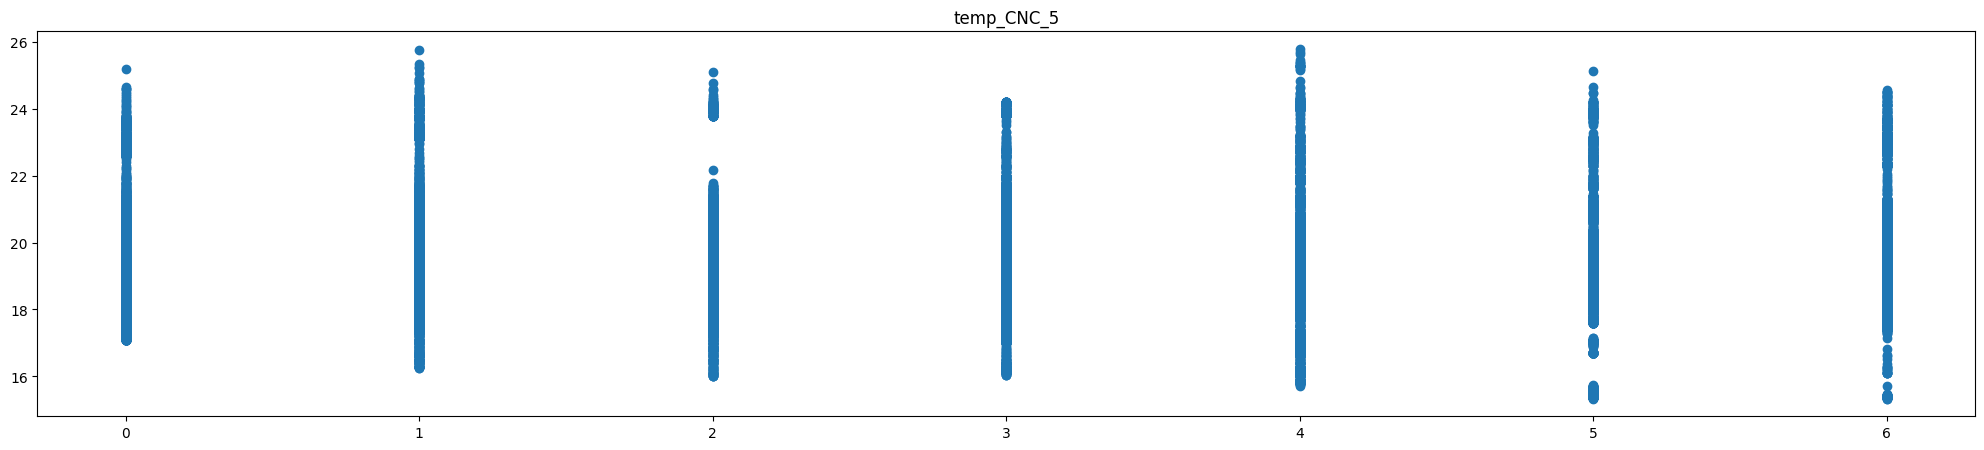

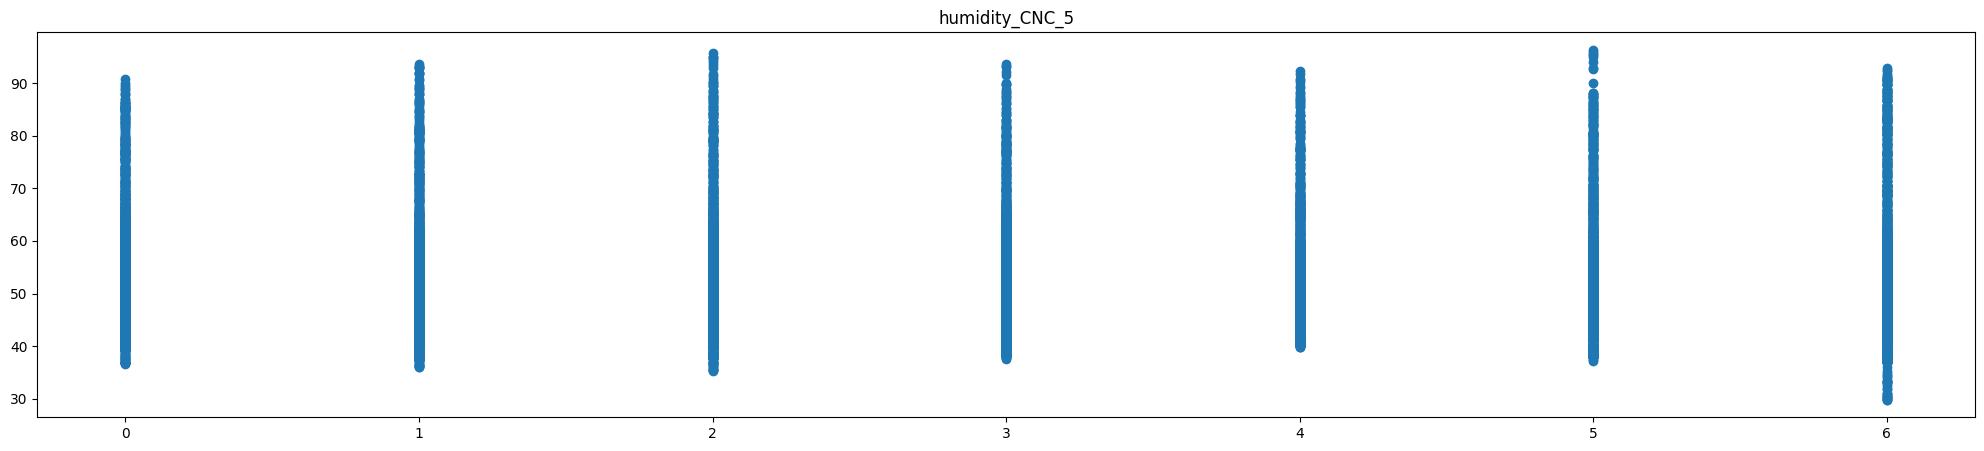

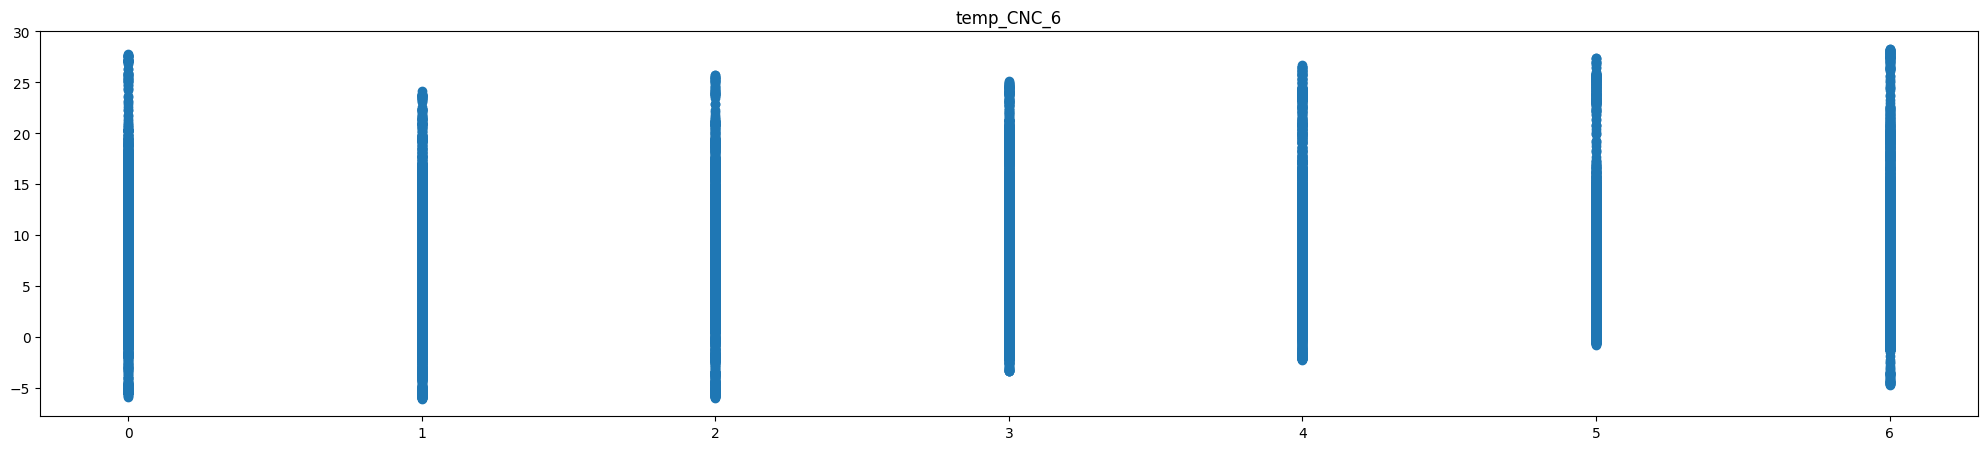

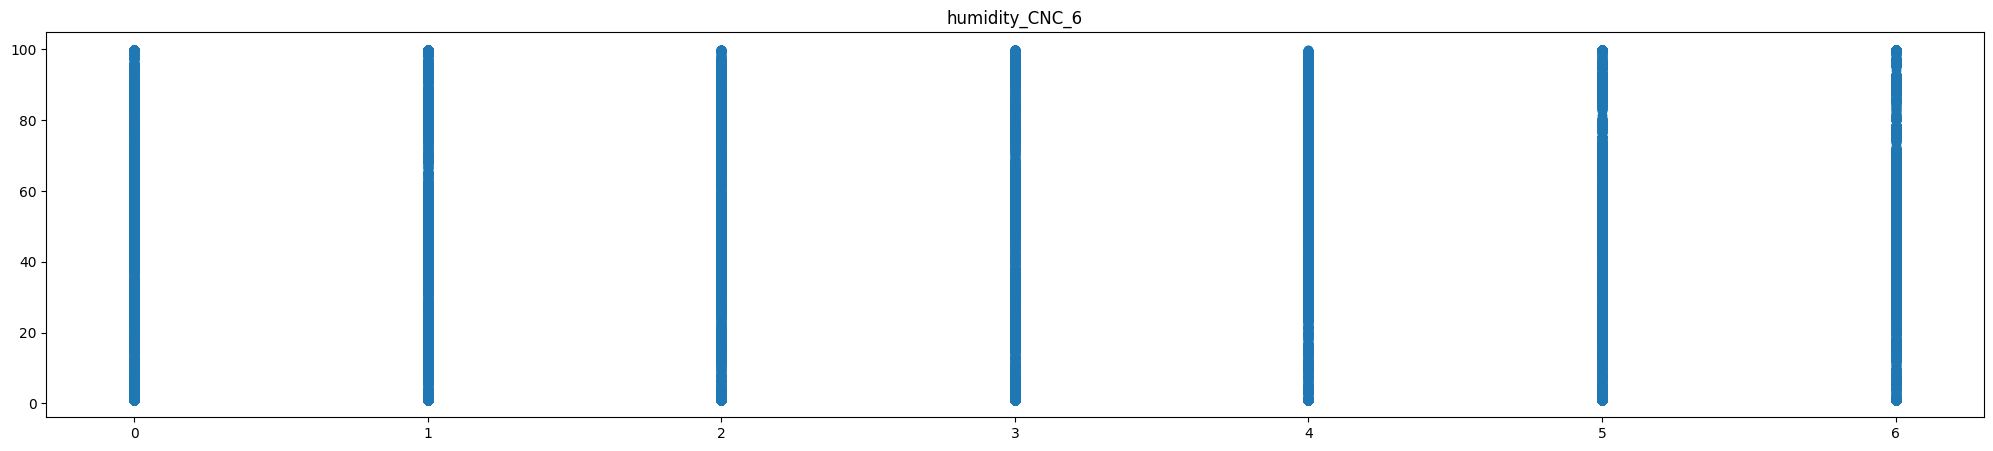

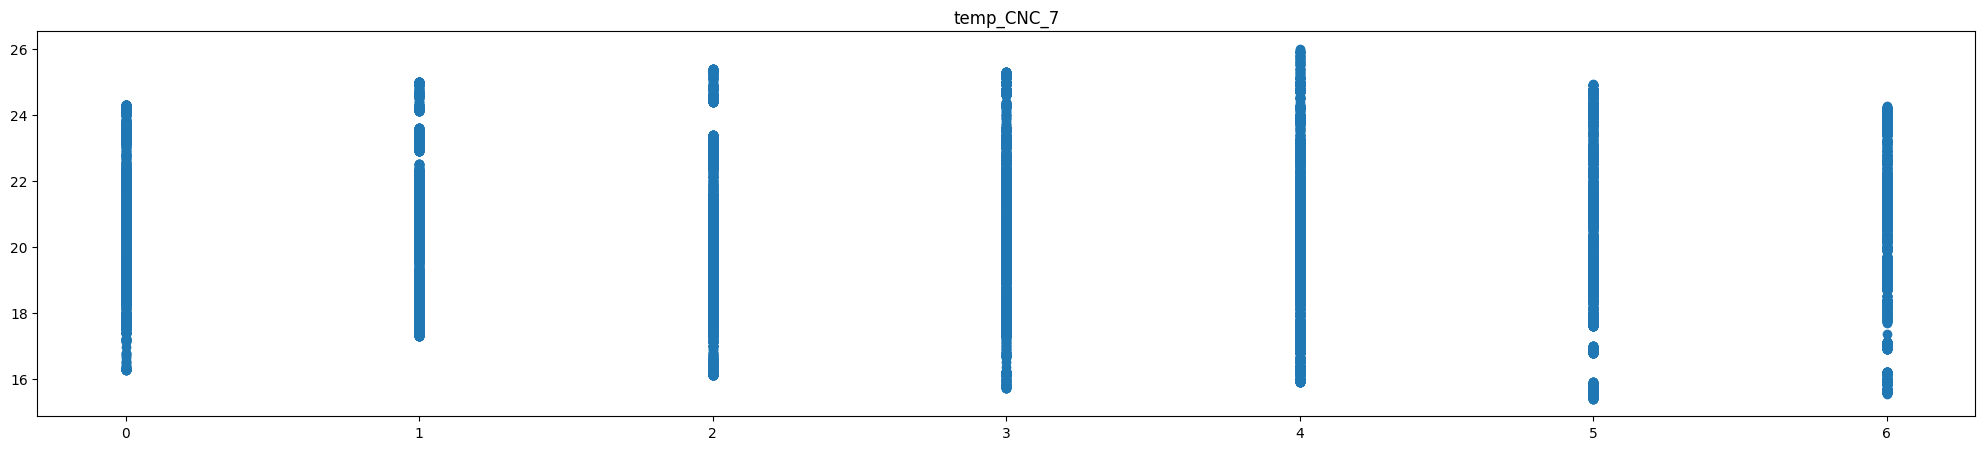

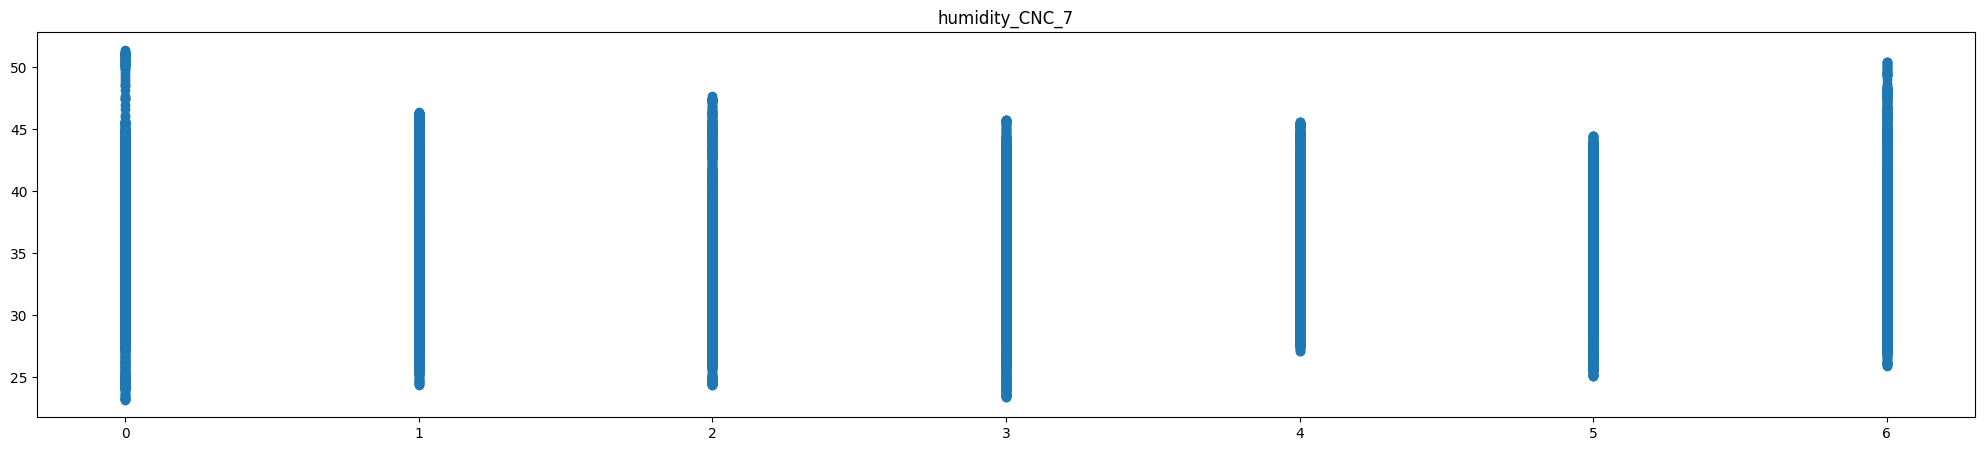

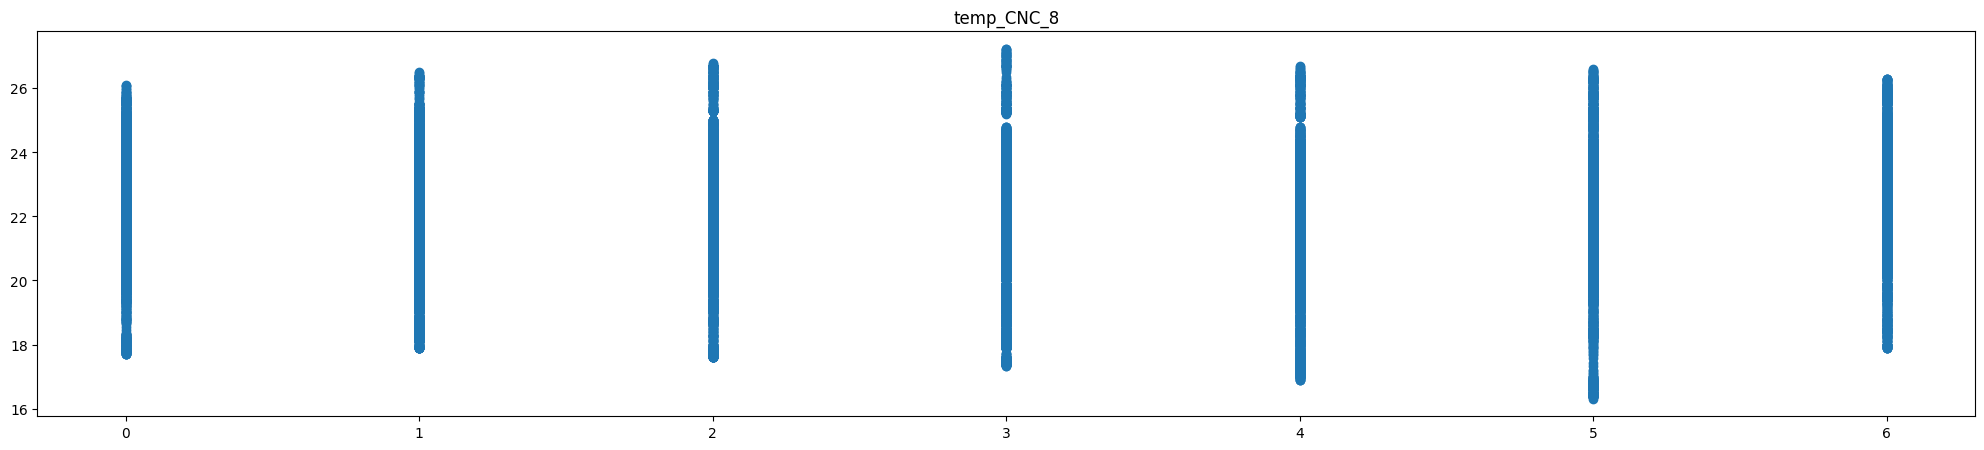

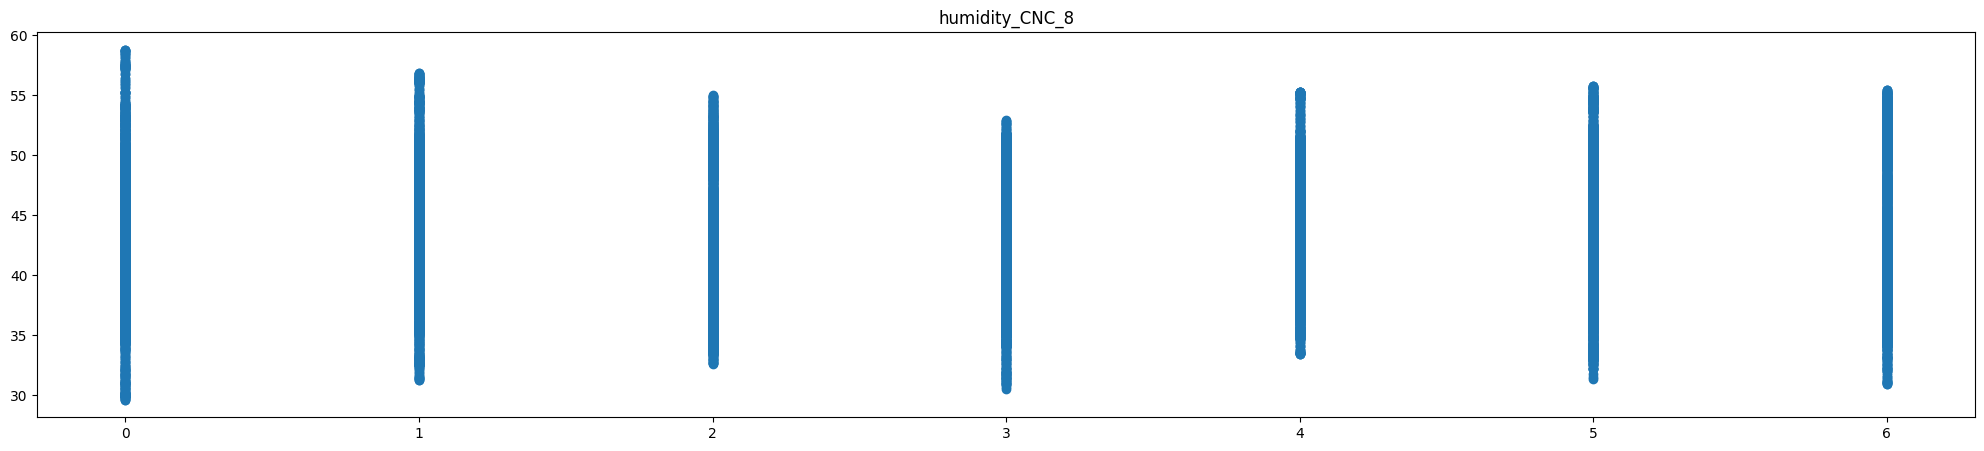

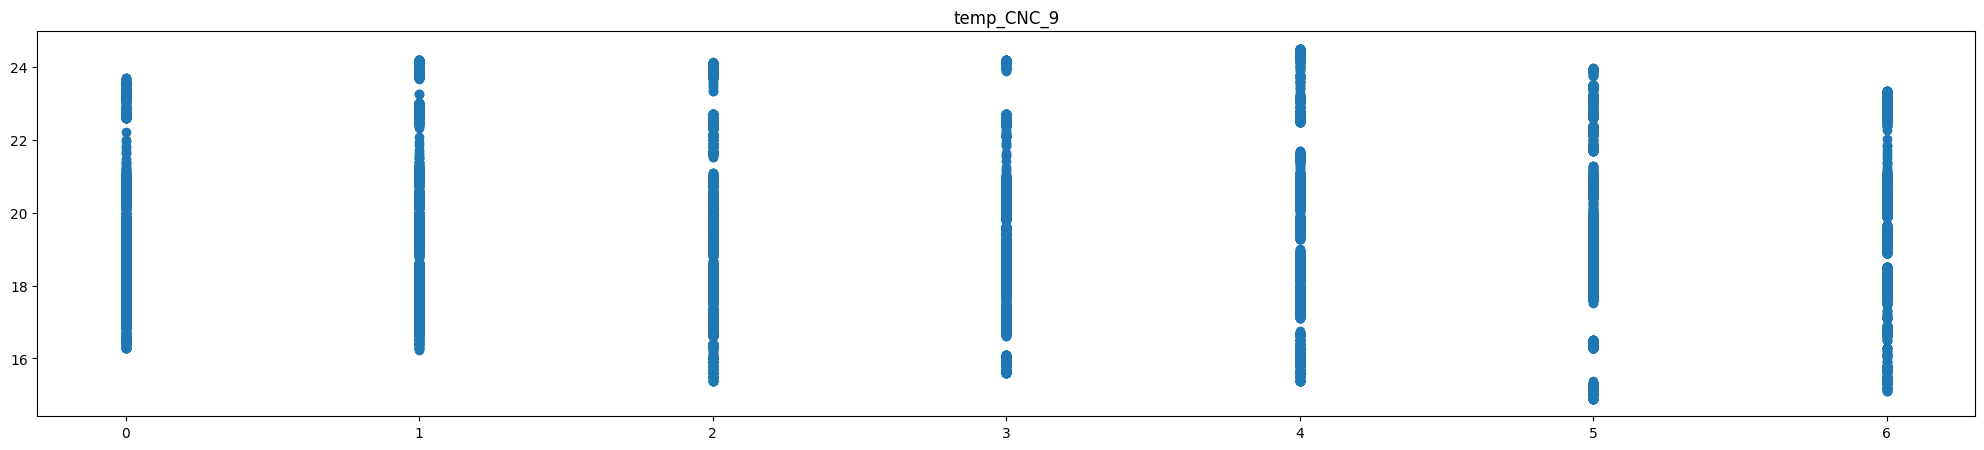

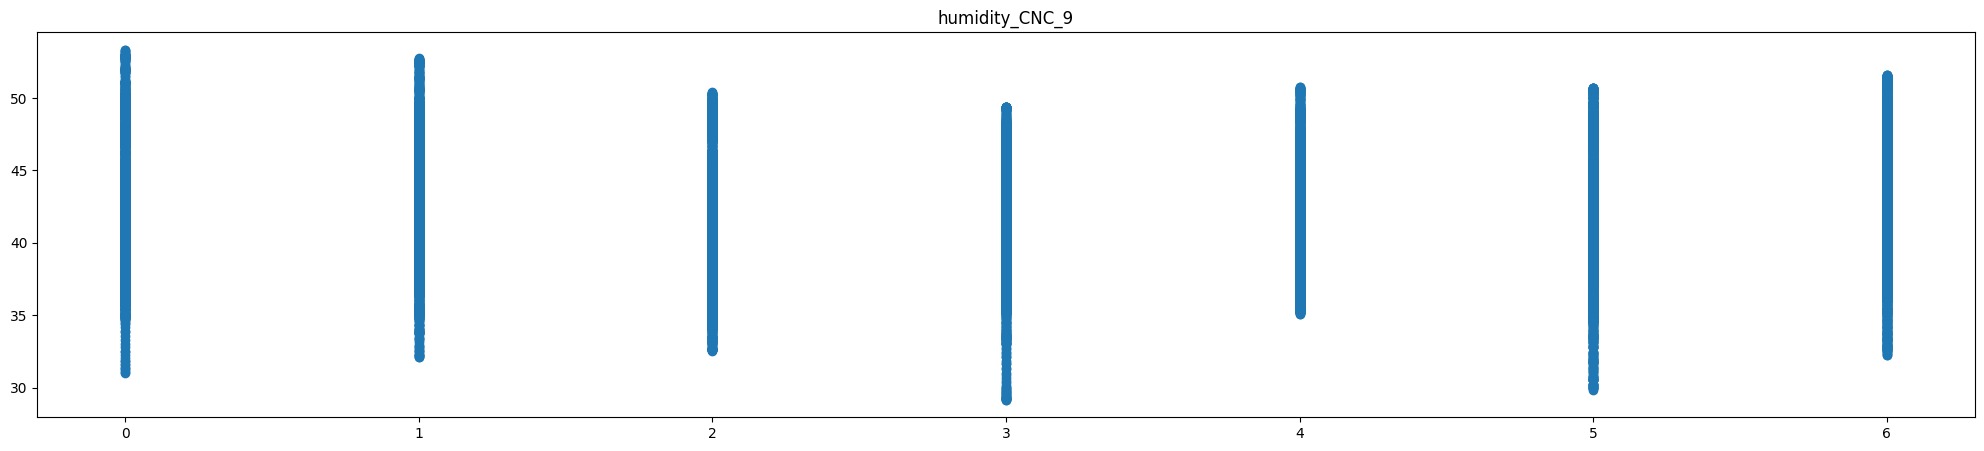

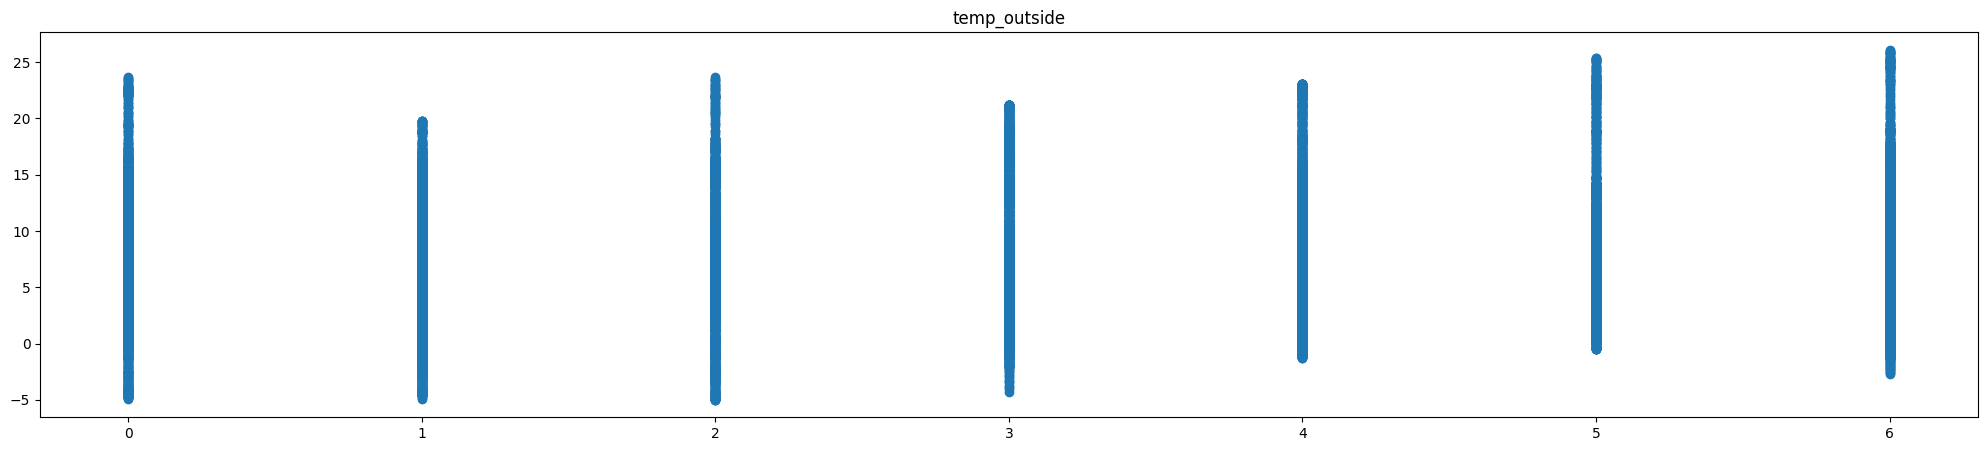

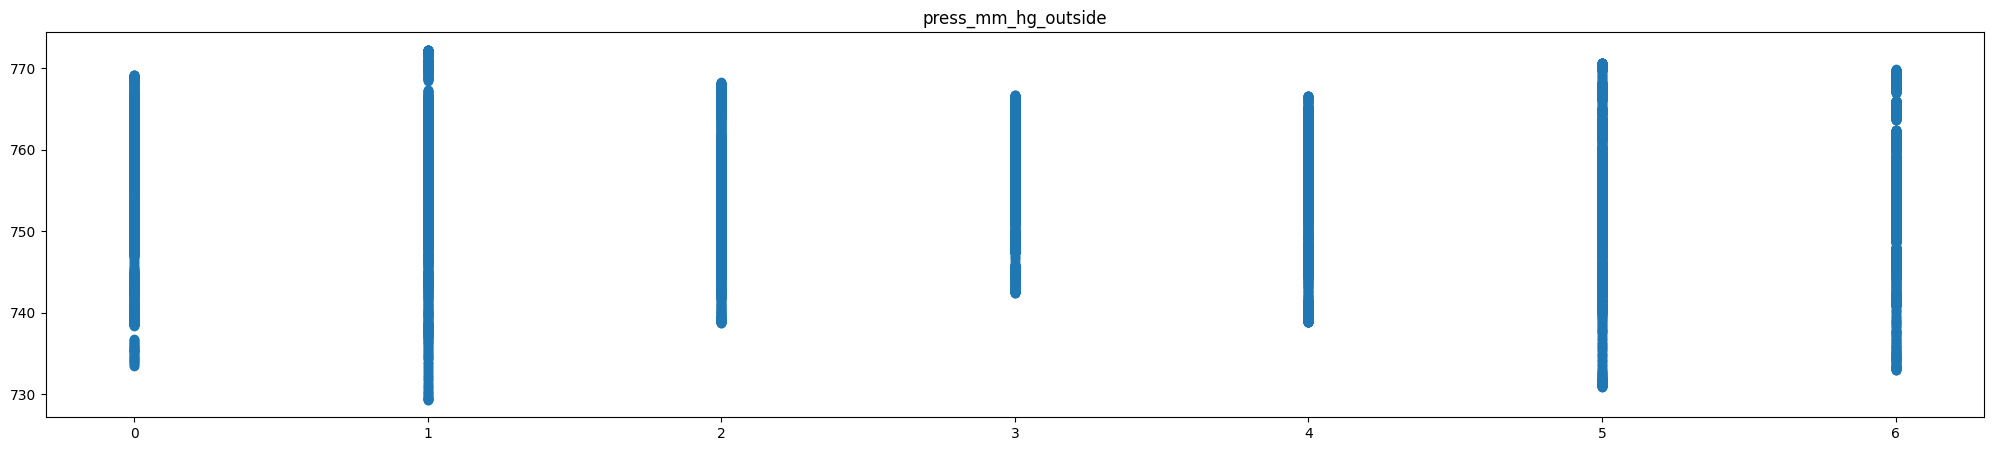

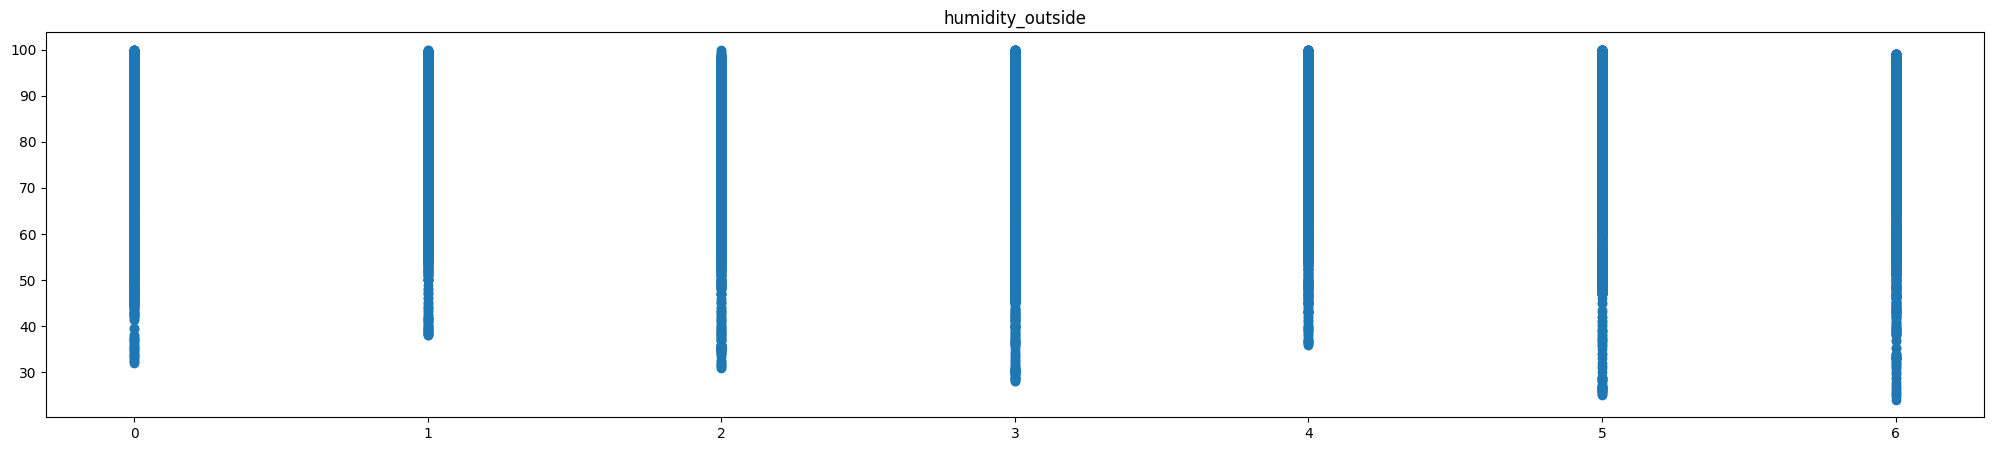

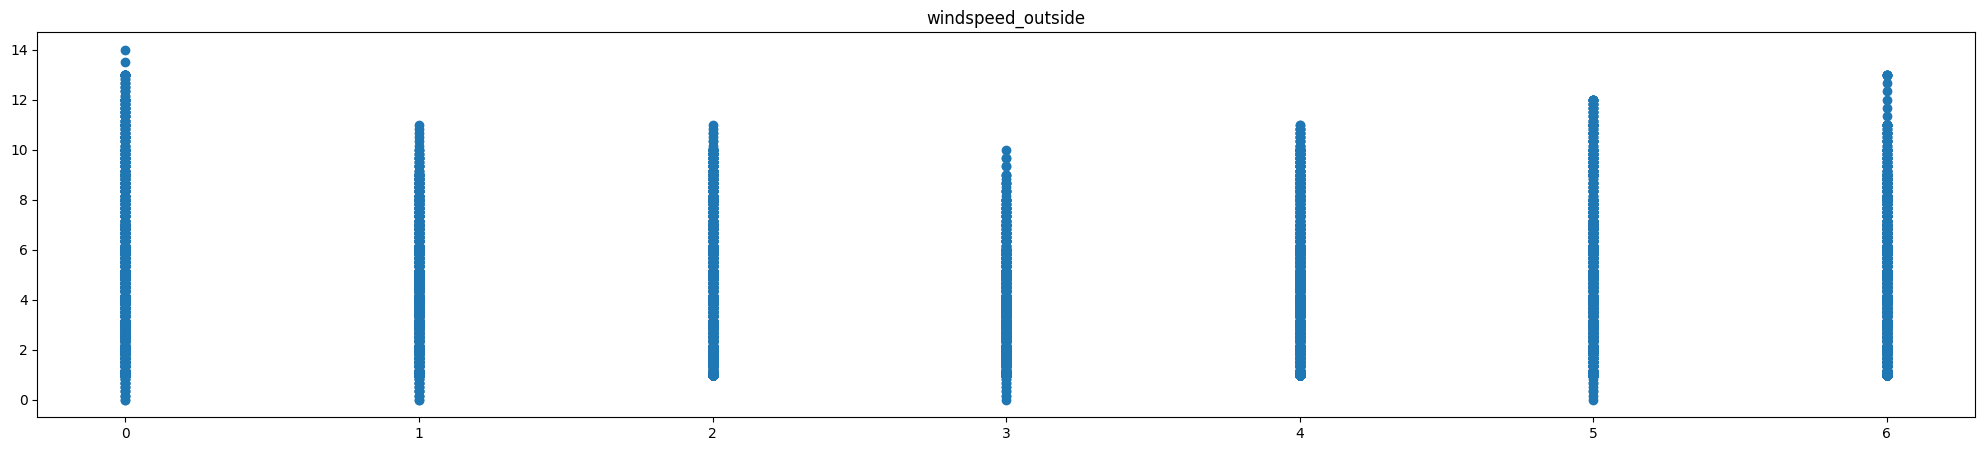

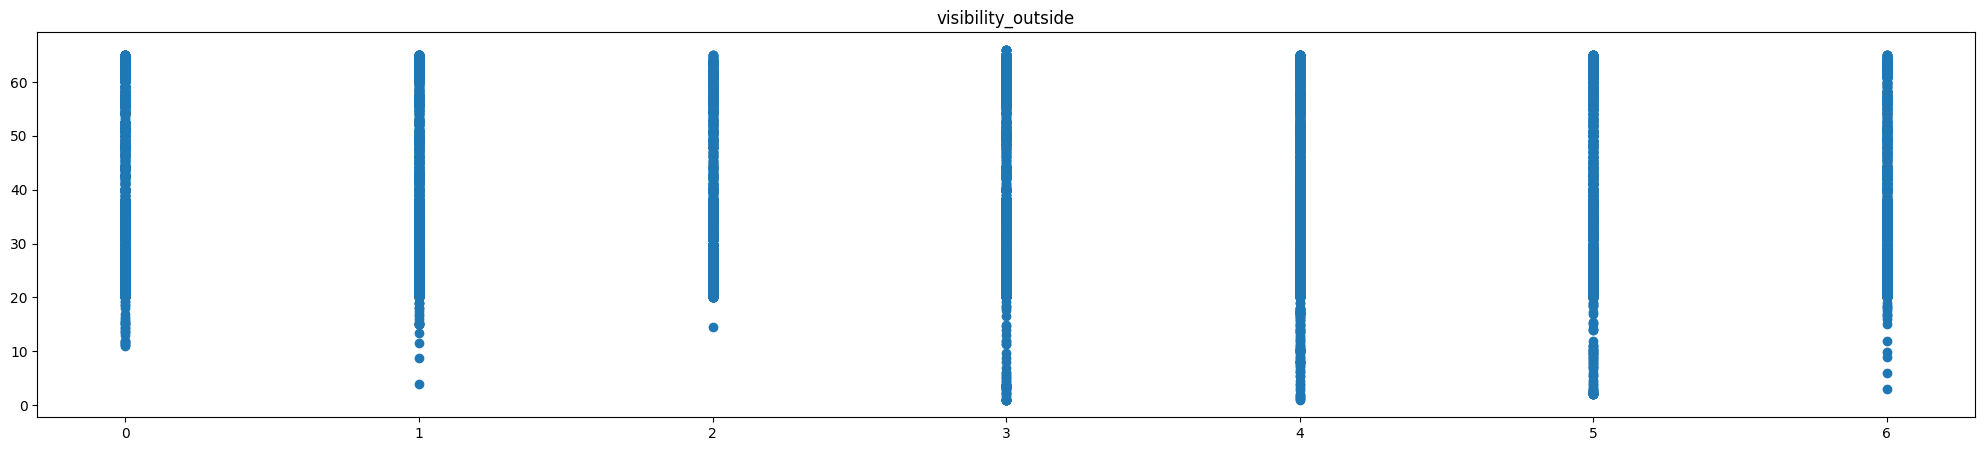

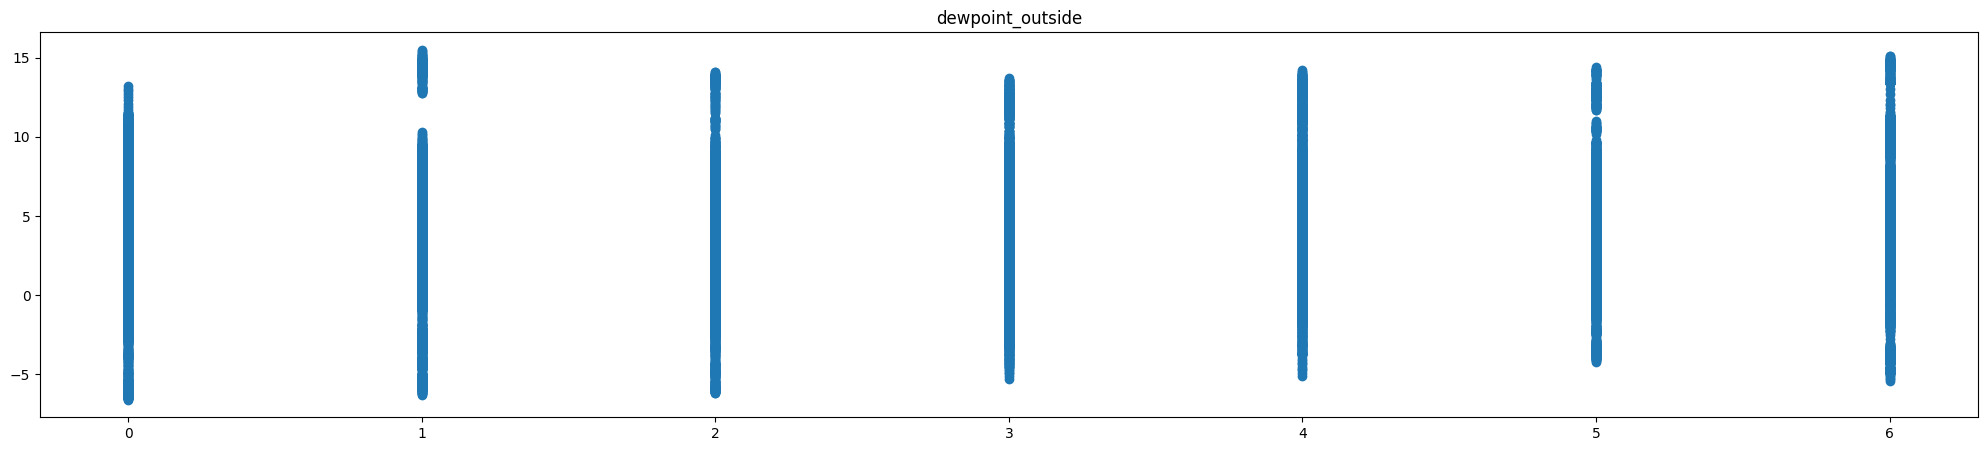

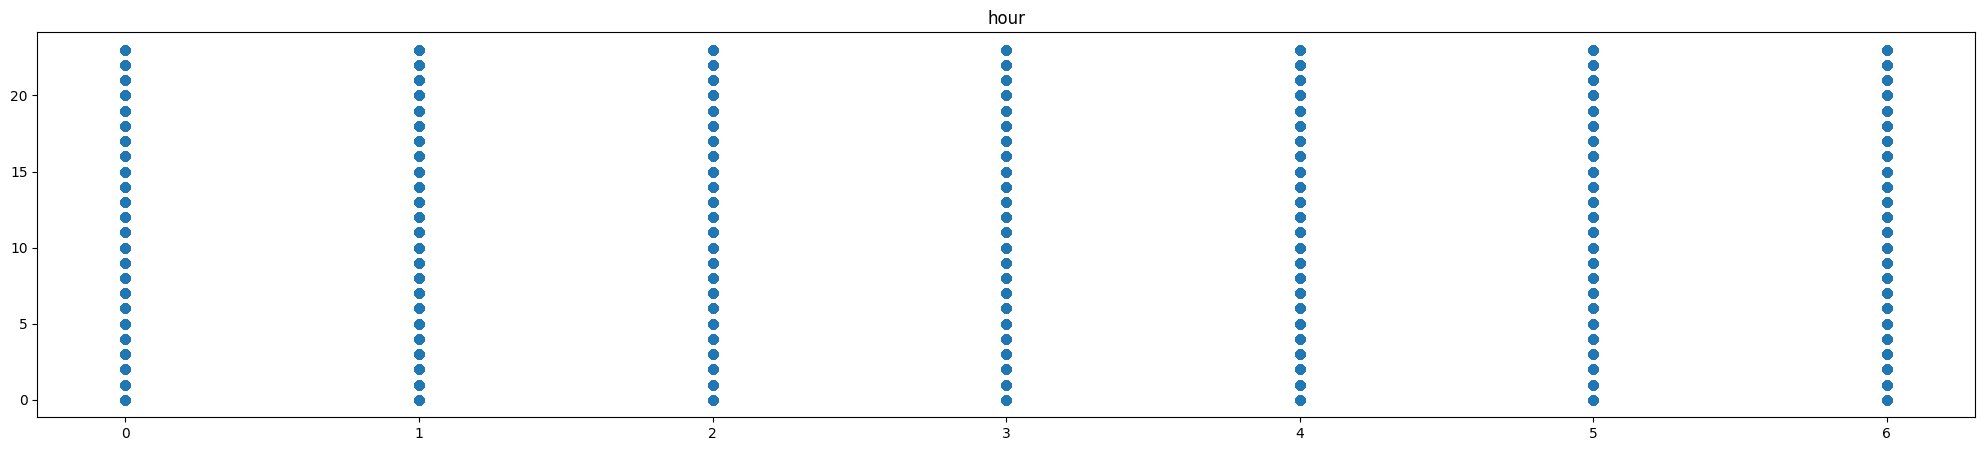

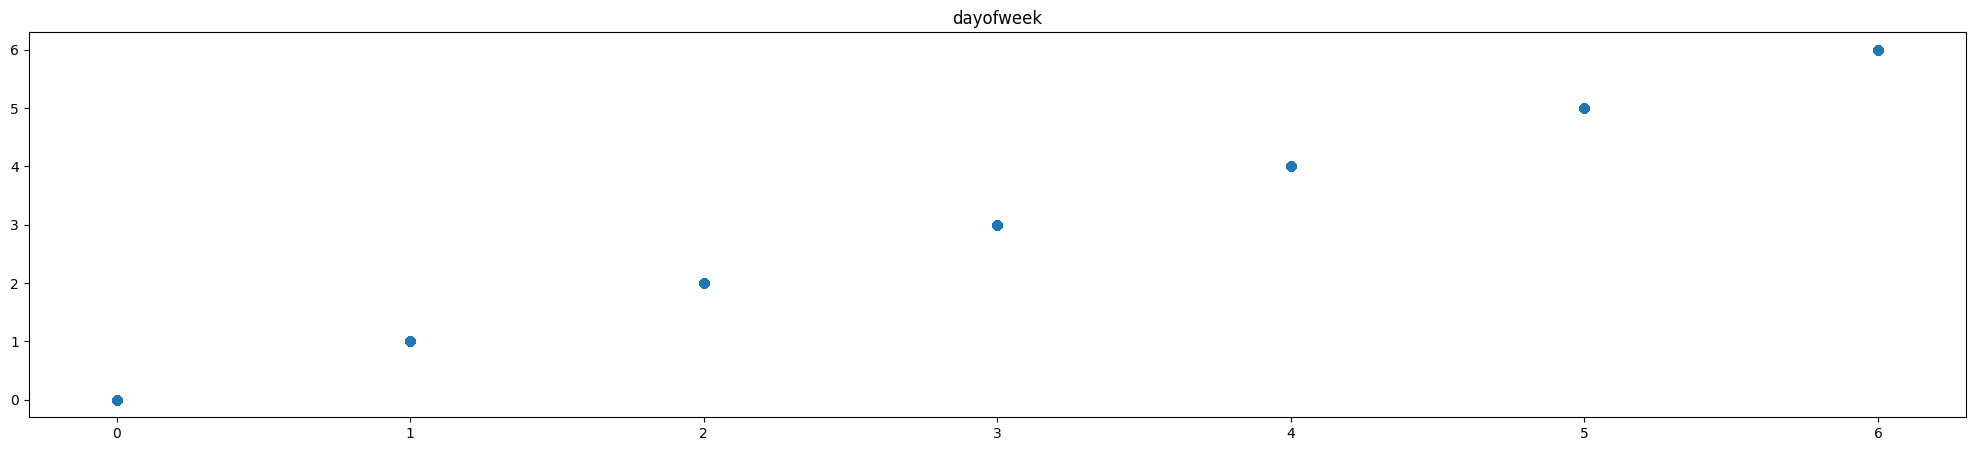

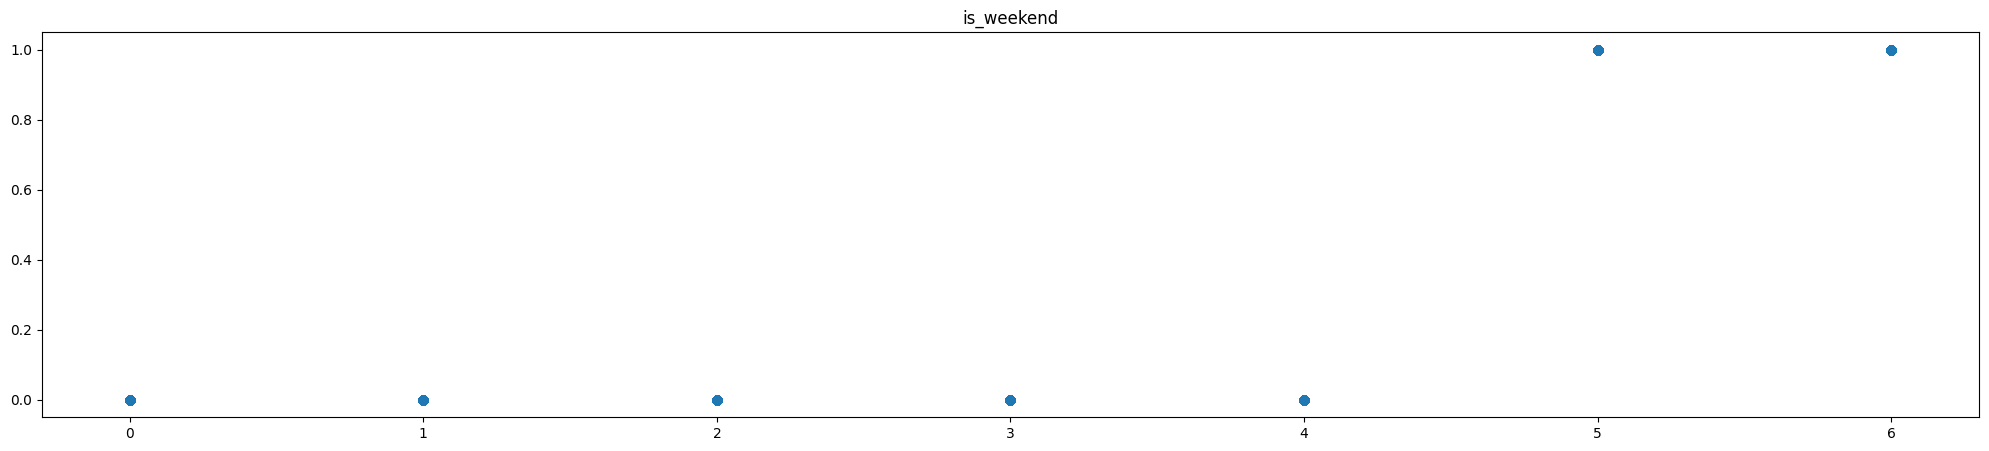

In [12]:
for col in df_sorted.columns[1:]:
    plt.figure(figsize=(25, 5))
    plt.scatter(df_sorted["dayofweek"], df_sorted[col])
    plt.title(col)
    plt.show()

## Ho utilizzato scatter per non appesantire la generazione automatica dei grafici (migliori a barre in questo caso) e dall'analisi non ci sono pattern significativi, se non qualche picco di kw consumati dalle cnc in alcuni giorni della settimana


# Analisi correlazioni


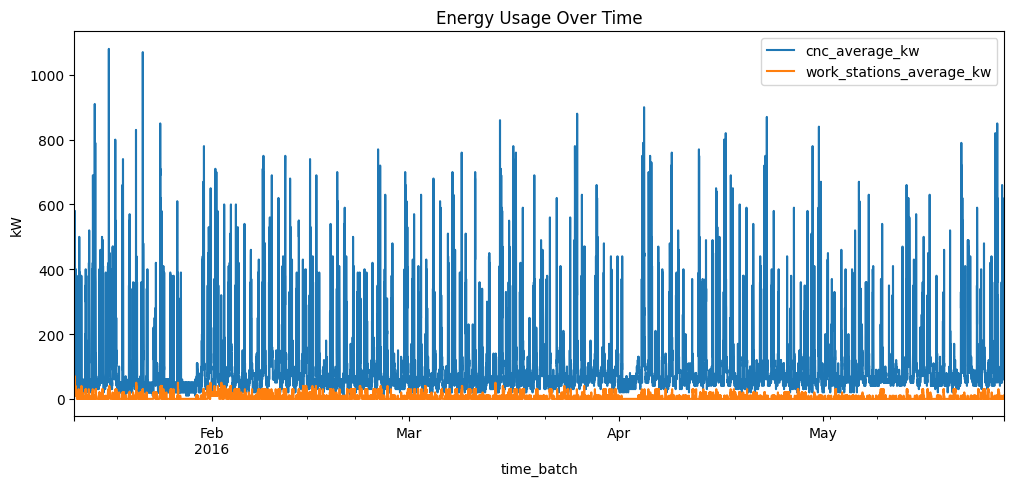

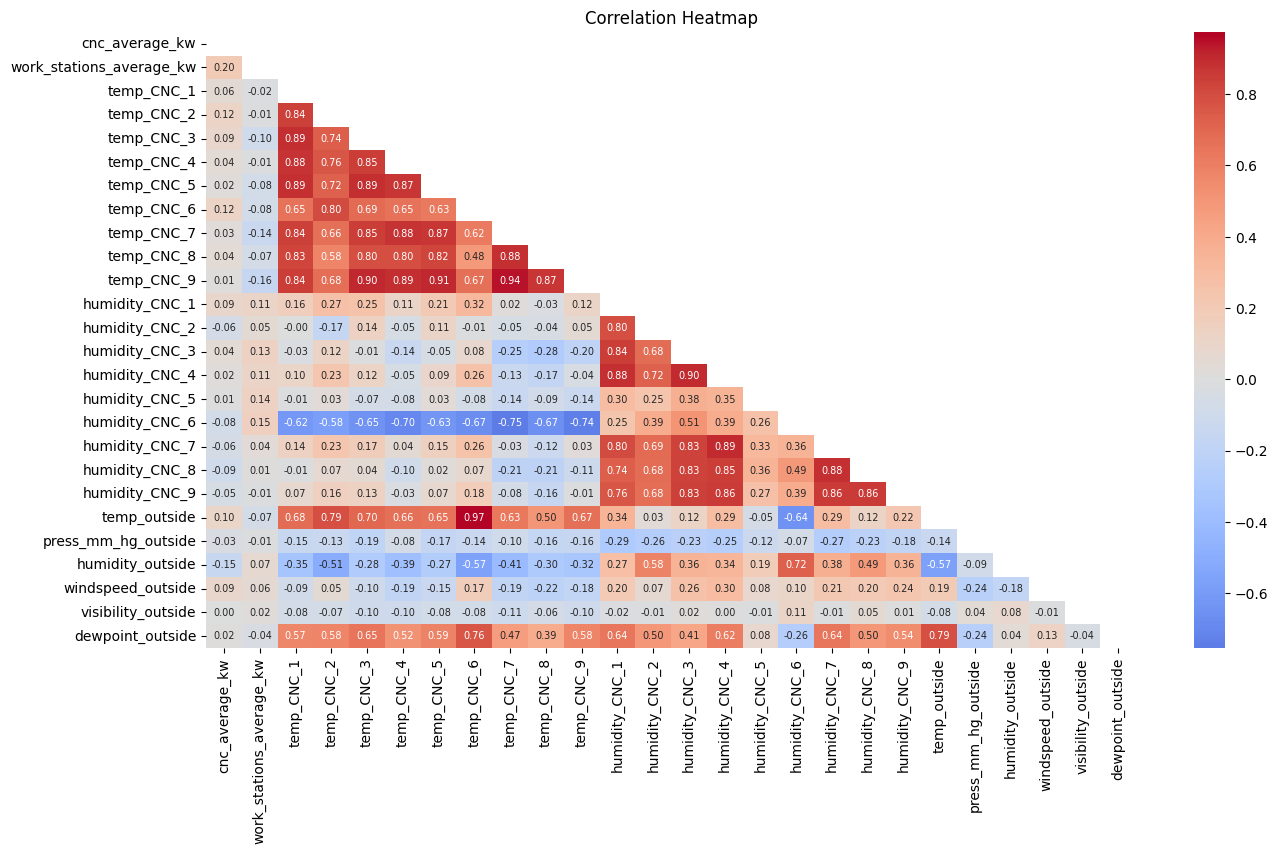

In [13]:
energy_cols = ["cnc_average_kw", "work_stations_average_kw"]
cnc_temp_cols = [col for col in df_sorted.columns if col.startswith("temp_CNC_")]
cnc_hum_cols = [col for col in df_sorted.columns if col.startswith("humidity_CNC_")]
env_cols = [
    "temp_outside",
    "press_mm_hg_outside",
    "humidity_outside",
    "windspeed_outside",
    "visibility_outside",
    "dewpoint_outside",
]

df_sorted[energy_cols].plot(figsize=(12, 5), title="Energy Usage Over Time")
plt.ylabel("kW")
plt.show()

plt.figure(figsize=(15, 8))
corr_matrix = df_sorted[energy_cols + cnc_temp_cols + cnc_hum_cols + env_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7},
)
plt.title("Correlation Heatmap")
plt.show()

### il consumo in kw sembra non avere forti correlazioni con le altre variabili ambientali e i sensori, mentre tra variabili ambientali e sensori vi sono forti correlazioni, che possono portare a possibile multicollinearità (una possibile stepwise analysis che compara il varaiance inflaction factor potrebbe essere utile)


---


In [14]:
df = df_sorted.copy()

- per l'analisi, ho testato vari tipi di modelli (LinearRegressor, RandomForest,RidgeCV,Lasso,XGBoost,GradientBoosting,ARIMA,SARIMAX), riporto di seguito il modello che mi ha dato prestazioni migliori nei diversi step di manipolazione dei dati e feature engineering (LinearRegressor)

- inoltre ho testato varie proporzioni di train-test-split, da 90-10 a 50-50, ho ottenuto i migliori risultati con uno split 70-30


# MODELLO 1


In [ ]:
model_1 = LinearRegression()
X = df.drop(columns=["time_batch", "cnc_average_kw"])
y = df["cnc_average_kw"]

In [ ]:
split_index = int(len(X) * 0.7)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

model_1 = LinearRegression()
model_1.fit(X, y)

y_pred = model_1.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 48.12637743344948
RMSE: 83.81027004168071
R² Score: 0.1624000073060171


Il modello è stato testato sui dati **senza alcuna pre-elaborazione**, come pulizia, normalizzazione o selezione delle feature. Di seguito le principali metriche di valutazione ottenute:

- **MAE (Errore Assoluto Medio)**: `47.63`  
  Il modello presenta un errore medio di circa **47.6 unità**, indicando una deviazione significativa tra i valori previsti e quelli reali.

- **RMSE (Errore Quadratico Medio)**: `83.75`  
  L'RMSE, più sensibile agli outlier rispetto al MAE, suggerisce la presenza di errori consistenti o valori anomali che influenzano negativamente le performance del modello.

- **R² Score (Coefficiente di Determinazione)**: `0.16`  
  Il modello riesce a spiegare solo **circa il 16% della variabilità** del target, evidenziando una **capacità predittiva ancora limitata**.


---


# MODELLO 2


In [210]:
df_clipped = df_sorted.copy()

In [ ]:
df_clipped["cnc_average_kw"] = df_clipped["cnc_average_kw"].clip(
    upper=300
)  # esempio: limiti a 500 kW

In [212]:
df = df_clipped.copy()

In [ ]:
X = df.drop(columns=["time_batch", "cnc_average_kw"])
y = df["cnc_average_kw"]

Ho creato una funzione che filtri X in modo da minimizzare il VIF per un interpretaione ottimale


In [ ]:
def stepwise_vif_linear(X, y, vif_threshold=10):
    results = []
    X_step = X.copy()

    while True:
        # Calcolo VIF
        vif_df = pd.DataFrame()
        vif_df["feature"] = X_step.columns
        vif_df["VIF"] = [
            variance_inflation_factor(X_step.values, i) for i in range(X_step.shape[1])
        ]

        max_vif = vif_df["VIF"].max()
        if max_vif < vif_threshold:
            # print("Tutti i VIF sono sotto la soglia.")
            break

        worst_feature = vif_df.sort_values(by="VIF", ascending=False).iloc[0]["feature"]
        # print(f"Rimuovo feature con VIF più alto: {worst_feature} (VIF={max_vif:.2f})")

        # Split temporale
        split_index = int(len(X_step) * 0.7)
        X_train, X_test = X_step.iloc[:split_index], X_step.iloc[split_index:]
        y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

        # Log trasformazione
        y_train_log = np.log1p(y_train)
        y_test_log = np.log1p(y_test)

        # Scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Linear Regression
        model = LinearRegression()
        model.fit(X_train_scaled, y_train_log)
        y_pred_log = model.predict(X_test_scaled)
        y_pred = np.expm1(y_pred_log)

        # Metriche
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results.append(
            {
                "r2_score": r2,
                "mae": mae,
                "rmse": rmse,
                "features": list(X_step.columns),
                "removed": worst_feature,
                "max_vif": max_vif,
            }
        )

        X_step = X_step.drop(columns=[worst_feature])

    return pd.DataFrame(results)

In [215]:
results = stepwise_vif_linear(X, y)

display(results)

r2_score        mae       rmse  \
0   0.183263  36.358537  57.524497   
1   0.197899  35.471313  57.006757   
2   0.192168  36.116660  57.210056   
3   0.191489  36.007837  57.234092   
4   0.136506  34.740115  59.148184   
5   0.136627  34.826137  59.144038   
6   0.136851  34.387679  59.136364   
7   0.140850  35.237042  58.999225   
8   0.070815  35.715439  61.356827   
9   0.084073  35.870566  60.917515   
10  0.084350  36.162119  60.908293   
11  0.083010  36.173561  60.952858   
12  0.109067  36.431888  60.080581   
13  0.123094  36.586975  59.605768   
14  0.114835  35.246220  59.885796   
15  0.077400  36.410397  61.139005   
16  0.078845  36.759154  61.091120   
17  0.049862  37.347501  62.044737   
18  0.077453  36.195978  61.137274   
19  0.077310  36.194896  61.141992   

                                             features              removed  \
0   [work_stations_average_kw, temp_CNC_1, humidit...           temp_CNC_1   
1   [work_stations_average_kw, humidity_CNC_1, tem...           temp_CNC_9   
2   [work_stations_average_kw, humidity_CNC_1, tem...  press_mm_hg_outside   
3   [work_stations_average_kw, humidity_CNC_1, tem...       humidity_CNC_2   
4   [work_stations_average_kw, humidity_CNC_1, tem...       humidity_CNC_3   
5   [work_stations_average_kw, humidity_CNC_1, tem...       humidity_CNC_4   
6   [work_stations_average_kw, humidity_CNC_1, tem...           temp_CNC_7   
7   [work_stations_average_kw, humidity_CNC_1, tem...           temp_CNC_3   
8   [work_stations_average_kw, humidity_CNC_1, tem...           temp_CNC_5   
9   [work_stations_average_kw, humidity_CNC_1, tem...           temp_CNC_4   
10  [work_stations_average_kw, humidity_CNC_1, tem...       humidity_CNC_9   
11  [work_stations_average_kw, humidity_CNC_1, tem...       humidity_CNC_8   
12  [work_stations_average_kw, humidity_CNC_1, tem...     humidity_outside   
13  [work_stations_average_kw, humidity_CNC_1, tem...           temp_CNC_2   
14  [work_stations_average_kw, humidity_CNC_1, hum...       humidity_CNC_1   
15  [work_stations_average_kw, humidity_CNC_5, tem...       humidity_CNC_7   
16  [work_stations_average_kw, humidity_CNC_5, tem...         temp_outside   
17  [work_stations_average_kw, humidity_CNC_5, tem...           temp_CNC_8   
18  [work_stations_average_kw, humidity_CNC_5, tem...       humidity_CNC_5   
19  [work_stations_average_kw, temp_CNC_6, humidit...           temp_CNC_6   

        max_vif  
0   3675.863949  
1   2567.866726  
2   2146.020317  
3   1690.154791  
4   1521.558674  
5   1194.472635  
6   1156.544791  
7    951.985299  
8    810.773719  
9    647.639014  
10   540.475303  
11   468.021818  
12   376.698898  
13   352.630559  
14   304.601613  
15   151.297628  
16    72.153112  
17    42.431989  
18    21.113690  
19    12.508694

Inoltre ho eseguito una trasformazione logaritmica per ridurre l'impatto di outliers e utilizzato uno standarScaler per standardizzare i dati


In [ ]:
stepwise_linear_results = stepwise_vif_linear(X, y)

optimal_step = 1
optimal_features = stepwise_linear_results.iloc[optimal_step]["features"]


X_optimal = df[optimal_features]
y = df["cnc_average_kw"]


split_index = int(len(X_optimal) * 0.7)
X_train, X_test = X_optimal.iloc[:split_index], X_optimal.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_log)


y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)


print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 34.38767929232255
RMSE: 59.1363642531969
R² Score: 0.1368509208749208


- **MAE (Mean Absolute Error)**: `34.39`  
  L'errore medio assoluto è diminuito rispetto al modello non clippato (inizialmente ~47.6), segnalando un miglioramento nella precisione media delle previsioni.

- **RMSE (Root Mean Squared Error)**: `59.14`  
  Ancora elevato, ma inferiore rispetto al modello iniziale (~83.8), suggerendo una minore sensibilità agli outlier residui.

- **R² Score (Coefficient of Determination)**: `0.14`  
  Il modello spiega circa il **14% della variabilità** della variabile target. Questo valore è piuttosto basso, indicando che **la capacità predittiva del modello rimane limitata**, nonostante il clipping.


---


# MODELLO 3


altri modelli sono stati testati, andando a creare medie mobili, lag, shifting e rolling da 1 a 4 ore (6 righe = 1 ora), ma non hanno dato miglioramenti a discapito dell'aumento della complessità


versioni sono disponibili nel notebook "modelli_complessi"


questo ultima analisi va a recuperare df_sorted e prova a trasformare la distribuzione, con QuantileTransformer , PowerTransformer (box-cox), testati su:

- Linear Regressor
- Random Forest
- XGBoost
- Ridge
- Lasso

è stato inoltre filtrato inizialmente il df per cnc_average_kw in modo da tentare di ridurre il rumore che gli outliers possono causare all'accuratezza dei modelli

df = df[df["cnc_average_kw"] < 400]

inoltre sono state create due nuove colonne

df["mean_temp_CNC"] = df[temp_cols].mean(axis=1) <br>
df["mean_humidity_CNC"] = df[humidity_cols].mean(axis=1) <br>

per tentare di recuperare informazioni utili dalle varie colonne Temp e Humidity


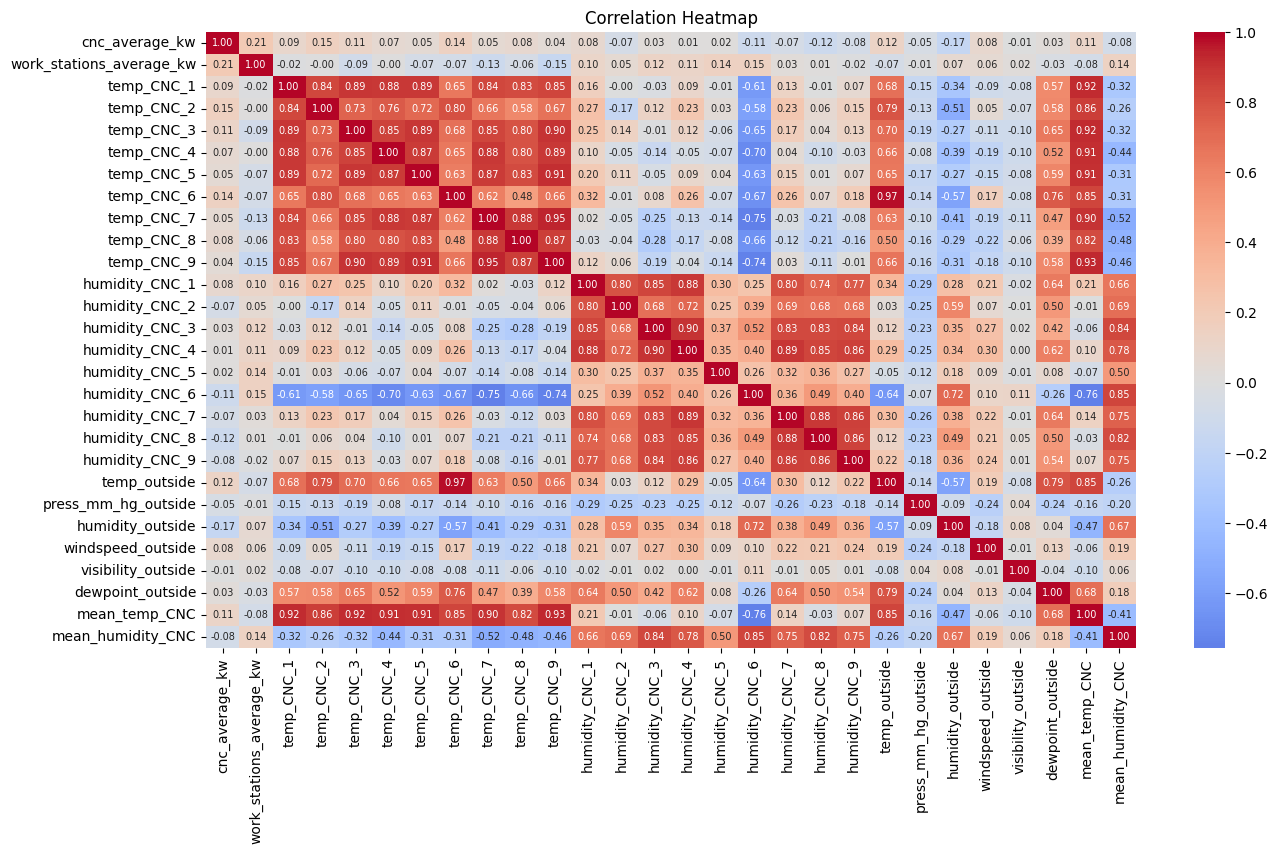

In [344]:
df = df_sorted.copy()


temp_cols = [col for col in df.columns if "temp_CNC" in col]
humidity_cols = [col for col in df.columns if "humidity_CNC" in col]

# creazione nuove colonne
df["mean_temp_CNC"] = df[temp_cols].mean(axis=1)
df["mean_humidity_CNC"] = df[humidity_cols].mean(axis=1)

# filtro < 400
df = df[df["cnc_average_kw"] < 400]


# nuovo check correlazioni con nuove colonne e filtro
plt.figure(figsize=(15, 8))
corr_matrix = df[
    energy_cols
    + cnc_temp_cols
    + cnc_hum_cols
    + env_cols
    + ["mean_temp_CNC", "mean_humidity_CNC"]
].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    # mask=mask,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7},
)
plt.title("Correlation Heatmap")
plt.show()

In [345]:
# tabella corr
# df.corr()

La seguente cella è stata commentata perché in sede di analisi QuantileTrasformer ha performato di meno rispetto a Box-Cox, che è stata scelta come trasformazione del database (data la grande skewness dei dati, specialmente della variabile target)


In [346]:
# from sklearn.preprocessing import QuantileTransformer

# # Copia del dataframe originale
# df_transformed = df.copy()

# # Seleziona solo le colonne numeriche
# numeric_cols = df.select_dtypes(include="number").columns

# # Applica QuantileTransformer a tutte le colonne numeriche
# qt = QuantileTransformer(output_distribution="normal", random_state=42)
# df_transformed[numeric_cols] = qt.fit_transform(df[numeric_cols])

In [347]:
# from sklearn.preprocessing import PowerTransformer

# # Copia del dataframe originale
# df_transformed = df.copy()

# # Seleziona solo le colonne numeriche
# numeric_cols = df.select_dtypes(include="number").columns

# # Applica PowerTransformer a tutte le colonne numeriche
# pt = PowerTransformer(method="yeo-johnson", standardize=True)
# df_transformed[numeric_cols] = pt.fit_transform(df[numeric_cols])

sono state tentate X con meno feature di quelle disponibili, dando scarsi miglioramenti


In [ ]:
from sklearn.preprocessing import PowerTransformer

# Seleziono solo le colonne numeriche
numeric_cols = df.select_dtypes(include="number").columns

# Applico PowerTransformer a tutte le colonne numeriche
pt = PowerTransformer(method="yeo-johnson", standardize=True)
df[numeric_cols] = pt.fit_transform(df[numeric_cols])

X = df.drop(columns=["time_batch", "cnc_average_kw"])
y = df["cnc_average_kw"]


split_index = int(len(X) * 0.7)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


# y_train = np.log1p(y_train)
# y_test = np.log1p(y_test)

model_1 = LinearRegression()
model_1.fit(X, y)


y_pred = model_1.predict(X_test)


print("LinearRegressor")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

LinearRegressor
MAE: 0.5268472067570187
RMSE: 0.7067050369093744
R² Score: 0.25894579879560686


In [ ]:
from sklearn.ensemble import RandomForestRegressor


model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)

print("RandomForest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))

RandomForest
MAE: 0.6262757210997087
RMSE: 0.7981664704715431
R² Score: 0.054719802168740284


In [ ]:
from xgboost import XGBRegressor


model_xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.00001,
    max_depth=10,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
)
model_xgb.fit(X_train, y_train)


y_pred_xgb = model_xgb.predict(X_test)


print("XGBoost")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost
MAE: 0.6247135197283341
RMSE: 0.8342791186845022
R² Score: -0.03275272067329538


In [ ]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)


print("Ridge Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R² Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression
MAE: 0.5725028224193818
RMSE: 0.751534251914787
R² Score: 0.1619476313034498


In [ ]:
from sklearn.linear_model import Lasso



lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)


print("Lasso Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R² Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression
MAE: 0.5659168505845436
RMSE: 0.747135261766995
R² Score: 0.17172973951031745


In [353]:
print("risultati con filtro < 400 e df trasformato con PowerTransformer")

print("LinearRegressor")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


print("RandomForest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


print("XGBoost")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))


print("Ridge Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R² Score:", r2_score(y_test, y_pred_ridge))


print("Lasso Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R² Score:", r2_score(y_test, y_pred_lasso))

risultati con filtro < 400 e df trasformato con PowerTransformer
LinearRegressor
MAE: 0.5268472067570187
RMSE: 0.7067050369093744
R² Score: 0.25894579879560686
RandomForest
MAE: 0.6262757210997087
RMSE: 0.7981664704715431
R² Score: 0.054719802168740284
XGBoost
MAE: 0.6247135197283341
RMSE: 0.8342791186845022
R² Score: -0.03275272067329538
Ridge Regression
MAE: 0.5725028224193818
RMSE: 0.751534251914787
R² Score: 0.1619476313034498
Lasso Regression
MAE: 0.5659168505845436
RMSE: 0.747135261766995
R² Score: 0.17172973951031745


ho provato ad ottimizzare i risultati con PCA ma non ci sono stati miglioramenti, lascio di seguito i risultati:

LinearRegression

- MAE: 0.5719287057233412
- RMSE: 0.7618596630336172
- R² Score: 0.1387612519854471

---

- Ridge Regression
- MAE: 0.5719273510329306
- RMSE: 0.76185707393717
- R² Score: 0.13876710562622097

---

- Lasso Regression
- MAE: 0.6267963881230135
- RMSE: 0.8369021732632171
- R² Score: -0.0392570795123619

---

- Random Forest
- MAE: 0.5847773071661135
- RMSE: 0.7913971235229545
- R² Score: 0.07068588144702226

---

- XGBoost
- MAE: 0.6739240180562066
- RMSE: 0.8779629628434976
- R² Score: -0.14373652713149765

---


Dato che il modello migliore è stato LinearRegressor, ma non vi è la possibilità di eseguire maggiore tuning degli iperparametri
provo ad utilizzare gridsearch con il modello con prestazioni migliori tra ridge e lasso


In [ ]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Definizione griglia di valori alpha
# param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# # Inizializzazione del modello
# lasso = Lasso(max_iter=10000)  # max_iter alto per evitare warning

# # GridSearch con validazione incrociata
# grid_lasso = GridSearchCV(lasso, param_grid, scoring="r2", cv=5)
# grid_lasso.fit(X_train, y_train)

# # Risultati
# print(" Miglior alpha trovato:", grid_lasso.best_params_)
# print(" R² Score (media CV):", grid_lasso.best_score_)

# # Valutazione sul test set
# y_pred = grid_lasso.predict(X_test)
# print("\n Valutazione finale sul test set:")
# print("MAE:", mean_absolute_error(y_test, y_pred))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# print("R² Score:", r2_score(y_test, y_pred))

🔍 Miglior alpha trovato: {'alpha': 0.001}
📈 R² Score (media CV): 0.20764856022656913

🎯 Valutazione finale sul test set:
MAE: 0.5736361212852201
RMSE: 0.7521921532350142
R² Score: 0.1604797086111256


# Pipeline finale


In [ ]:
df = pd.read_parquet("df_sorted.parquet")
df["time_batch"] = pd.to_datetime(df["time_batch"])
df = df.sort_values("time_batch")
df = df.set_index("time_batch", drop=True)
df = df.drop(columns="time_batch.1")
temp_cols = [col for col in df.columns if "temp_CNC" in col]
humidity_cols = [col for col in df.columns if "humidity_CNC" in col]

# creazione nuove colonne
df["mean_temp_CNC"] = df[temp_cols].mean(axis=1)
df["mean_humidity_CNC"] = df[humidity_cols].mean(axis=1)

# filtro < 400
df = df[df["cnc_average_kw"] < 400]

# from sklearn.preprocessing import PowerTransformer
# from sklearn.linear_model import LinearRegression

# Seleziono solo le colonne numeriche
numeric_cols = df.select_dtypes(include="number").columns

# Applico PowerTransformer a tutte le colonne numeriche
pt = PowerTransformer(method="yeo-johnson", standardize=True)
df[numeric_cols] = pt.fit_transform(df[numeric_cols])

X = df.drop(columns=["cnc_average_kw"])
y = df["cnc_average_kw"]


split_index = int(len(X) * 0.7)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


model_1 = LinearRegression()
model_1.fit(X, y)


y_pred = model_1.predict(X_test)


print("LinearRegressor")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
joblib.dump(model_1, "modello_finale.joblib")

LinearRegressor
MAE: 0.5268472067570187
RMSE: 0.7067050369093744
R² Score: 0.25894579879560686


['modello_finale.joblib']

In [ ]:
# from sklearn.preprocessing import PowerTransformer
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## PIPELINE FINALE


# 1. Caricamento e preparazione del dataset
df = pd.read_parquet("df_sorted.parquet")
df["time_batch"] = pd.to_datetime(df["time_batch"])
df = df.sort_values("time_batch").set_index("time_batch", drop=True)
df = df.drop(columns="time_batch.1")

# 2. Calcolo medie CNC
temp_cols = [col for col in df.columns if "temp_CNC" in col]
humidity_cols = [col for col in df.columns if "humidity_CNC" in col]
df["mean_temp_CNC"] = df[temp_cols].mean(axis=1)
df["mean_humidity_CNC"] = df[humidity_cols].mean(axis=1)

# 3. Filtro target < 400
df = df[df["cnc_average_kw"] < 400]

# 4. Separazione X e y
X = df.drop(columns=["cnc_average_kw"])
y = df["cnc_average_kw"]

# 5. PowerTransformer per X
pt_X = PowerTransformer(method="yeo-johnson", standardize=True)
X_transformed = pt_X.fit_transform(X)

# 6. PowerTransformer per y
pt_y = PowerTransformer(method="yeo-johnson", standardize=True)
y_transformed = pt_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# 7. Split train/test
split_index = int(len(X_transformed) * 0.7)
X_train, X_test = X_transformed[:split_index], X_transformed[split_index:]
y_train, y_test = y_transformed[:split_index], y_transformed[split_index:]

# 8. Training del modello
model = LinearRegression()
model.fit(X_train, y_train)

# 9. Predizione e riconversione
y_pred_transformed = model.predict(X_test)
y_pred = pt_y.inverse_transform(y_pred_transformed.reshape(-1, 1)).ravel()

# Riconversione anche di y_test per confronto
y_test_original = pt_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# 10. Valutazione
print("LinearRegression")
print("MAE:", mean_absolute_error(y_test_original, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_original, y_pred)))
print("R² Score:", r2_score(y_test_original, y_pred))

# 11. Salvataggio modello e transformers
# joblib.dump(model, "modello_finale.joblib")
# joblib.dump(pt_X, "scaler_X.joblib")
# joblib.dump(pt_y, "scaler_y.joblib")

LinearRegression
MAE: 30.873330723619766
RMSE: 54.74724495648201
R² Score: 0.11639436992779417


['scaler_y.joblib']

In [ ]:
# 1. Caricamento nuovo dataset
df_new = pd.read_parquet("df_sorted.parquet")
df_new["time_batch"] = pd.to_datetime(df_new["time_batch"])
df_new = df_new.sort_values("time_batch").set_index("time_batch", drop=True)
df_new = df_new.drop(columns="time_batch.1")

# 2. Calcolo medie CNC
temp_cols = [col for col in df_new.columns if "temp_CNC" in col]
humidity_cols = [col for col in df_new.columns if "humidity_CNC" in col]
df_new["mean_temp_CNC"] = df_new[temp_cols].mean(axis=1)
df_new["mean_humidity_CNC"] = df_new[humidity_cols].mean(axis=1)

# 3. Filtro < 400
df_new = df_new[df_new["cnc_average_kw"] < 400]

# 4. Caricamento modello e transformers
model = joblib.load("modello_finale.joblib")
pt_X = joblib.load("scaler_X.joblib")
pt_y = joblib.load("scaler_y.joblib")

# 5. Preparazione X (senza la y)
X_new = df_new.drop(columns=["cnc_average_kw"])
X_new_transformed = pt_X.transform(X_new)

# 6. Predizione nello spazio trasformato
y_pred_transformed = model.predict(X_new_transformed)

# 7. Riconversione in kW
y_pred_kw = pt_y.inverse_transform(y_pred_transformed.reshape(-1, 1)).ravel()

# 8. Aggiunta al dataframe
df_new["pred_cnc_kw"] = y_pred_kw

# 9. Visualizza le prime righe con la predizione
print(df_new[["cnc_average_kw", "pred_cnc_kw"]].head())

                     cnc_average_kw  pred_cnc_kw
time_batch                                      
2016-01-11 17:00:00              60    75.901826
2016-01-11 17:10:00              60    71.588901
2016-01-11 17:20:00              50    69.948141
2016-01-11 17:30:00              50    68.807840
2016-01-11 17:40:00              60    69.770140


In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

# Valori reali
fig.add_trace(
    go.Scatter(
        y=y_test_original,
        mode="lines+markers",
        name="Valori reali",
        line=dict(color="royalblue"),
    )
)

# Valori predetti
fig.add_trace(
    go.Scatter(
        y=y_pred,
        mode="lines",
        name="Valori predetti",
        line=dict(color="firebrick"),
    )
)

fig.update_layout(
    title="Confronto tra Valori Reali e Predetti (cnc_average_kw)",
    xaxis_title="Indice campione",
    yaxis_title="kW",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white",
    height=500,
)

fig.show()